## import some Required libraries and data 

<h4 style="text-align:center; " > <b> import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

<h4 style="text-align:center; " > <b>import data

In [2]:
data = pd.read_csv("Data/2018/survey_results_public.csv")
data_schema= pd.read_csv("Data/2018/survey_results_schema.csv")



C:\Users\Anri\AppData\Local\Temp\ipykernel_9056\1137621842.py:1: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("Data/2018/survey_results_public.csv")


<h4 style="text-align:center; " > <b>what we can see when we calling specific data from files  

In [3]:
pd.set_option('display.max_columns', 6)   # number of Colums
pd.set_option('display.max_rows', None)   # number of Rows

##  Create functions for data processing

<h4 style="text-align:center; " > <b> Schedules

In [4]:
# Schedules with percent 

def Build_Barh_sizes( key_Phrases , Quantity , Filtered_data ,style , x_axis_visible, sizes, title ):
    
    fig, ax = plt.subplots(figsize=(sizes))

    


    """ COLOR--COLOR--COLOR--COLOR--COLOR--COLOR--COLOR--COLOR  """

    ax.set_facecolor('xkcd:black')
    fig.patch.set_facecolor('xkcd:black')
    
    ax.spines['bottom'].set_color('white')
    ax.spines['top'].set_color('white')
    ax.spines['left'].set_color('white')
    ax.spines['right'].set_color('white')
    ax.xaxis.label.set_color('white')
    ax.yaxis.label.set_color('white')
    ax.grid(alpha=0.2)
    ax.title.set_color('white')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')

    """ COLOR--COLOR--COLOR--COLOR--COLOR--COLOR--COLOR--COLOR  """



    langs = key_Phrases   # add key_Phrases into new variable

    langs_users_num = np.array(Quantity)

    total = len(Filtered_data)

    percent = langs_users_num/total*100


    new_labels = [i+'  {:.1f}%'.format(j) for i, j in zip( langs, percent )]   # percentage


    plt.barh(langs, langs_users_num)  # Chart
    plt.yticks( range(len(langs)), new_labels) # Ylabel 

    

    for spine in ax.spines.values():    # vertical lines   exist - clear
        spine.set_visible(False)

    ax.axes.get_xaxis().set_visible(x_axis_visible)  # X-label,   numbers show-hide
    ax.tick_params(axis="y", left=False)
    

    plt.style.use(style)   # chart style

    plt.title(title)  # add title




    # change the fontsize of the xtick and ytick labels
    plt.rc('xtick', labelsize=13)
    plt.rc('ytick', labelsize=13)

    # change the fontsize of axes title
    plt.rc('axes', titlesize=18)

    # Add padding between axes and labels
    ax.xaxis.set_tick_params(pad = 10)
    ax.yaxis.set_tick_params(pad = 10)


    
    plt.show()


<h4 style="text-align:center; " > <b>Increase-decrease function  (Dictionary)

In [6]:
def sort_Dictionary(Dictionary, reverse = False):        # Sorts by decrease-growth
    return dict(sorted(Dictionary.items(), key = lambda x: x[1], reverse = reverse)) 

<h4 style="text-align:center; " > <b>Double list sorter-counter function (lists in list)

In [7]:
def Double_list_sort_count(filtered_list ,Increase_decrease):
  
  global key_Phrases    # We declare it as a global variable         reason: To use in other functions
  global Quantity       # We declare it as a global variable         reason: To use in other functions
  global union

  union = []                          # One big list                 reason: To save every list element (for easy count)

  for i in filtered_list:
      for k in i :                    # this function takes all lists elemets and add them into big list (union) 
          union.append(k)

  Counted = Counter(union)            # Count everysing into big list (union) 

  
  sorted = sort_Dictionary(Counted , Increase_decrease)  # Sorts by decrease-growth    "answer will be Dictinary"


  key_Phrases = []  # It contein Phrases 
  Quantity = []     # It contein Quantity of variable

  

  items = sorted.items()    # Takes items from Dictinary 

  for item in items:      
      key_Phrases.append(item[0])   # Add Phrases into Phrases' list
      Quantity.append(item[1])      # Add Quantity into Quantity' list


<h4 style="text-align:center; " > <b>The most common function for lists  (not lists in list just one list)

In [8]:
def Dictionary_Distributor(filtered_list , Increase_decrease):

    global key_Phrases      # We declare it as a global variable         reason: To use in other functions
    global Quantity         # We declare it as a global variable         reason: To use in other functions

    Counted = Counter(filtered_list)   # Count everysing into filtered_list

    sorted = sort_Dictionary (Counted , Increase_decrease)  # Sorts by decrease-growth    "answer will be Dictinary"

    key_Phrases = []    # It contein Phrases 
    Quantity = []       # It contein Quantity of variable

    for i in sorted:
        key_Phrases.append(i)           # Add Phrases into Phrases' list
        Quantity.append(sorted[i])      # Add Quantity into Quantity' list

<h4 style="text-align:center; " > <b>Rare functions 

In [21]:
def years_range_sorter(full_info):

    global key_Phrases      # We declare it as a global variable         reason: To use in other functions
    global Quantity         # We declare it as a global variable         reason: To use in other functions

    counted = Counter(full_info)  # We count the number of each answer
    
    Formation = ['0-2 years','3-5 years','6-8 years','9-11 years','12-14 years','15-17 years','18-20 years','21-23 years','24-26 years','27-29 years','30 or more years'] # We set the sequence
    Formation.reverse()
    
    key_Phrases = []    # It contein Phrases 
    Quantity = []       # It contein Quantity of variable
 

    for i in Formation:
        key_Phrases.append(i)           # Add Phrases into Phrases' list
        Quantity.append(counted[i])     # Add Quantity into Quantity' list
    
    

## <h2 style="text-align:center; ">  <br > 

## <h2 style="text-align:center; "> Data processing with a certain classification

## <h2 style="text-align:center; ">  <br > 

## Developer Profile

#### Developer Roles

<h5 style="text-align:center; " > <b>Developer Type

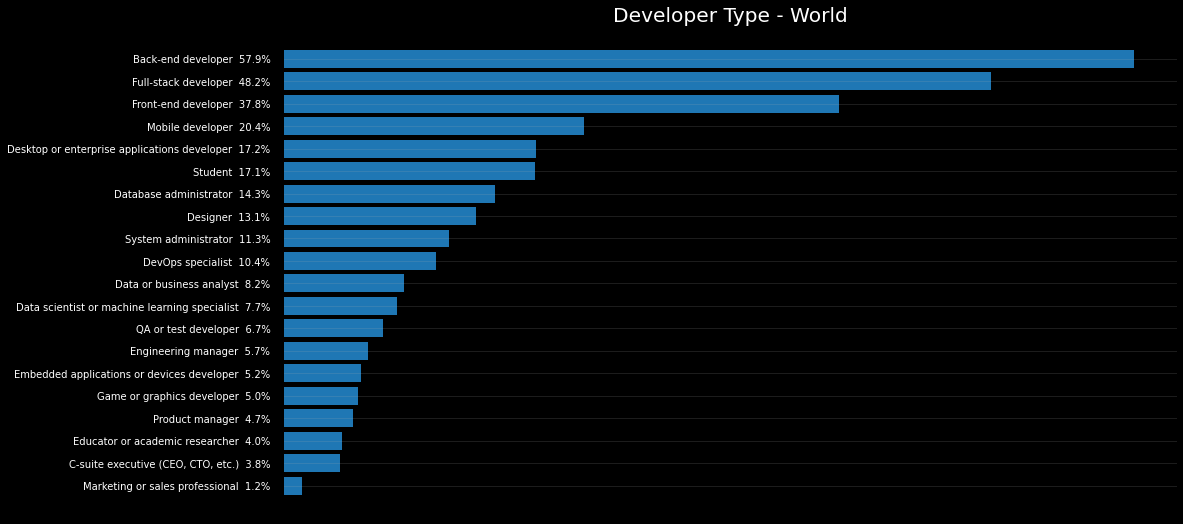

In [10]:
DevType = data["DevType"]    # We called necessary data
 
DevType.dropna( inplace=True)   # We filter the data from NaN and empty spaces 

DevType = DevType.str.split(';')  # We are splitting variables    "split variable when program sees (;) "




Double_list_sort_count(DevType , False)  # Auto sort and count

Build_Barh_sizes( key_Phrases , Quantity, DevType ,"fivethirtyeight", False , (16,9), "Developer Type - World") # Building a schedule

<h5 style="text-align:center; " > <b>Contributing to Open Source

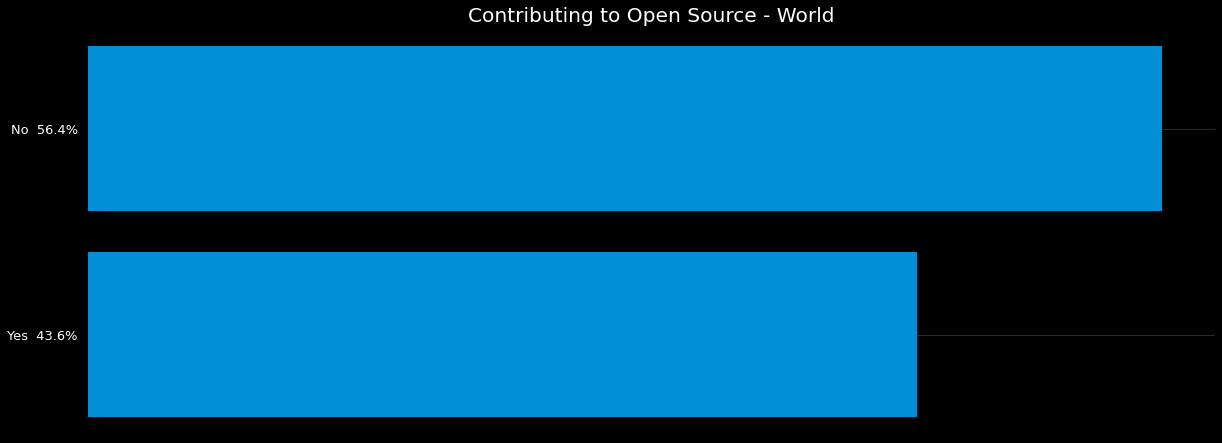

In [12]:
OpenSourcer = data["OpenSource"]   # We called necessary data

OpenSourcer.dropna( inplace=True)   # We filter the data from NaN and empty spaces 



Dictionary_Distributor(OpenSourcer , False)     # Auto sort and count

Build_Barh_sizes( key_Phrases , Quantity, OpenSourcer ,"fivethirtyeight", False , (18,7), "Contributing to Open Source - World")   # Building a schedule

<h5 style="text-align:center; " > <b>Coding as a Hobby

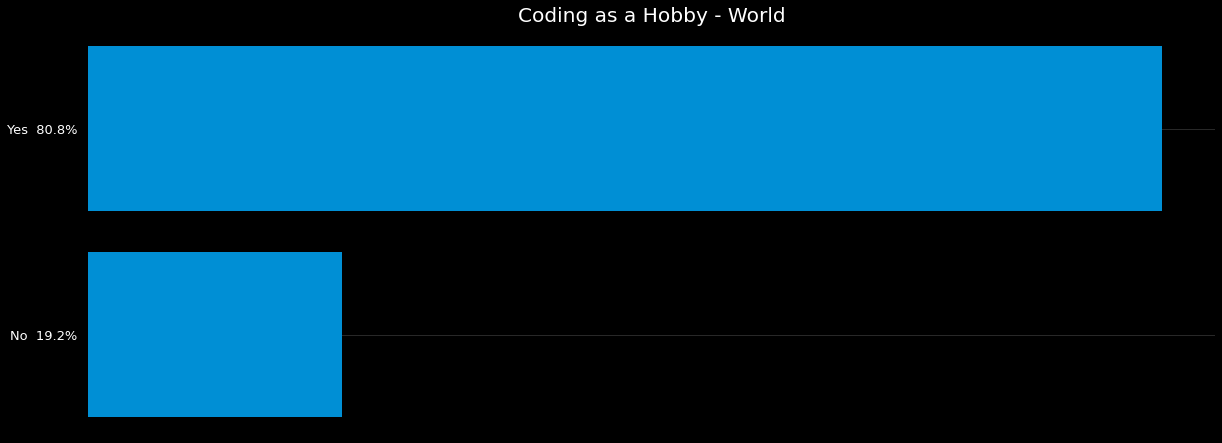

In [14]:
Hobbyist = data["Hobby"]    # We called necessary data
 
Hobbyist.dropna( inplace=True)   # We filter the data from NaN and empty spaces 



Dictionary_Distributor(Hobbyist , False)     # Auto sort and count

Build_Barh_sizes( key_Phrases , Quantity, Hobbyist ,"fivethirtyeight", False , (18,7), "Coding as a Hobby - World")   # Building a schedule

#### Experience

<h5 style="text-align:center; " > <b>Years Since Learning to Code

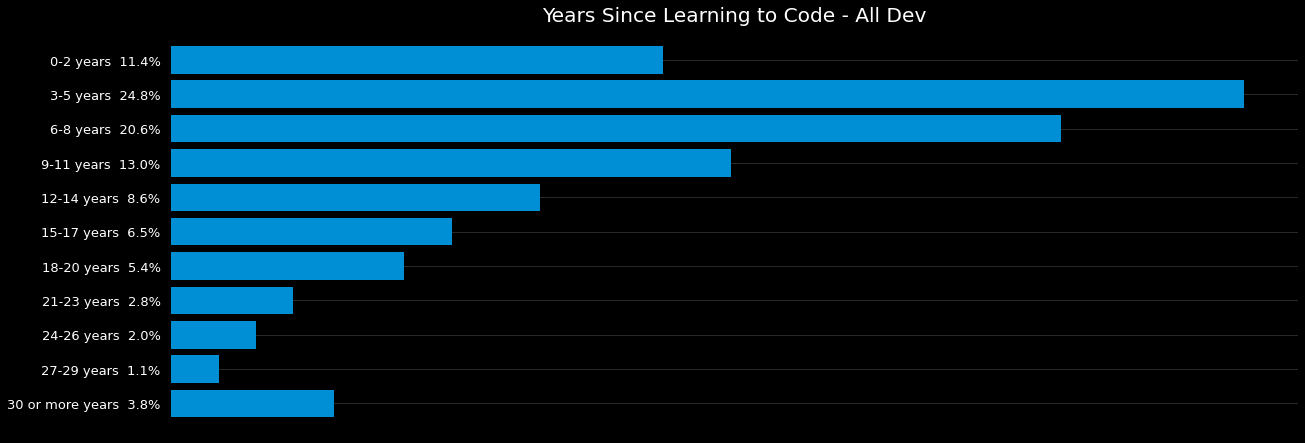

In [20]:
YearsCode = data["YearsCoding"]       # We called necessary data
YearsCode=YearsCode.dropna()        # We filter the data from NaN and empty spaces 


years_range_sorter(YearsCode)



Build_Barh_sizes( key_Phrases , Quantity, YearsCode ,"fivethirtyeight", False , (18,7), "Years Since Learning to Code - All Dev")  # Building a schedule



<h5 style="text-align:center; " > <b>Years Coding Professionally

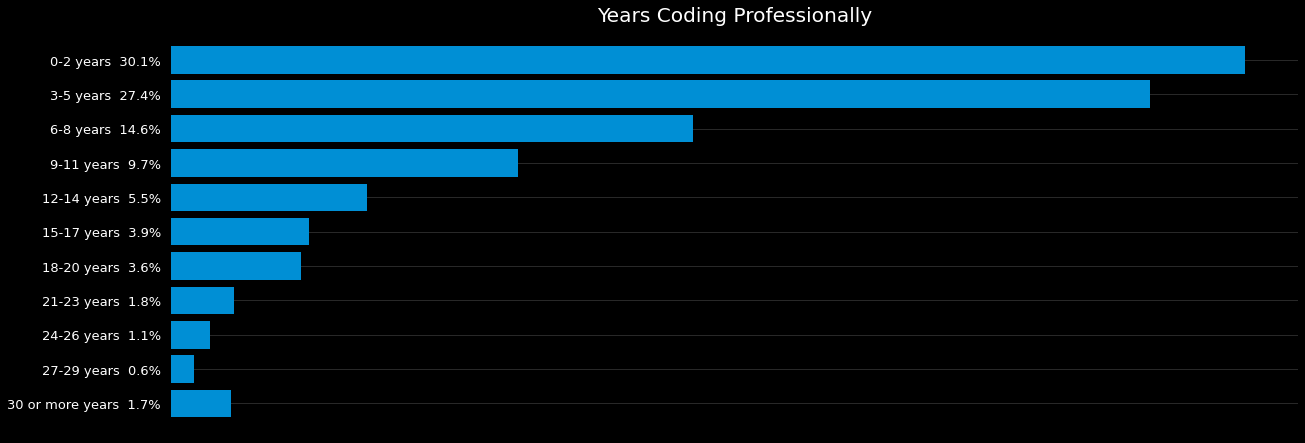

In [38]:
YearsCodePro = data["YearsCodingProf"]       # We called necessary data
YearsCodePro=YearsCodePro.dropna()        # We filter the data from NaN and empty spaces 

years_range_sorter(YearsCodePro)



Build_Barh_sizes( key_Phrases , Quantity, YearsCodePro ,"fivethirtyeight", False , (18,7), "Years Coding Professionally")  # Building a schedule

####  Education

<h5 style="text-align:center; " > <b>How Many Developers are Students?

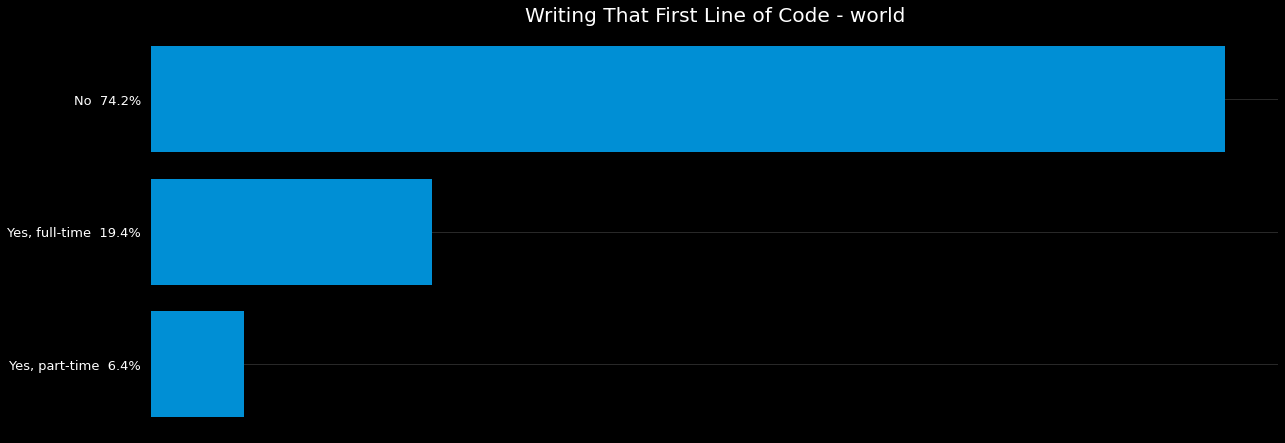

In [18]:
Student = data["Student"]       # We called necessary data
Student=Student.dropna(inplace=False)        # We filter the data from NaN and empty spaces 



Dictionary_Distributor(Student , False)     # Auto sort and count

Build_Barh_sizes( key_Phrases , Quantity, Student ,"fivethirtyeight", False , (18,7), "Writing That First Line of Code - world")  # Building a schedule


<h5 style="text-align:center; " > <b>Educational Attainment

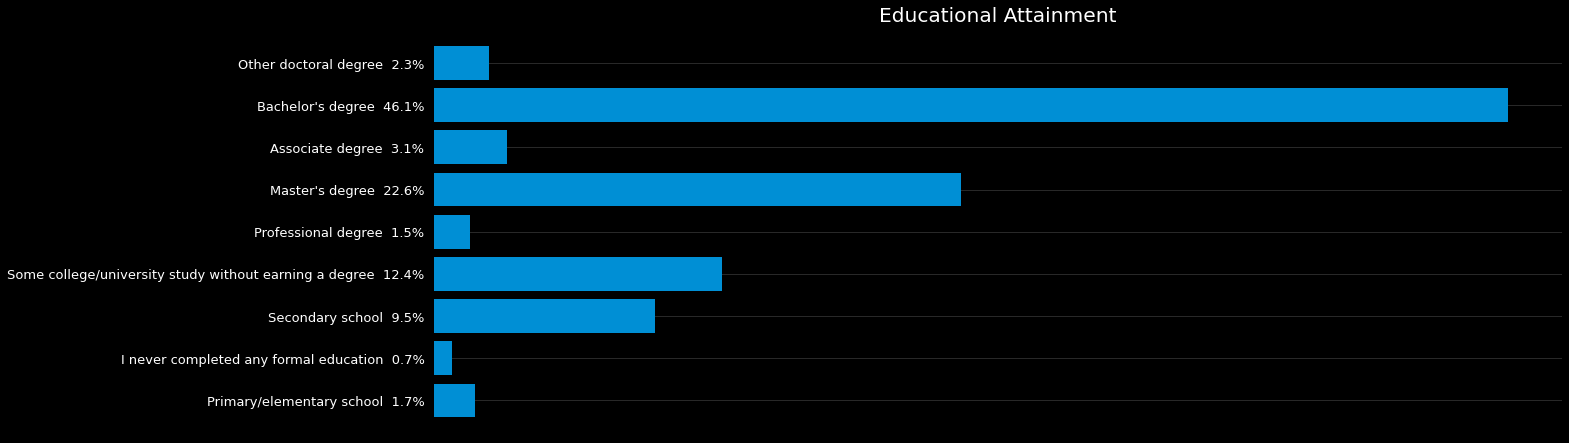

In [19]:
EdLevel = data["FormalEducation"]     # We called necessary data

EdLevel = EdLevel.dropna(inplace=False)   # We filter the data from NaN and empty spaces 



EdLevel = np.where(EdLevel == "Professional degree (JD, MD, etc.)",    "Professional degree", EdLevel)  # replace
EdLevel = np.where(EdLevel == "Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",   "Secondary school", EdLevel)  # replace 
EdLevel = np.where(EdLevel == "Bachelor’s degree (BA, BS, B.Eng., etc.)",     "Bachelor's degree", EdLevel)  # replace 
EdLevel = np.where(EdLevel == "Master’s degree (MA, MS, M.Eng., MBA, etc.)",     "Master's degree", EdLevel)  # replace 
EdLevel = np.where(EdLevel == "Other doctoral degree (Ph.D, Ed.D., etc.)",     "Other doctoral degree", EdLevel)  # replace 


Counted_EdLevel = Counter(EdLevel)  # Count information into EdLevel (where variable are replaced)

lCE = list(Counted_EdLevel.items())    # take items from dictinary

new_sorted_list = []    # new list were will be sorted answers


new_sorted_list.append(lCE[5])      # We sort the set
new_sorted_list.append(lCE[-2])     # We sort the set
new_sorted_list.append(lCE[4])      # We sort the set
new_sorted_list.append(lCE[2])      # We sort the set
new_sorted_list.append(lCE[-3])     # We sort the set
new_sorted_list.append(lCE[3])      # We sort the set
new_sorted_list.append(lCE[1])      # We sort the set
new_sorted_list.append(lCE[0])      # We sort the set
new_sorted_list.append(lCE[-1])     # We sort the set

new_sorted_list = dict(new_sorted_list)    # From list to Dictinary




key_Phrases = []    # It contein Phrases 
Quantity = []       # It contein Quantity of variable

for i in new_sorted_list:
    key_Phrases.append(i)           # Add Phrases into Phrases' list
    Quantity.append(new_sorted_list[i])      # Add Quantity into Quantity' list


Build_Barh_sizes( key_Phrases , Quantity, EdLevel ,"fivethirtyeight", False , (18,7), "Educational Attainment")  # Building a schedule


<h5 style="text-align:center; " > <b>Undergraduate Major

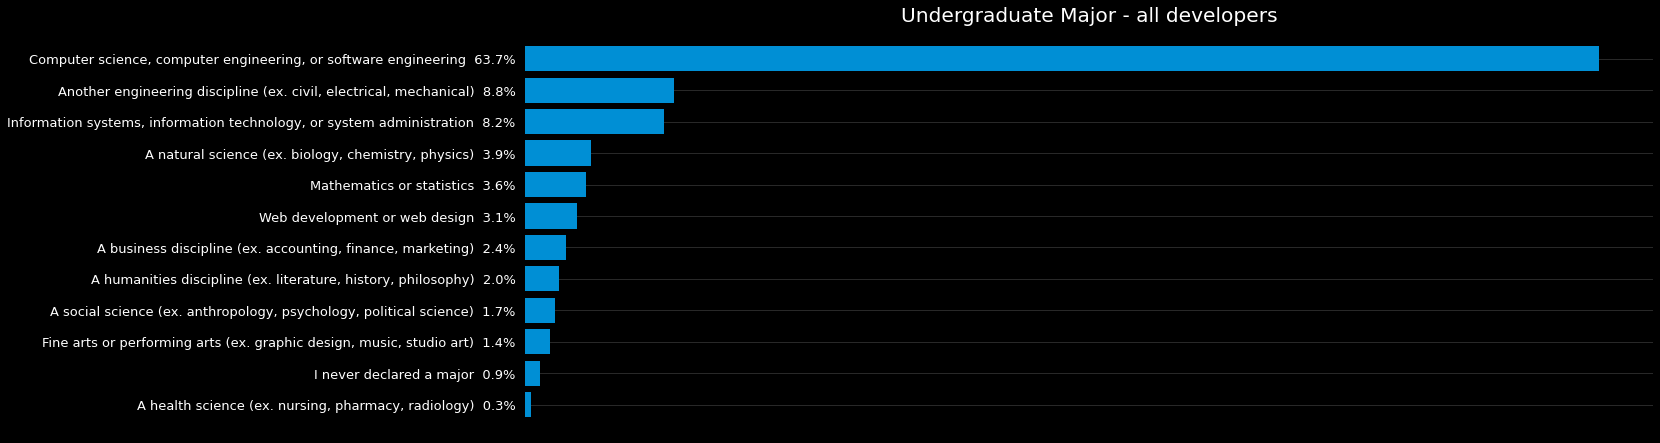

In [20]:
UndergradMajor = data["UndergradMajor"]     # We called necessary data

UndergradMajor = UndergradMajor.dropna(inplace=False)   # We filter the data from NaN and empty spaces 



Dictionary_Distributor(UndergradMajor , False)          # Auto sort and count

Build_Barh_sizes( key_Phrases , Quantity, UndergradMajor ,"fivethirtyeight", False , (18,7), "Undergraduate Major - all developers")  # Building a schedule


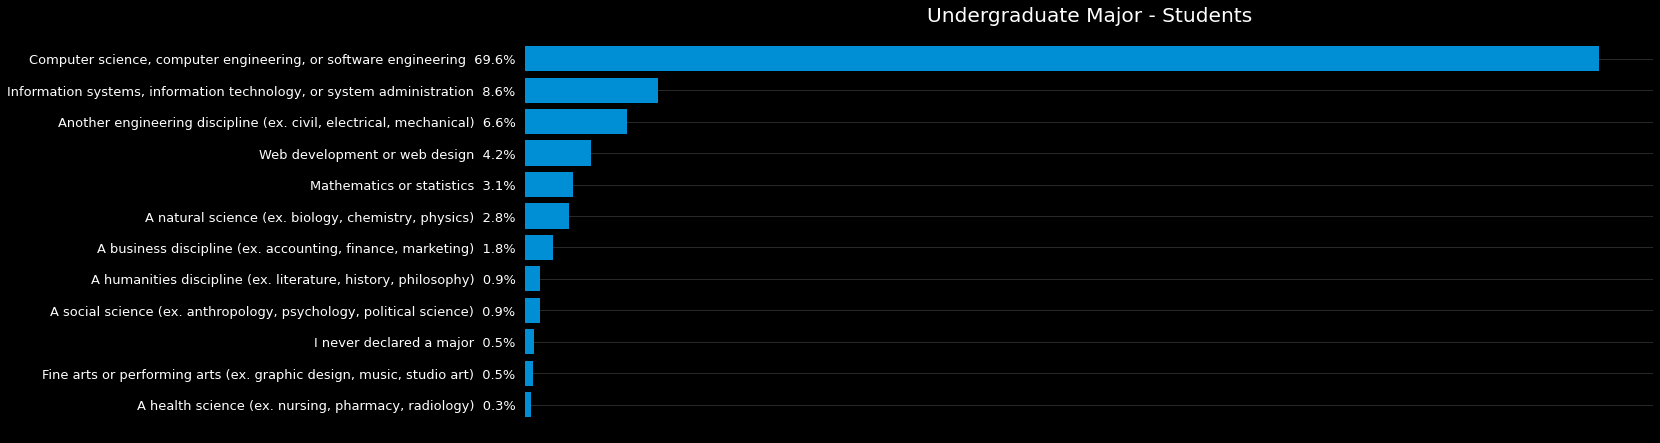

In [21]:
UndergradMajor = data["UndergradMajor"]     # We called necessary data

UndergradMajor = UndergradMajor.dropna(inplace=False)   # We filter the data from NaN and empty spaces 


New_UndergradMajor = data[(UndergradMajor != "NA5N") &  ((data["Student"] == "Yes, part-time") | (data["Student"] == "Yes, full-time"))]  # Data by Student


UndergradMajor = New_UndergradMajor["UndergradMajor"]  # save new filtred data inro new variable




Dictionary_Distributor(UndergradMajor , False)      # Auto sort and count

Build_Barh_sizes( key_Phrases , Quantity, New_UndergradMajor ,"fivethirtyeight", False , (18,7), "Undergraduate Major - Students")  # Building a schedule


<h5 style="text-align:center; " > <b>Other Types of Education

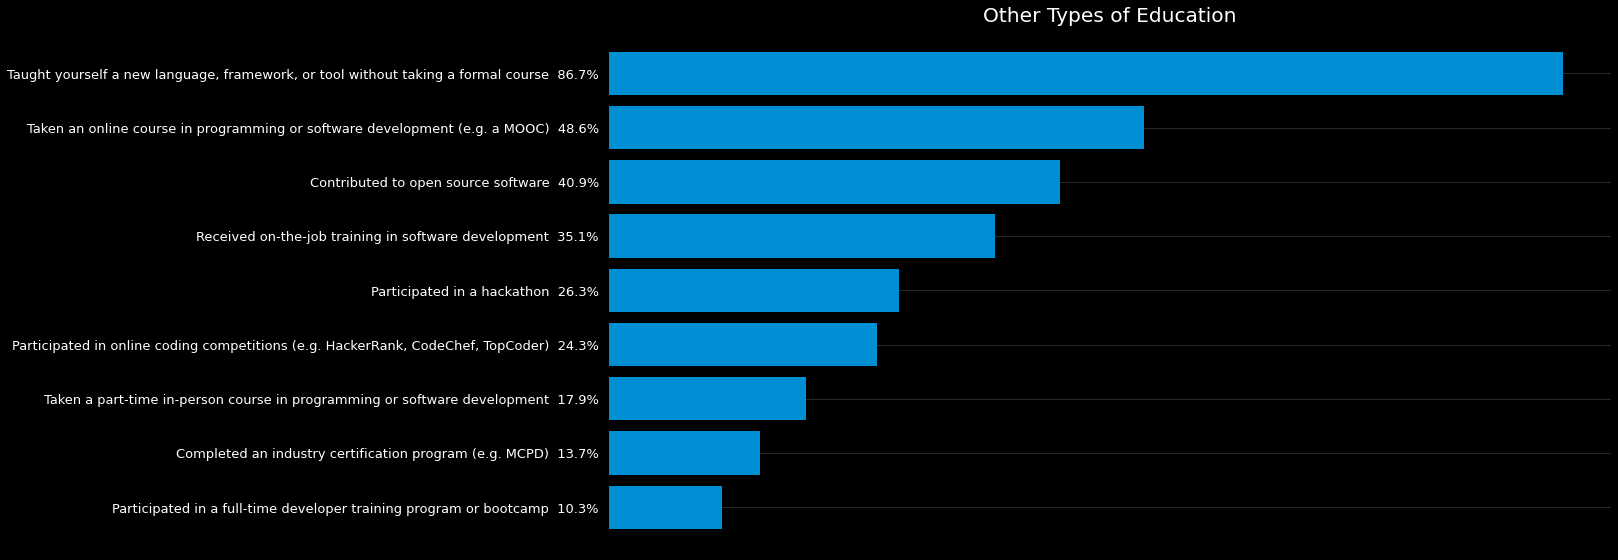

In [23]:
EduOther = data["EducationTypes"]    # We called necessary data
 
EduOther.dropna( inplace=True)   # We filter the data from NaN and empty spaces 

EduOther = EduOther.str.split(';')  # We are splitting variables    "split variable when program sees (;) "




Double_list_sort_count(EduOther , False)  # Auto sort and count

Build_Barh_sizes( key_Phrases , Quantity, EduOther ,"fivethirtyeight", False , (16,9), "Other Types of Education") # Building a schedule

<h5 style="text-align:center; " > <b>Ways Developers Learn on Their Own

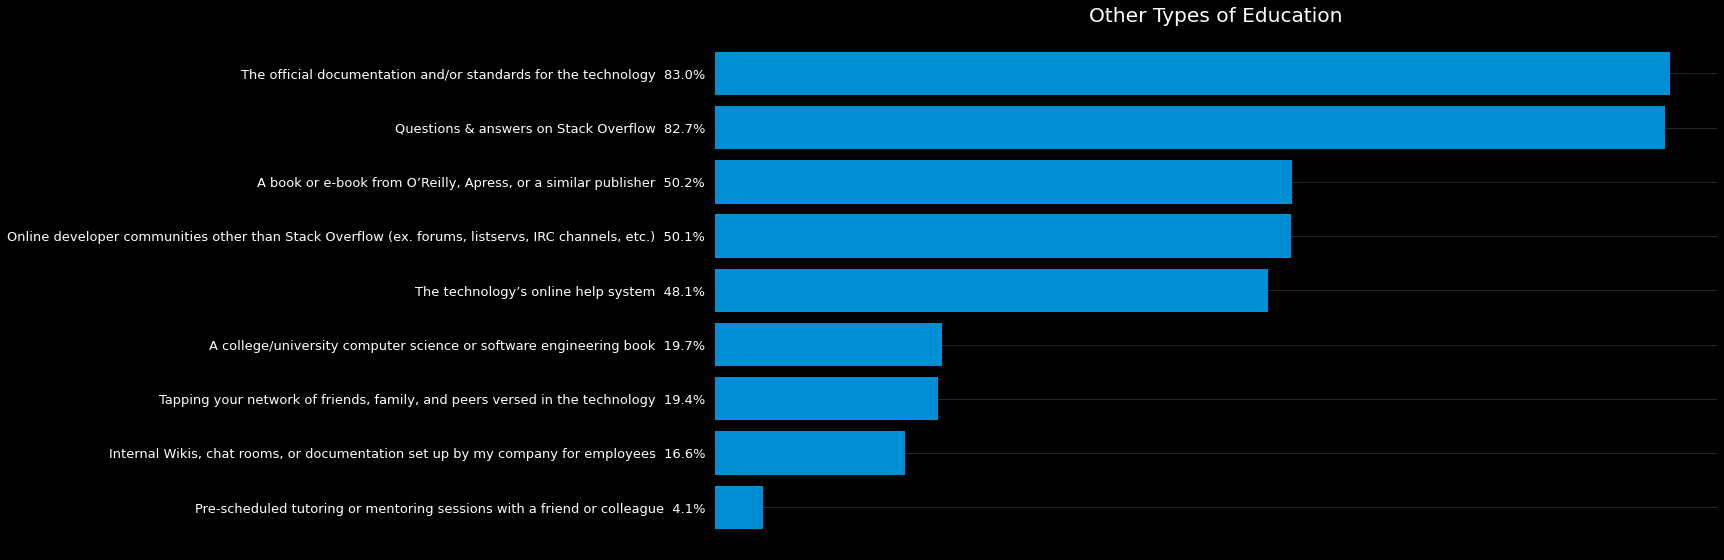

In [24]:
SelfTaughtTypes = data["SelfTaughtTypes"]    # We called necessary data
 
SelfTaughtTypes.dropna( inplace=True)   # We filter the data from NaN and empty spaces 

SelfTaughtTypes = SelfTaughtTypes.str.split(';')  # We are splitting variables    "split variable when program sees (;) "




Double_list_sort_count(SelfTaughtTypes , False)  # Auto sort and count

Build_Barh_sizes( key_Phrases , Quantity, SelfTaughtTypes ,"fivethirtyeight", False , (16,9), "Ways Developers Learn on Their Own") # Building a schedule

<h5 style="text-align:center; " > <b>Why Do Developers Participate in Hackathons?

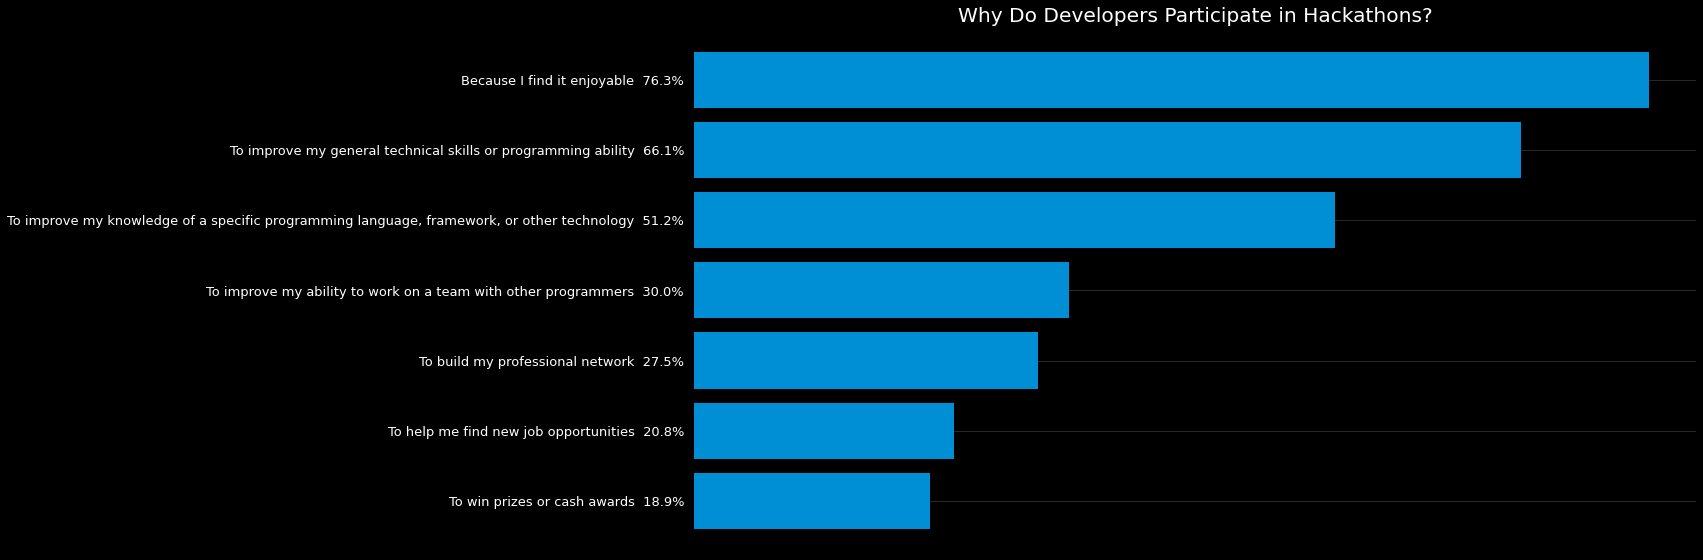

In [26]:
HackathonReasons = data["HackathonReasons"]    # We called necessary data
 
HackathonReasons.dropna( inplace=True)   # We filter the data from NaN and empty spaces 

HackathonReasons = HackathonReasons.str.split(';')  # We are splitting variables    "split variable when program sees (;) "




Double_list_sort_count(HackathonReasons , False)  # Auto sort and count

Build_Barh_sizes( key_Phrases , Quantity, HackathonReasons ,"fivethirtyeight", False , (16,9), "Why Do Developers Participate in Hackathons?") # Building a schedule

<h5 style="text-align:center; " > <b>Finding a Job After Bootcamp

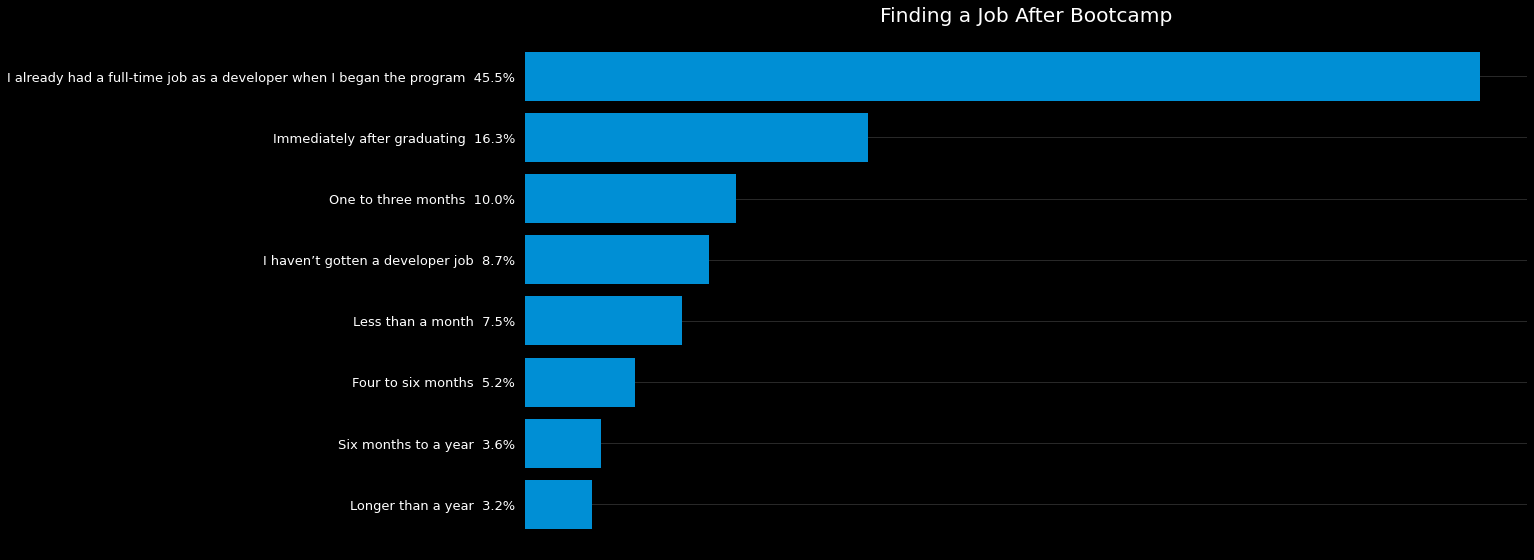

In [27]:
TimeAfterBootcamp = data["TimeAfterBootcamp"]    # We called necessary data
 
TimeAfterBootcamp.dropna( inplace=True)   # We filter the data from NaN and empty spaces 

TimeAfterBootcamp = TimeAfterBootcamp.str.split(';')  # We are splitting variables    "split variable when program sees (;) "




Double_list_sort_count(TimeAfterBootcamp , False)  # Auto sort and count

Build_Barh_sizes( key_Phrases , Quantity, TimeAfterBootcamp ,"fivethirtyeight", False , (16,9), "Finding a Job After Bootcamp") # Building a schedule

####  Demographics

<h5 style="text-align:center; " > <b>Gender

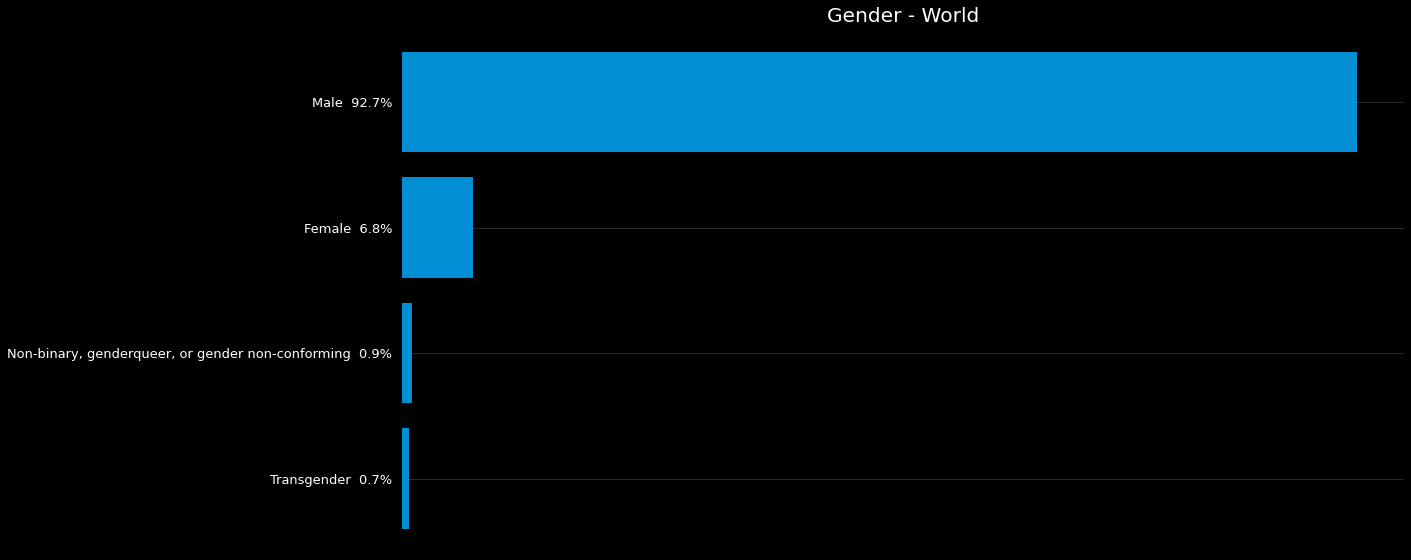

In [28]:
Gender = data["Gender"]    # We called necessary data
 
Gender.dropna( inplace=True)   # We filter the data from NaN and empty spaces 

Gender = Gender.str.split(';')  # We are splitting variables    "split variable when program sees (;) "




Double_list_sort_count(Gender , False)  # Auto sort and count

Build_Barh_sizes( key_Phrases , Quantity, Gender ,"fivethirtyeight", False , (16,9), "Gender - World") # Building a schedule

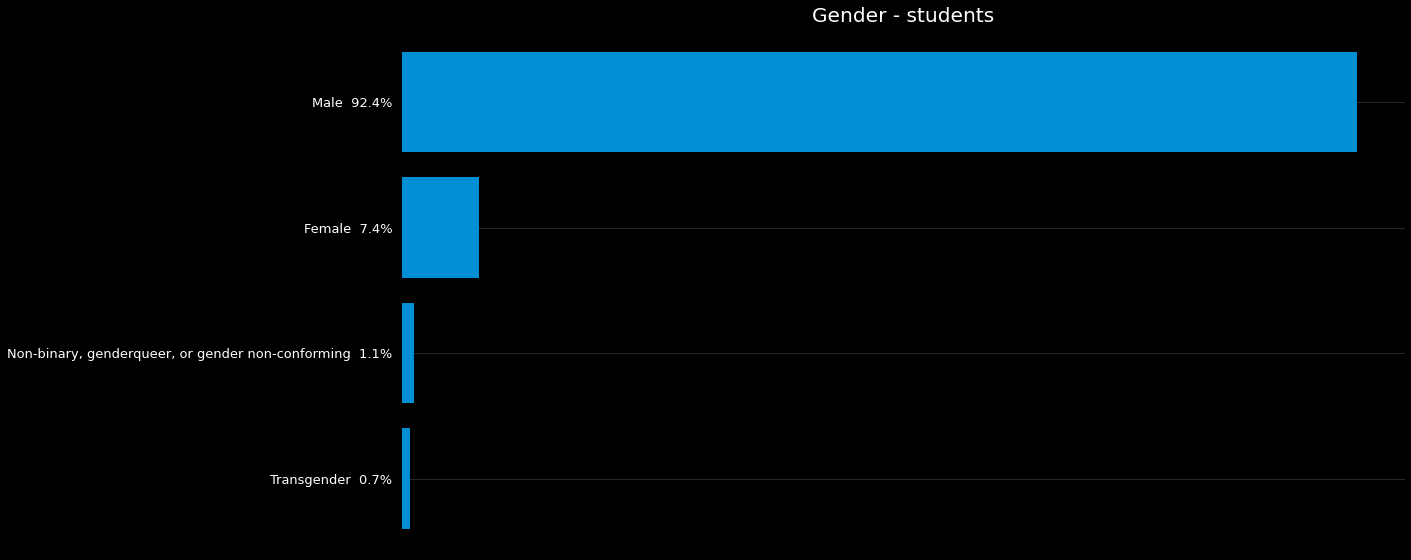

In [29]:
Gender = data["Gender"]    # We called necessary data
 
Gender.dropna( inplace=True)  # We filter the data from NaN and empty spaces 


Gender =data[(Gender != "NAN") &  ((data["Student"] == "Yes, part-time") | (data["Student"] == "Yes, full-time"))] # Data by Student


New_Gender = Gender["Gender"].str.split(';')  # We are splitting variables    "split variable when program sees (;) "



Double_list_sort_count(New_Gender , False)   # Auto sort and count

Build_Barh_sizes( key_Phrases , Quantity, New_Gender ,"fivethirtyeight", False , (16,9), "Gender - students") # Building a schedule

<h5 style="text-align:center; " > <b>Race and Ethnicity

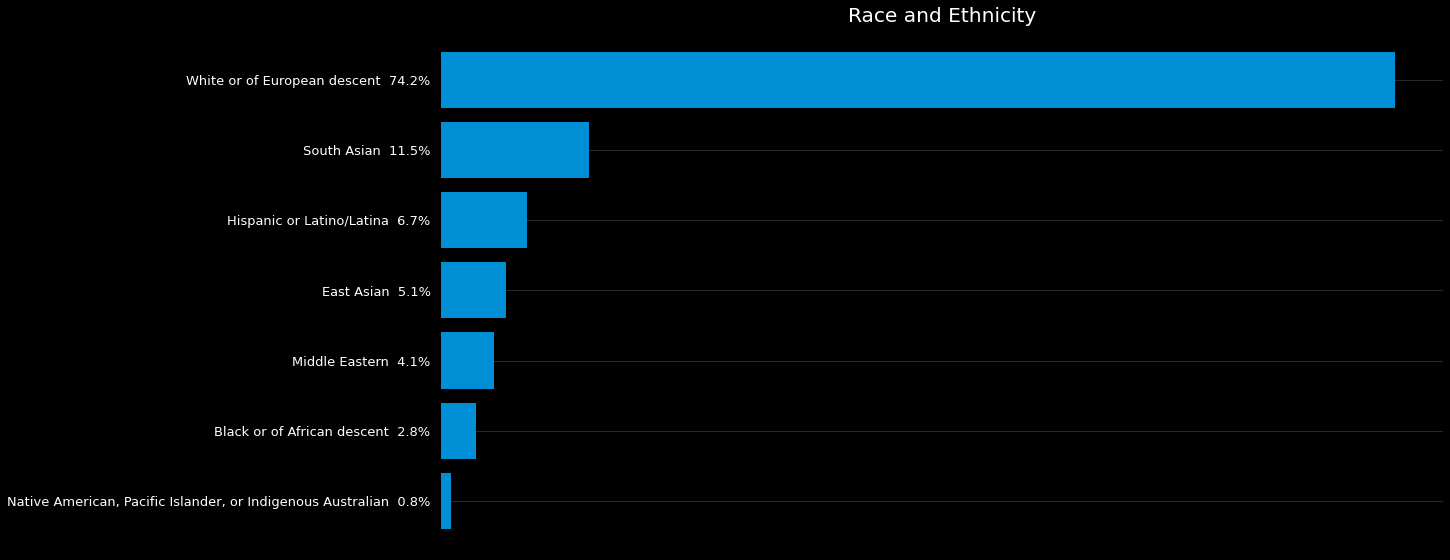

In [30]:
Ethnicity = data["RaceEthnicity"]    # We called necessary data
 
Ethnicity.dropna( inplace=True)   # We filter the data from NaN and empty spaces 

Ethnicity = Ethnicity.str.split(';')  # We are splitting variables    "split variable when program sees (;) "




Double_list_sort_count(Ethnicity , False)  # Auto sort and count

Build_Barh_sizes( key_Phrases , Quantity, Ethnicity ,"fivethirtyeight", False , (16,9), "Race and Ethnicity") # Building a schedule

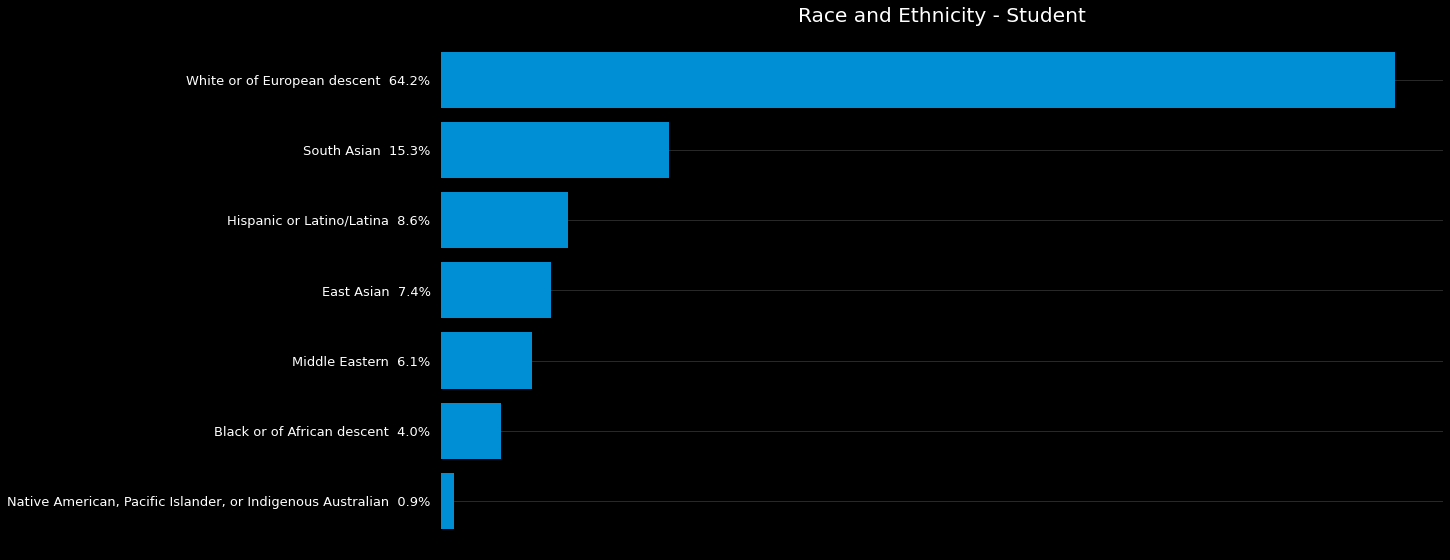

In [32]:
Ethnicity = data["RaceEthnicity"]    # We called necessary data
 
Ethnicity.dropna( inplace=True)  # We filter the data from NaN and empty spaces 


Ethnicity =data[(Ethnicity != "NAN") &  ((data["Student"] == "Yes, part-time") | (data["Student"] == "Yes, full-time"))] # Data by Student


New_Ethnicity = Ethnicity["RaceEthnicity"].str.split(';')  # We are splitting variables    "split variable when program sees (;) "



Double_list_sort_count(New_Ethnicity , False)   # Auto sort and count

Build_Barh_sizes( key_Phrases , Quantity, New_Ethnicity ,"fivethirtyeight", False , (16,9), "Race and Ethnicity - Student") # Building a schedule

<h5 style="text-align:center; " > <b>Sexual Orientation

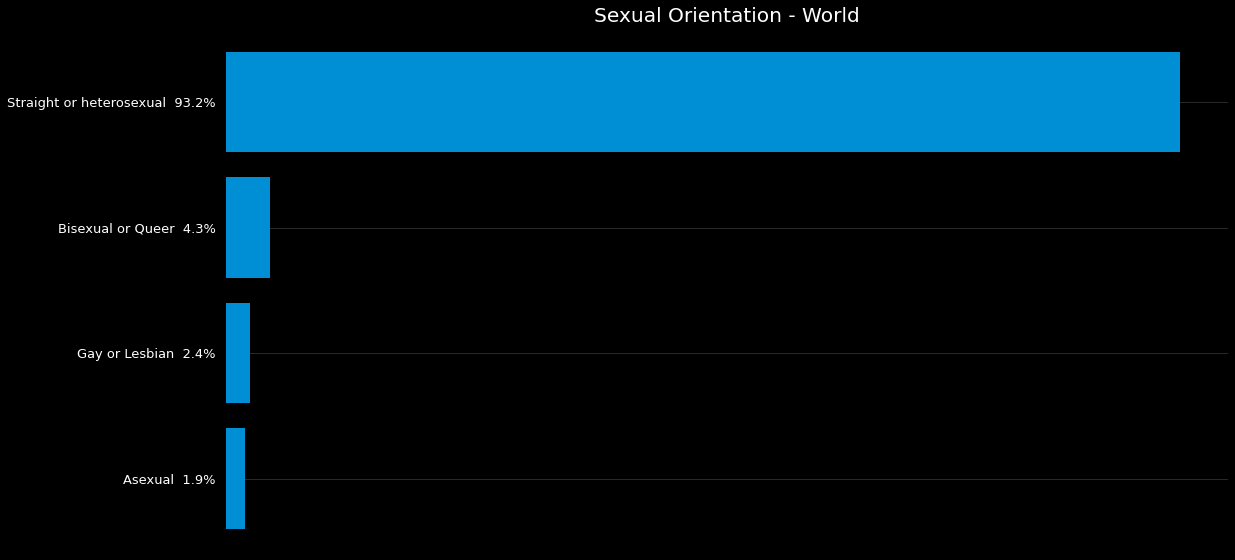

In [33]:
Sexuality = data["SexualOrientation"]    # We called necessary data
 
Sexuality.dropna( inplace=True)   # We filter the data from NaN and empty spaces 

Sexuality = Sexuality.str.split(';')  # We are splitting variables    "split variable when program sees (;) "




Double_list_sort_count(Sexuality , False)  # Auto sort and count

Build_Barh_sizes( key_Phrases , Quantity, Sexuality ,"fivethirtyeight", False , (16,9), "Sexual Orientation - World") # Building a schedule

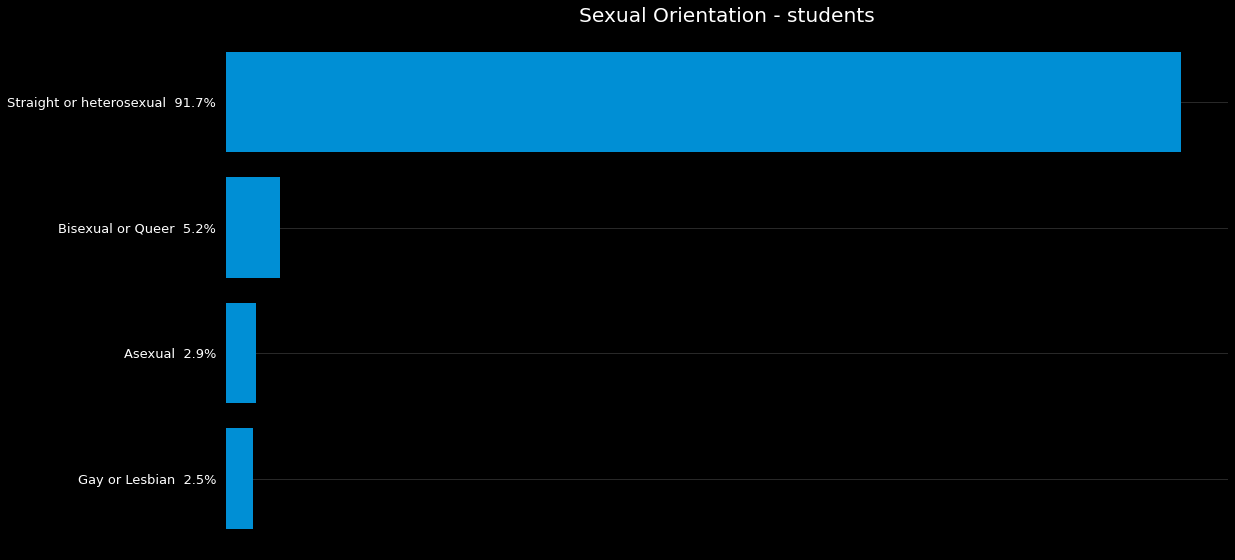

In [35]:
Sexuality = data["SexualOrientation"]    # We called necessary data
 
Sexuality.dropna( inplace=True)  # We filter the data from NaN and empty spaces 


Sexuality_students = data [ (Sexuality != "nan") & ((data["Student"] == "Yes, part-time") | (data["Student"] == "Yes, full-time"))]  # Data by Student


New_Sexuality = Sexuality_students["SexualOrientation"].str.split(';')  # We are splitting variables    "split variable when program sees (;) "



Double_list_sort_count(New_Sexuality , False)   # Auto sort and count

Build_Barh_sizes( key_Phrases , Quantity, New_Sexuality ,"fivethirtyeight", False , (16,9), "Sexual Orientation - students") # Building a schedule

<h5 style="text-align:center; " > <b>Parents' Education Level

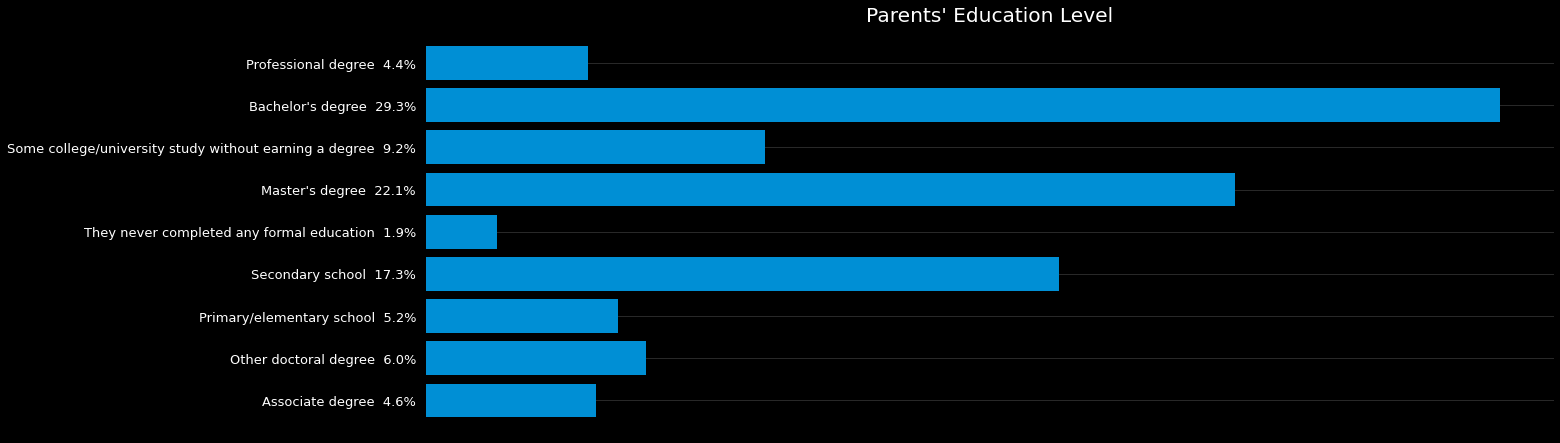

In [41]:
EdLevel = data["EducationParents"]     # We called necessary data

EdLevel = EdLevel.dropna(inplace=False)   # We filter the data from NaN and empty spaces 


EdLevel = np.where(EdLevel == "Professional degree (JD, MD, etc.)",    "Professional degree", EdLevel)  # replace
EdLevel = np.where(EdLevel == "Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",   "Secondary school", EdLevel)  # replace 
EdLevel = np.where(EdLevel == "Bachelor’s degree (BA, BS, B.Eng., etc.)",     "Bachelor's degree", EdLevel)  # replace 
EdLevel = np.where(EdLevel == "Master’s degree (MA, MS, M.Eng., MBA, etc.)",     "Master's degree", EdLevel)  # replace 
EdLevel = np.where(EdLevel == "Other doctoral degree (Ph.D, Ed.D., etc.)",     "Other doctoral degree", EdLevel)  # replace 


Counted_EdLevel = Counter(EdLevel)  # Count information into EdLevel (where variable are replaced)

lCE = list(Counted_EdLevel.items())    # take items from dictinary

new_sorted_list = []    # new list were will be sorted answers


new_sorted_list.append(lCE[5])      # We sort the set
new_sorted_list.append(lCE[-2])     # We sort the set
new_sorted_list.append(lCE[4])      # We sort the set
new_sorted_list.append(lCE[2])      # We sort the set
new_sorted_list.append(lCE[-3])     # We sort the set
new_sorted_list.append(lCE[3])      # We sort the set
new_sorted_list.append(lCE[1])      # We sort the set
new_sorted_list.append(lCE[0])      # We sort the set
new_sorted_list.append(lCE[-1])     # We sort the set

new_sorted_list = dict(new_sorted_list)    # From list to Dictinary




key_Phrases = []    # It contein Phrases 
Quantity = []       # It contein Quantity of variable

for i in new_sorted_list:
    key_Phrases.append(i)           # Add Phrases into Phrases' list
    Quantity.append(new_sorted_list[i])      # Add Quantity into Quantity' list


Build_Barh_sizes( key_Phrases , Quantity, EdLevel ,"fivethirtyeight", False , (18,7), "Parents' Education Level")  # Building a schedule


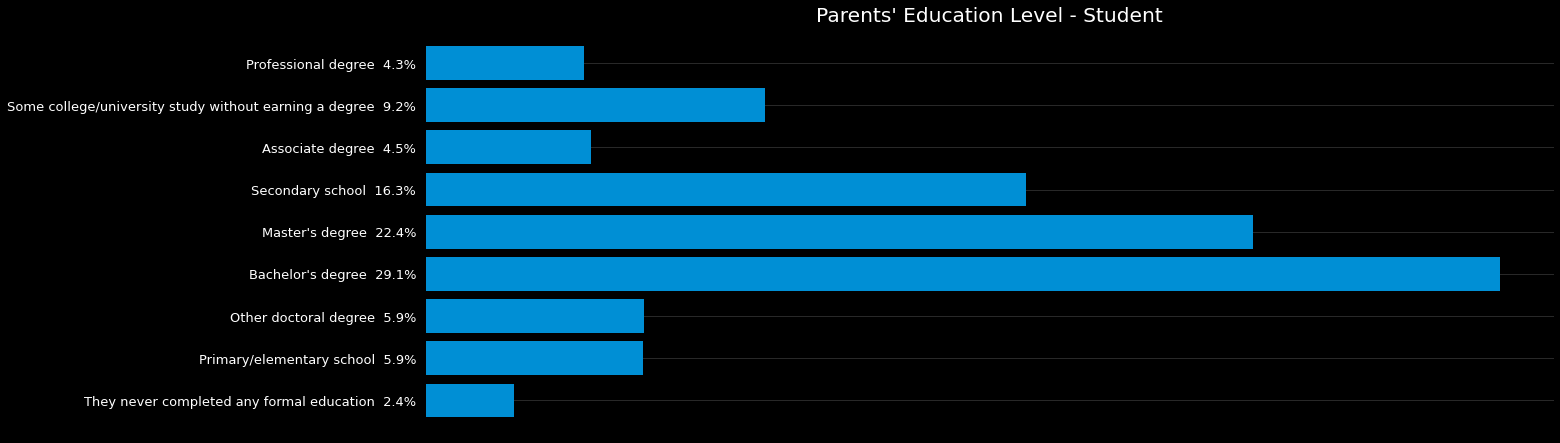

In [40]:
EdLevel = data["EducationParents"]     # We called necessary data

EdLevel = EdLevel.dropna(inplace=False)   # We filter the data from NaN and empty spaces 

EdLevel_students = data [ (EdLevel != "nan") & ((data["Student"] == "Yes, part-time") | (data["Student"] == "Yes, full-time"))]  # Data by Student

EdLevel = EdLevel_students["EducationParents"]


EdLevel = np.where(EdLevel == "Professional degree (JD, MD, etc.)",    "Professional degree", EdLevel)  # replace
EdLevel = np.where(EdLevel == "Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",   "Secondary school", EdLevel)  # replace 
EdLevel = np.where(EdLevel == "Bachelor’s degree (BA, BS, B.Eng., etc.)",     "Bachelor's degree", EdLevel)  # replace 
EdLevel = np.where(EdLevel == "Master’s degree (MA, MS, M.Eng., MBA, etc.)",     "Master's degree", EdLevel)  # replace 
EdLevel = np.where(EdLevel == "Other doctoral degree (Ph.D, Ed.D., etc.)",     "Other doctoral degree", EdLevel)  # replace 


Counted_EdLevel = Counter(EdLevel)  # Count information into EdLevel (where variable are replaced)

lCE = list(Counted_EdLevel.items())    # take items from dictinary

new_sorted_list = []    # new list were will be sorted answers


new_sorted_list.append(lCE[5])      # We sort the set
new_sorted_list.append(lCE[-2])     # We sort the set
new_sorted_list.append(lCE[4])      # We sort the set
new_sorted_list.append(lCE[2])      # We sort the set
new_sorted_list.append(lCE[-3])     # We sort the set
new_sorted_list.append(lCE[3])      # We sort the set
new_sorted_list.append(lCE[1])      # We sort the set
new_sorted_list.append(lCE[0])      # We sort the set
new_sorted_list.append(lCE[-1])     # We sort the set

new_sorted_list = dict(new_sorted_list)    # From list to Dictinary




key_Phrases = []    # It contein Phrases 
Quantity = []       # It contein Quantity of variable

for i in new_sorted_list:
    key_Phrases.append(i)           # Add Phrases into Phrases' list
    Quantity.append(new_sorted_list[i])      # Add Quantity into Quantity' list


Build_Barh_sizes( key_Phrases , Quantity, EdLevel ,"fivethirtyeight", False , (18,7), "Parents' Education Level - Student")  # Building a schedule


<h5 style="text-align:center; " > <b>Experience and Gender

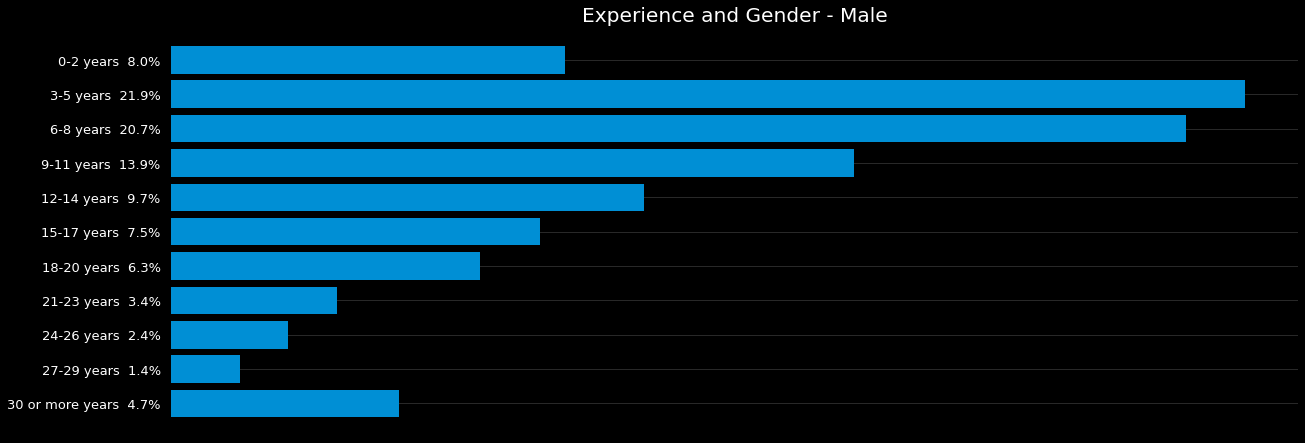

In [33]:
YearsCode = data["YearsCoding"]   # We called necessary data
YearsCode=YearsCode.dropna()  # We filter the data from NaN and empty spaces 


New_list  = data[ (YearsCode != "nan") & ((data["Gender"] == "Male") | (data["Gender"] == "Female;Male") | (data["Gender"] == "Female;Male;Transgender;Non-binary, genderqueer, or gender non-conforming") | (data["Gender"] == "Male;Non-binary, genderqueer, or gender non-conforming") )] # Data by gender



New_list = New_list["YearsCoding"]


years_range_sorter(New_list)



Build_Barh_sizes( key_Phrases , Quantity, New_list ,"fivethirtyeight", False , (18,7), "Experience and Gender - Male")  # Building a schedule




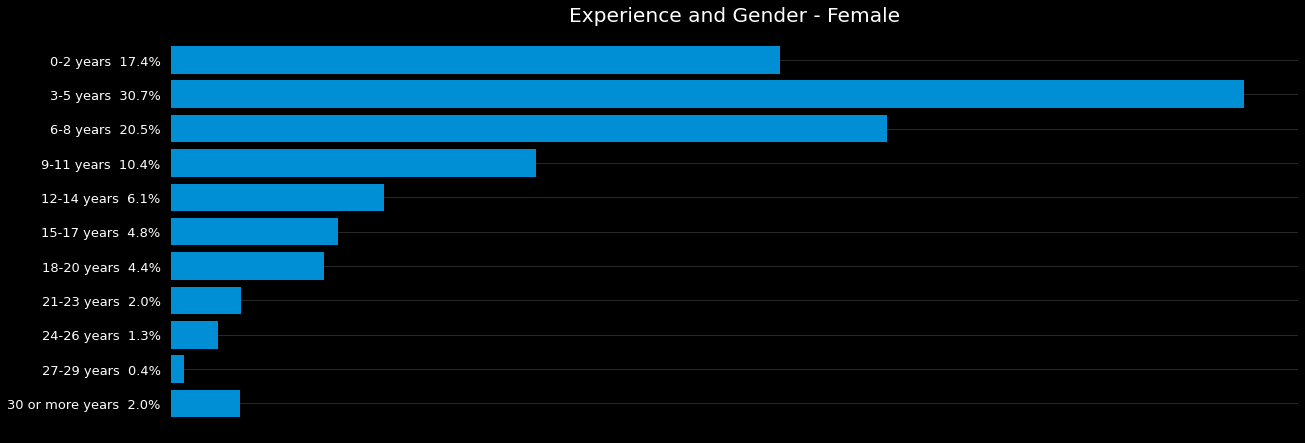

In [34]:
YearsCode = data["YearsCoding"]   # We called necessary data
YearsCode=YearsCode.dropna()  # We filter the data from NaN and empty spaces 


New_list  = data[ (YearsCode != "nan")  & ((data["Gender"] == "Female") | (data["Gender"] == "Female;Male")  | (data["Gender"] == "Female;Male;Transgender;Non-binary, genderqueer, or gender non-conforming")   | (data["Gender"] == "Female;Transgender"))]  # Data by gender



New_list = New_list["YearsCoding"]


years_range_sorter(New_list)



Build_Barh_sizes( key_Phrases , Quantity, New_list ,"fivethirtyeight", False , (18,7), "Experience and Gender - Female")  # Building a schedule


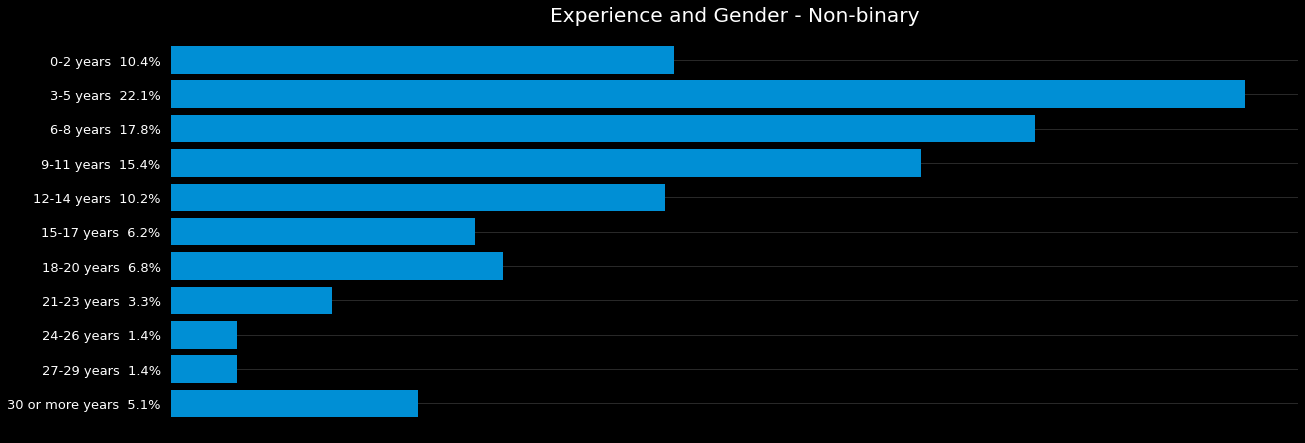

In [35]:
YearsCode = data["YearsCoding"]   # We called necessary data
YearsCode=YearsCode.dropna()  # We filter the data from NaN and empty spaces 


New_list  = data[ (YearsCode != "nan")  & ((data["Gender"] == "Female;Male;Transgender;Non-binary, genderqueer, or gender non-conforming") | (data["Gender"] == "Male;Non-binary, genderqueer, or gender non-conforming") | (data["Gender"] == "Non-binary, genderqueer, or gender non-conforming")   | (data["Gender"] == "Transgender;Non-binary, genderqueer, or gender non-conforming"))]   # Data by gender


New_list = New_list["YearsCoding"]


years_range_sorter(New_list)



Build_Barh_sizes( key_Phrases , Quantity, New_list ,"fivethirtyeight", False , (18,7), "Experience and Gender - Non-binary")  # Building a schedule


####  Life Outside Work 

<h5 style="text-align:center; " > <b>Children and Other Dependents

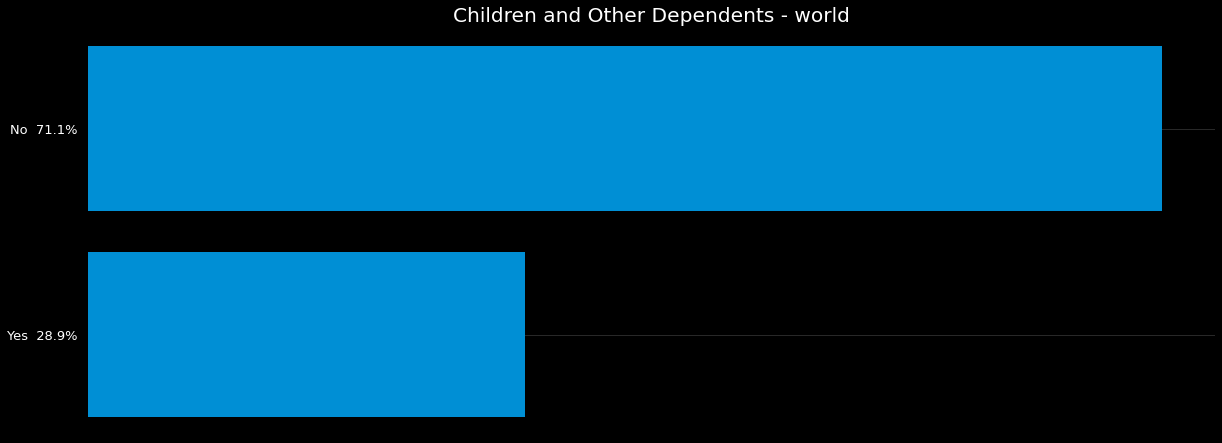

In [44]:
Dependents = data["Dependents"]                      # We called necessary data
Dependents=Dependents.dropna(inplace=False)          # We filter the data from NaN and empty spaces 

Dictionary_Distributor(Dependents , False)       # list sorter-Counter

Build_Barh_sizes( key_Phrases , Quantity, Dependents ,"fivethirtyeight", False , (18,7), "Children and Other Dependents - world")  # Building a schedule


<h5 style="text-align:center; " > <b> What Time Do Developers Wake Up?

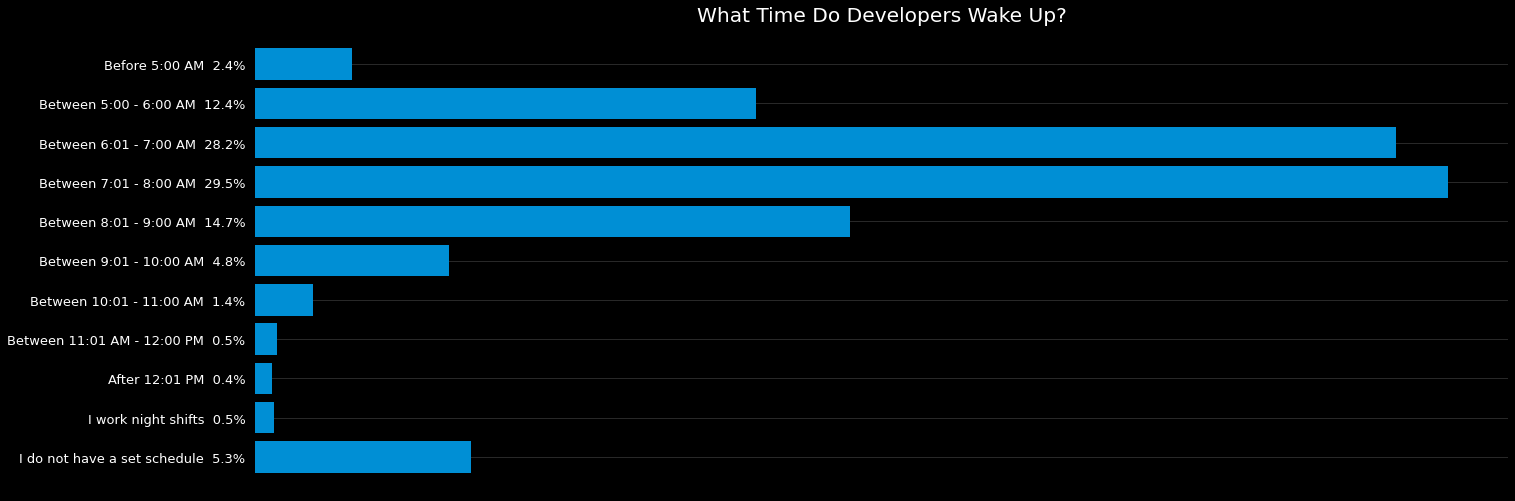

In [42]:
WakeTime = data["WakeTime"]   # We called necessary data

WakeTime.dropna(inplace=True)    # We filter the data from NaN and empty spaces 

counted = Counter(WakeTime)  # We count the number of each answer

Formation = ['I do not have a set schedule','I work night shifts','After 12:01 PM','Between 11:01 AM - 12:00 PM','Between 10:01 - 11:00 AM','Between 9:01 - 10:00 AM','Between 8:01 - 9:00 AM','Between 7:01 - 8:00 AM','Between 6:01 - 7:00 AM','Between 5:00 - 6:00 AM','Before 5:00 AM'] # We set the sequence


key_Phrases = []    # It contein Phrases 
Quantity = []       # It contein Quantity of variable


for i in Formation:
    key_Phrases.append(i)           # Add Phrases into Phrases' list
    Quantity.append(counted[i])     # Add Quantity into Quantity' list
    

Build_Barh_sizes( key_Phrases , Quantity, WakeTime ,"fivethirtyeight", False , (20,8), "What Time Do Developers Wake Up?")  # Building a schedule


<h5 style="text-align:center; " > <b> How Much Time Do Developers Spend on a Computer?

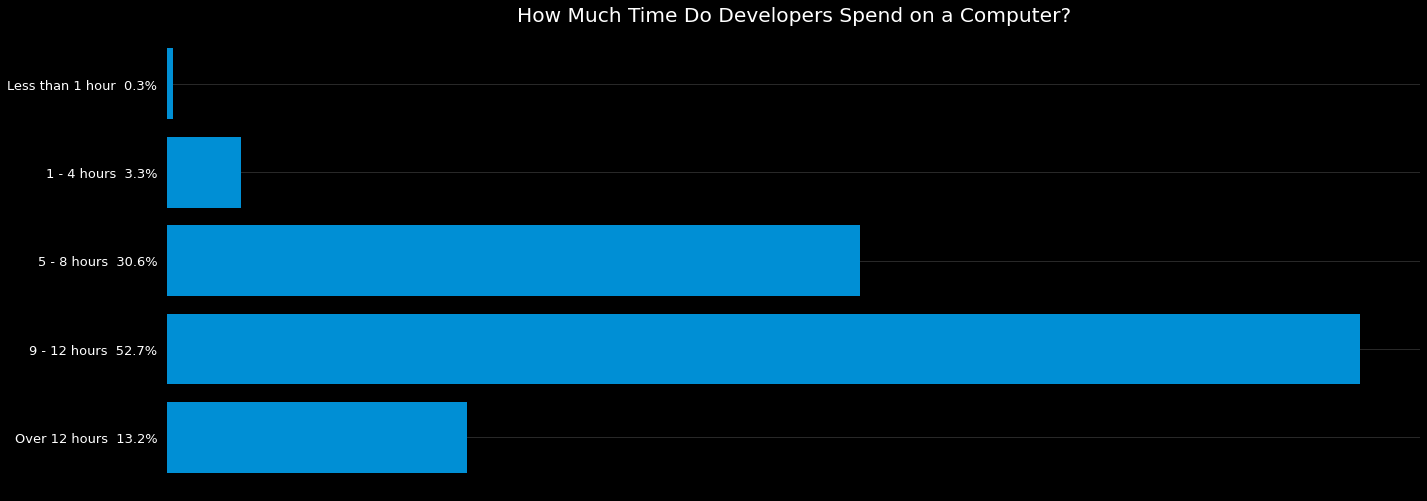

In [44]:
HoursComputer = data["HoursComputer"]   # We called necessary data

HoursComputer.dropna(inplace=True)    # We filter the data from NaN and empty spaces 

counted = Counter(HoursComputer)  # We count the number of each answer

Formation = ['Less than 1 hour','1 - 4 hours','5 - 8 hours','9 - 12 hours','Over 12 hours'] # We set the sequence
Formation.reverse()

key_Phrases = []    # It contein Phrases 
Quantity = []       # It contein Quantity of variable


for i in Formation:
    key_Phrases.append(i)           # Add Phrases into Phrases' list
    Quantity.append(counted[i])     # Add Quantity into Quantity' list
    

Build_Barh_sizes( key_Phrases , Quantity, HoursComputer ,"fivethirtyeight", False , (20,8), "How Much Time Do Developers Spend on a Computer?")  # Building a schedule


<h5 style="text-align:center; " > <b> How Much Time Do Developers Spend Outside?

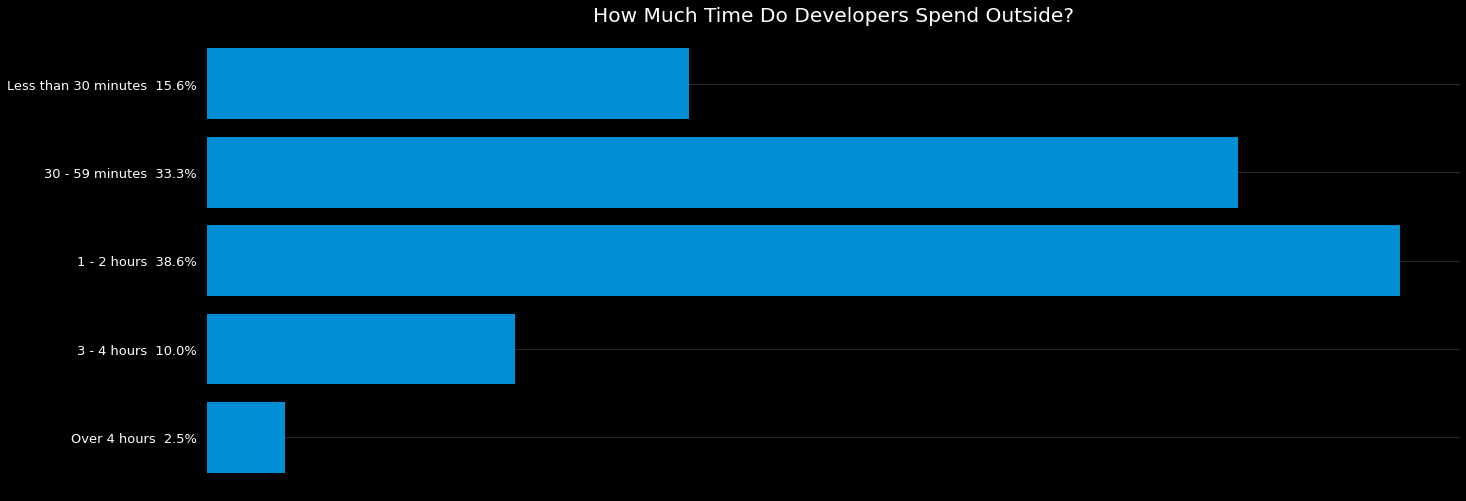

In [45]:
HoursOutside = data["HoursOutside"]   # We called necessary data

HoursOutside.dropna(inplace=True)    # We filter the data from NaN and empty spaces 

counted = Counter(HoursOutside)  # We count the number of each answer

Formation = ['Less than 30 minutes','30 - 59 minutes','1 - 2 hours','3 - 4 hours','Over 4 hours'] # We set the sequence
Formation.reverse()

key_Phrases = []    # It contein Phrases 
Quantity = []       # It contein Quantity of variable


for i in Formation:
    key_Phrases.append(i)           # Add Phrases into Phrases' list
    Quantity.append(counted[i])     # Add Quantity into Quantity' list
    

Build_Barh_sizes( key_Phrases , Quantity, HoursOutside ,"fivethirtyeight", False , (20,8), "How Much Time Do Developers Spend Outside?")  # Building a schedule


<h5 style="text-align:center; " > <b> Healthy Habits

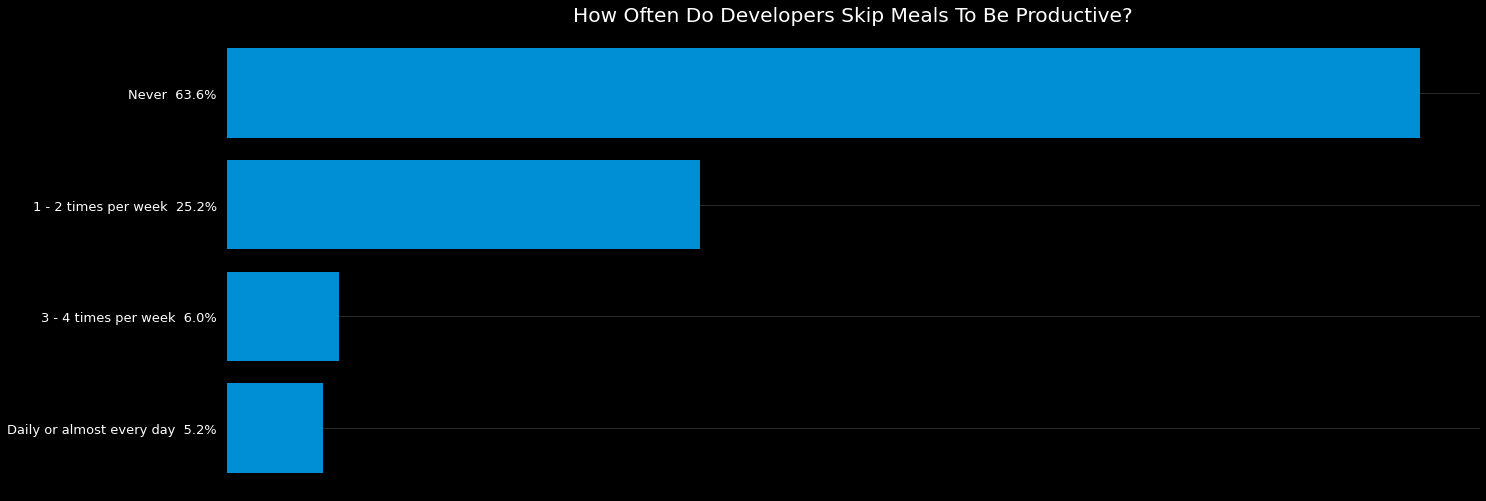

In [46]:
SkipMeals = data["SkipMeals"]   # We called necessary data

SkipMeals.dropna(inplace=True)    # We filter the data from NaN and empty spaces 

counted = Counter(SkipMeals)  # We count the number of each answer

Formation = ['Never','1 - 2 times per week','3 - 4 times per week','Daily or almost every day'] # We set the sequence
Formation.reverse()

key_Phrases = []    # It contein Phrases 
Quantity = []       # It contein Quantity of variable


for i in Formation:
    key_Phrases.append(i)           # Add Phrases into Phrases' list
    Quantity.append(counted[i])     # Add Quantity into Quantity' list
    

Build_Barh_sizes( key_Phrases , Quantity, SkipMeals ,"fivethirtyeight", False , (20,8), "How Often Do Developers Skip Meals To Be Productive?")  # Building a schedule


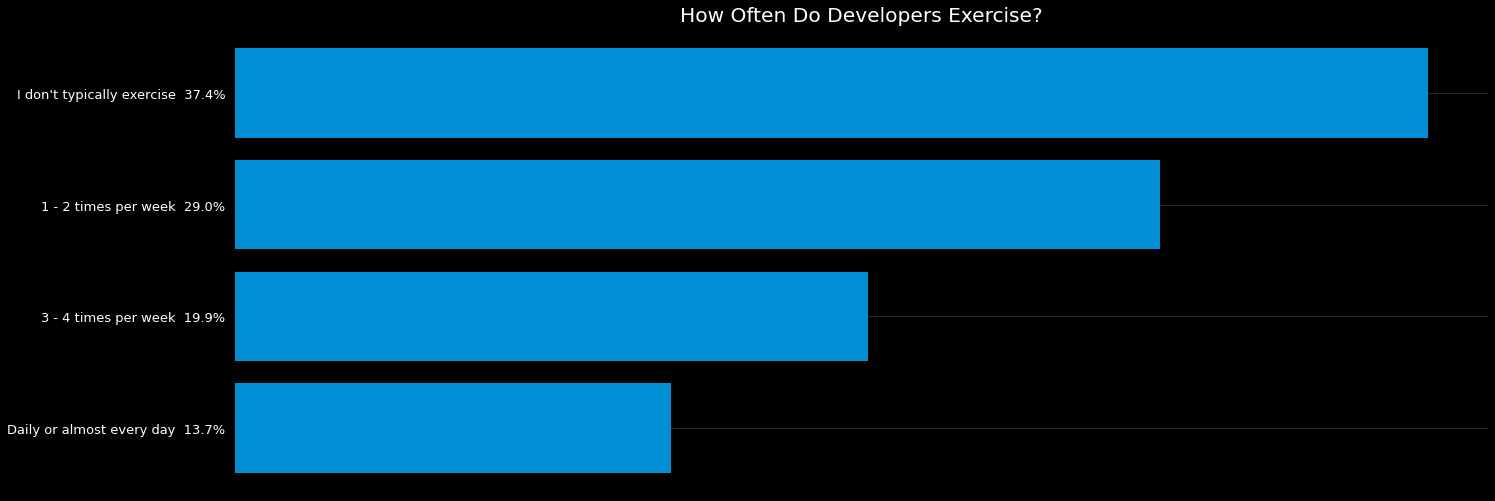

In [48]:
Exercise = data["Exercise"]   # We called necessary data

Exercise.dropna(inplace=True)    # We filter the data from NaN and empty spaces 

counted = Counter(Exercise)  # We count the number of each answer

Formation = ["I don't typically exercise",'1 - 2 times per week','3 - 4 times per week','Daily or almost every day'] # We set the sequence
Formation.reverse()

key_Phrases = []    # It contein Phrases 
Quantity = []       # It contein Quantity of variable


for i in Formation:
    key_Phrases.append(i)           # Add Phrases into Phrases' list
    Quantity.append(counted[i])     # Add Quantity into Quantity' list
    

Build_Barh_sizes( key_Phrases , Quantity, Exercise ,"fivethirtyeight", False , (20,8), "How Often Do Developers Exercise?")  # Building a schedule


## Technology

#### Most Popular Technologies

<h5 style="text-align:center; " > <b>Programming, Scripting, and Markup Languages

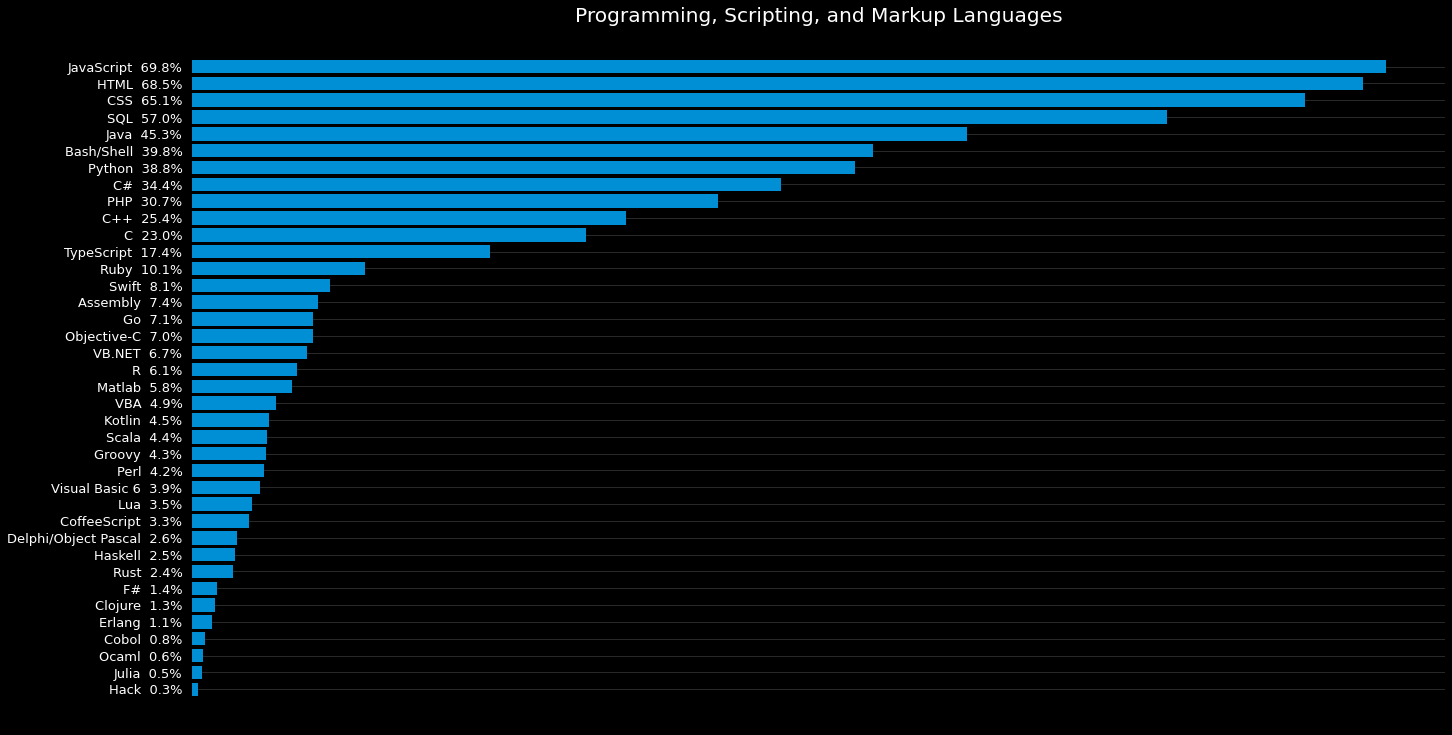

In [45]:
LanguageWorkedWith = data["LanguageWorkedWith"]   # We called necessary data

LanguageWorkedWith.dropna(inplace=True)    # We filter the data from NaN and empty spaces 

LanguageWorkedWith = LanguageWorkedWith.str.split(";")  # We are splitting variables    "split variable when program sees (;) "

Double_list_sort_count(LanguageWorkedWith , False)     # list sorter-Counter

Build_Barh_sizes( key_Phrases , Quantity, LanguageWorkedWith ,"fivethirtyeight", False , (20,12), "Programming, Scripting, and Markup Languages")  # Building a schedule


<h5 style="text-align:center; " > <b>Web Frameworks

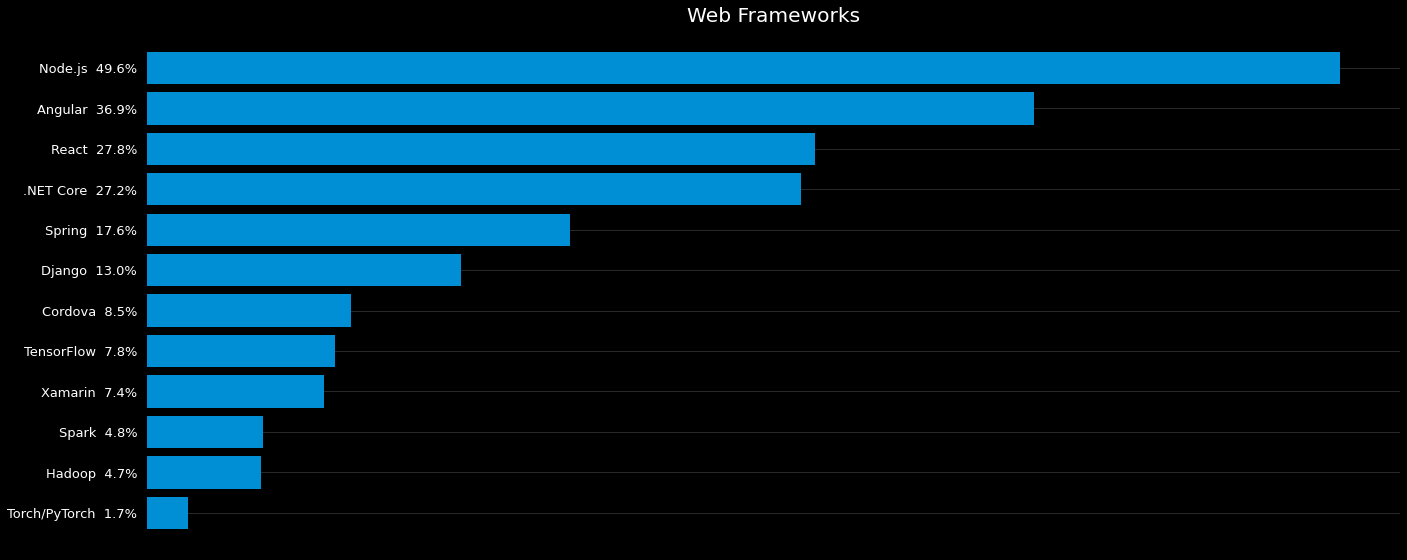

In [48]:
WebFrameWorkedWith = data["FrameworkWorkedWith"]   # We called necessary data

WebFrameWorkedWith.dropna(inplace=True)    # We filter the data from NaN and empty spaces 

WebFrameWorkedWith = WebFrameWorkedWith.str.split(";")  # We are splitting variables    "split variable when program sees (;) "

Double_list_sort_count(WebFrameWorkedWith , False)     # list sorter-Counter

Build_Barh_sizes( key_Phrases , Quantity, WebFrameWorkedWith ,"fivethirtyeight", False , (20,9), "Web Frameworks")  # Building a schedule


<h5 style="text-align:center; " > <b>Databases

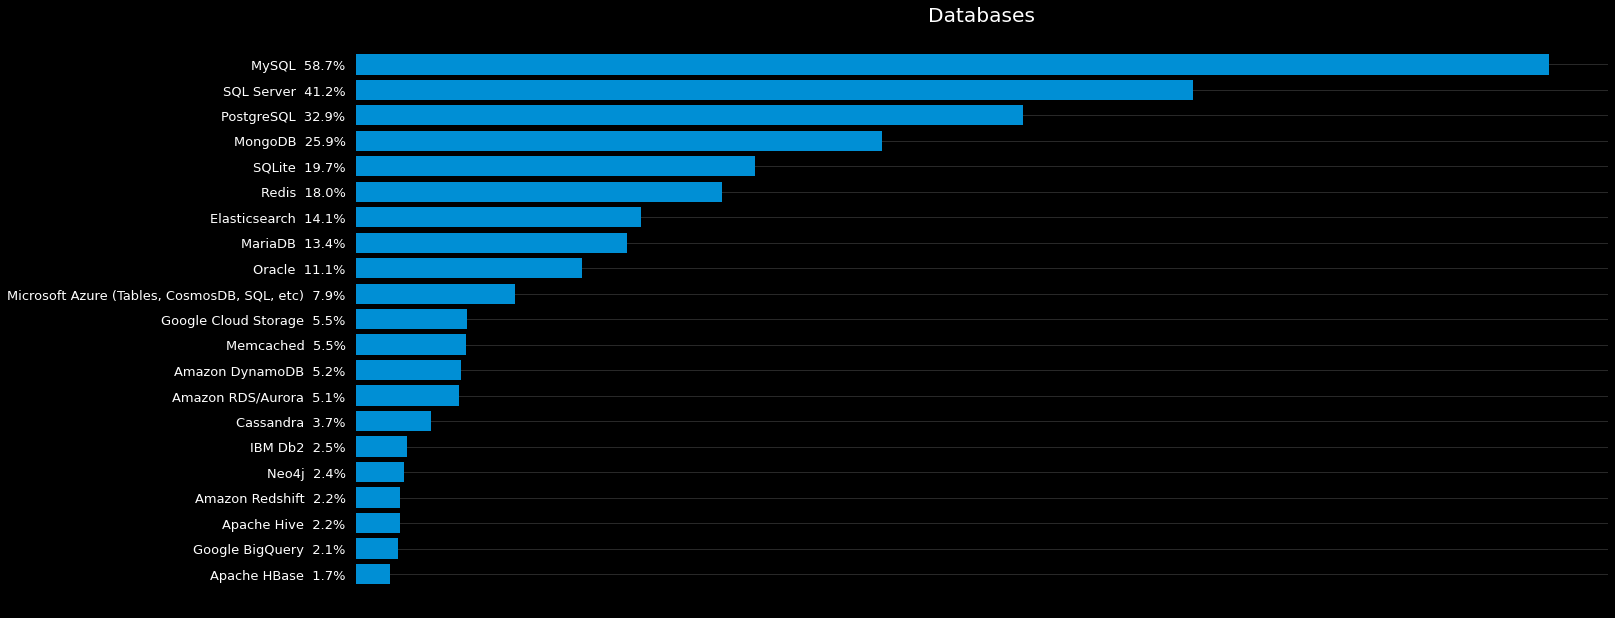

In [49]:
DatabaseWorkedWith = data["DatabaseWorkedWith"]   # We called necessary data

DatabaseWorkedWith.dropna(inplace=True)    # We filter the data from NaN and empty spaces 

DatabaseWorkedWith = DatabaseWorkedWith.str.split(";")  # We are splitting variables    "split variable when program sees (;) "

Double_list_sort_count(DatabaseWorkedWith , False)     # list sorter-Counter

Build_Barh_sizes( key_Phrases , Quantity, DatabaseWorkedWith ,"fivethirtyeight", False , (20,10), "Databases")  # Building a schedule


<h5 style="text-align:center; " > <b>Platforms

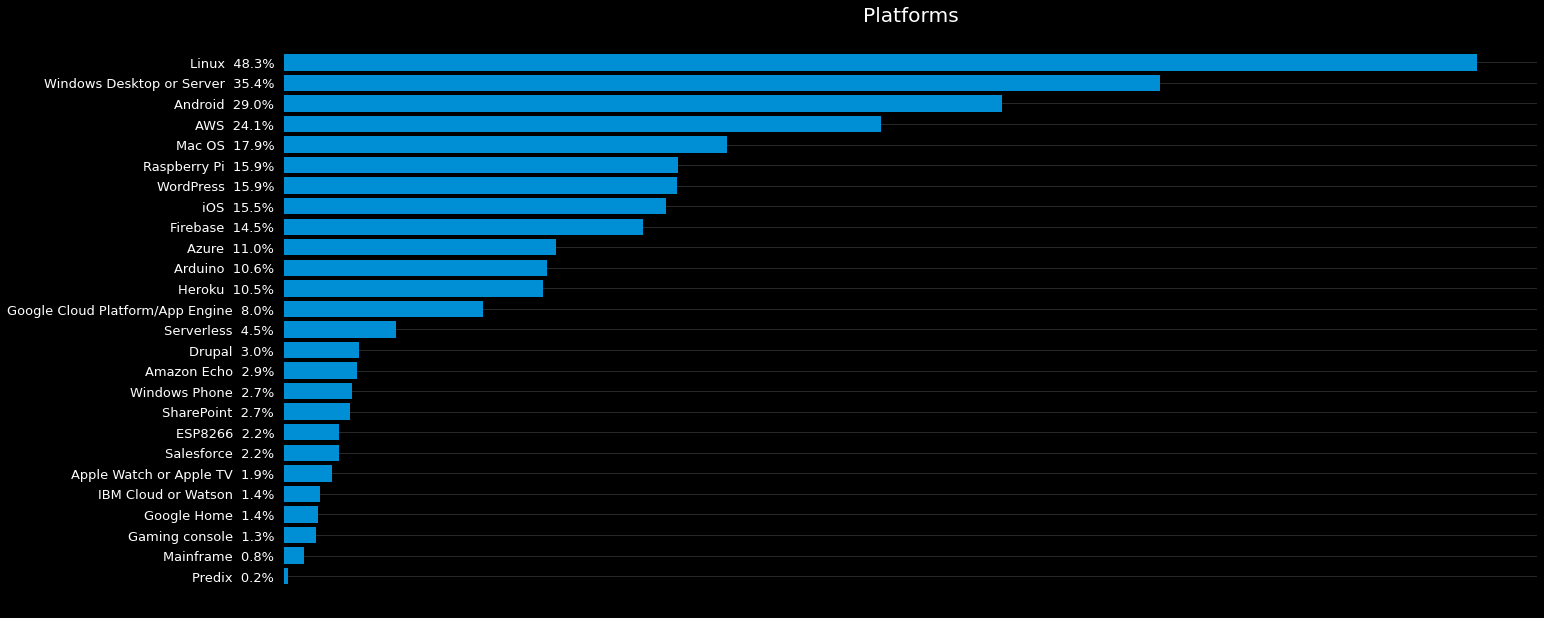

In [50]:
PlatformWorkedWith = data["PlatformWorkedWith"]   # We called necessary data

PlatformWorkedWith.dropna(inplace=True)    # We filter the data from NaN and empty spaces 

PlatformWorkedWith = PlatformWorkedWith.str.split(";")  # We are splitting variables    "split variable when program sees (;) "

Double_list_sort_count(PlatformWorkedWith , False)     # list sorter-Counter

Build_Barh_sizes( key_Phrases , Quantity, PlatformWorkedWith ,"fivethirtyeight", False , (20,10), "Platforms")  # Building a schedule


####  Development Environments and Tools

<h5 style="text-align:center; " > <b> Most Popular Development Environments

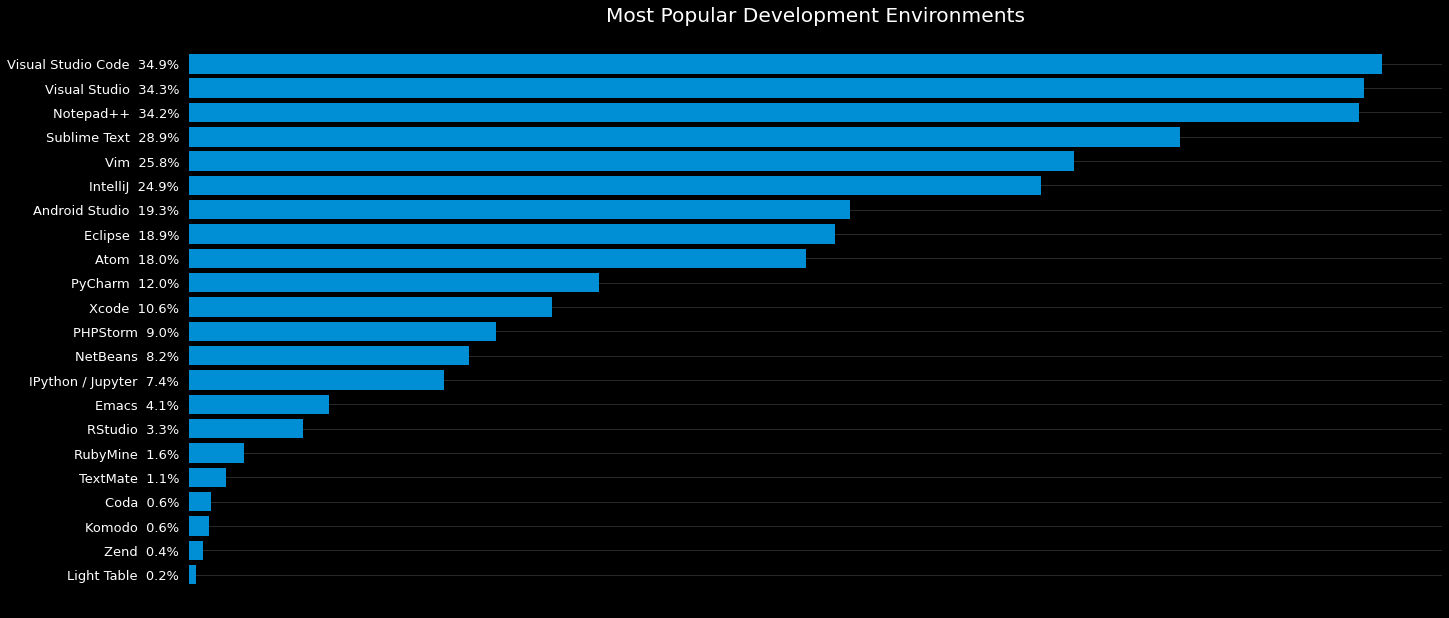

In [52]:
DevEnviron = data["IDE"]   # We called necessary data

DevEnviron.dropna(inplace=True)    # We filter the data from NaN and empty spaces 

DevEnviron = DevEnviron.str.split(";")  # We are splitting variables    "split variable when program sees (;) "

Double_list_sort_count(DevEnviron , False)     # list sorter-Counter

Build_Barh_sizes( key_Phrases , Quantity, DevEnviron ,"fivethirtyeight", False , (20,10), "Most Popular Development Environments")  # Building a schedule


C:\Users\Anri\AppData\Local\Temp\ipykernel_13184\3985776726.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_IDE.dropna(inplace = True)       # We filter the data from NaN and empty spaces


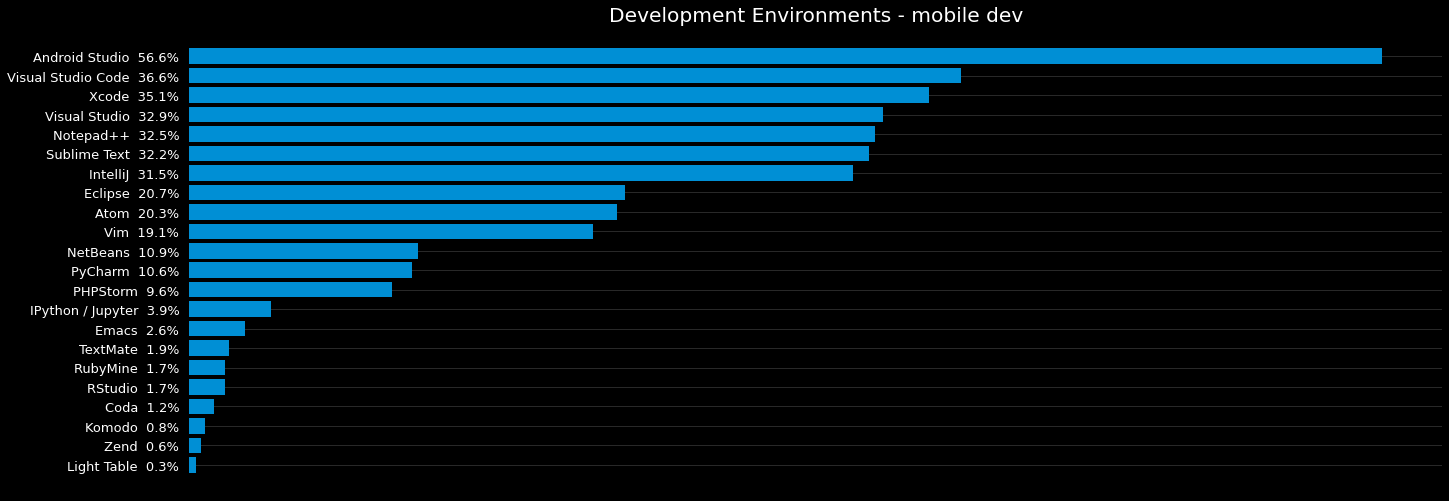

In [58]:
DevType = data["DevType"]    # We called necessary data
dev_environment = data["IDE"]    # We called necessary data
DevType.dropna(inplace = True)      # We filter the data from NaN and empty spaces


new_list = []  # creat new list for key Phrases

for i in DevType:
    if "Mobile" in i:           # check all variable and add specific ones into "new_list" 
        new_list.append(i)



counted = Counter(new_list)   # count key Phrases     reason: Eliminate repetitions
key_list = list(counted)    # take only key Phrases



all_ifo = []

for i in key_list:
    new_data = data[(dev_environment != "Nan") & (data["DevType"] == i) ]  # 

    new_IDE = new_data['IDE']   # save old data into new data

    new_IDE.dropna(inplace = True)       # We filter the data from NaN and empty spaces

    for i in new_IDE:
        all_ifo.append(i.split(";"))    # We are splitting variables    "split variable when program sees (;) "




Double_list_sort_count(all_ifo , False)     # list sorter-Counter

Build_Barh_sizes( key_Phrases , Quantity, all_ifo ,"fivethirtyeight", False , (20,8), "Development Environments - mobile dev")  # Building a schedule

C:\Users\Anri\AppData\Local\Temp\ipykernel_13184\2601622447.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_DevEnviron.dropna(inplace = True)       # We filter the data from NaN and empty spaces


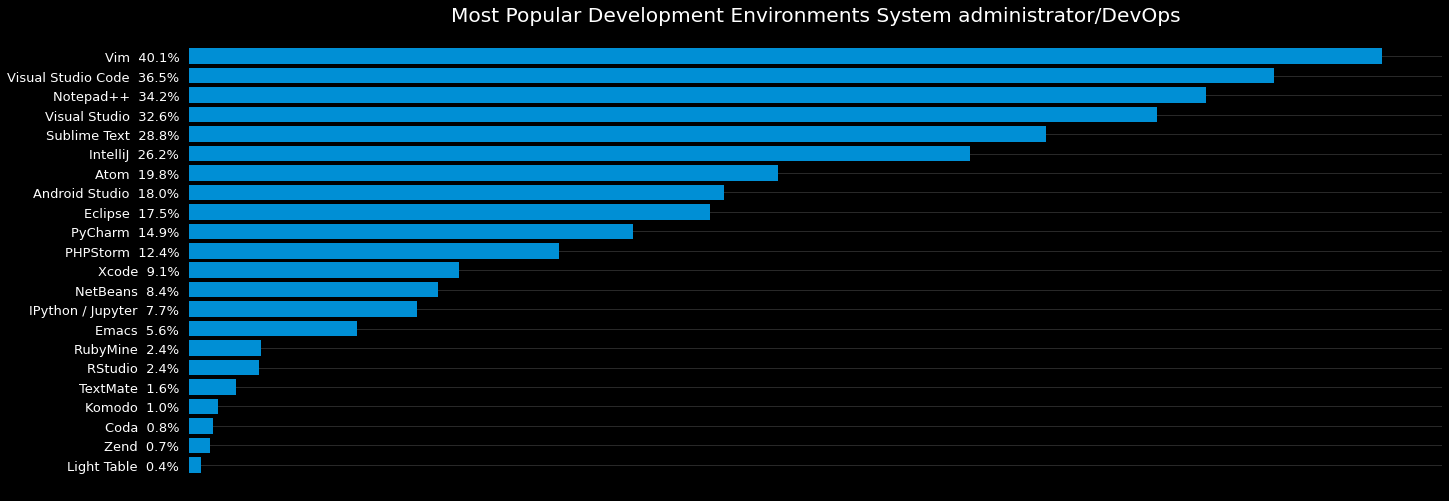

In [59]:
DevType = data["DevType"]    # We called necessary data
DevEnviron = data["IDE"]    # We called necessary data
DevType.dropna(inplace = True)      # We filter the data from NaN and empty spaces


new_list = []       # creat new list for key Phrases


for i in DevType:
    if "System administrator" in i or "DevOps" in i:
       new_list.append(i)       # check all variable and add specific ones into "new_list" 

counted = Counter(new_list) # count key Phrases     reason: Eliminate repetitions

key_list = list(counted)    # take only key Phrases




devtype_with_enironment = []


for i in key_list:
    new_data = data[(DevEnviron != "Nan") & (data["DevType"] == i) ]

    new_DevEnviron = new_data['IDE']     # save old data into new data

    new_DevEnviron.dropna(inplace = True)       # We filter the data from NaN and empty spaces

    for i in new_DevEnviron:
        devtype_with_enironment.append(i.split(";"))     # We are splitting variables    "split variable when program sees (;) "




Double_list_sort_count(devtype_with_enironment, False)  # list sorter-Counter

Build_Barh_sizes( key_Phrases , Quantity, devtype_with_enironment ,"fivethirtyeight", False , (20,8), "Most Popular Development Environments System administrator/DevOps") # Building a schedule

<h5 style="text-align:center; " > <b>Developers' Primary Operating Systems

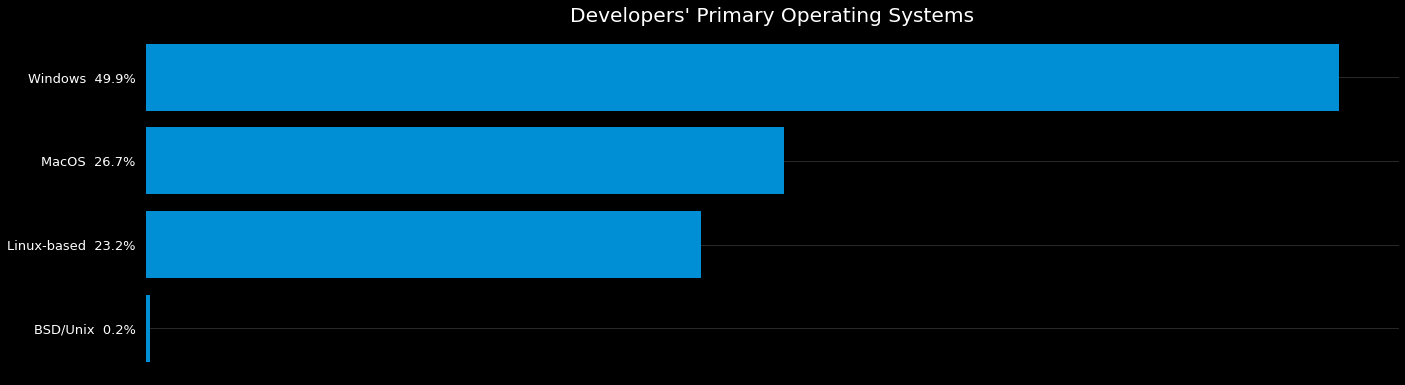

In [61]:
OpSys = data["OperatingSystem"]   # We called necessary data

OpSys.dropna(inplace=True)    # We filter the data from NaN and empty spaces 

OpSys = OpSys.str.split(";")  # We are splitting variables    "split variable when program sees (;) "

Double_list_sort_count(OpSys , False)     # list sorter-Counter

Build_Barh_sizes( key_Phrases , Quantity, OpSys ,"fivethirtyeight", False , (20,6), "Developers' Primary Operating Systems")  # Building a schedule


<h5 style="text-align:center; " > <b>How Many Monitors?

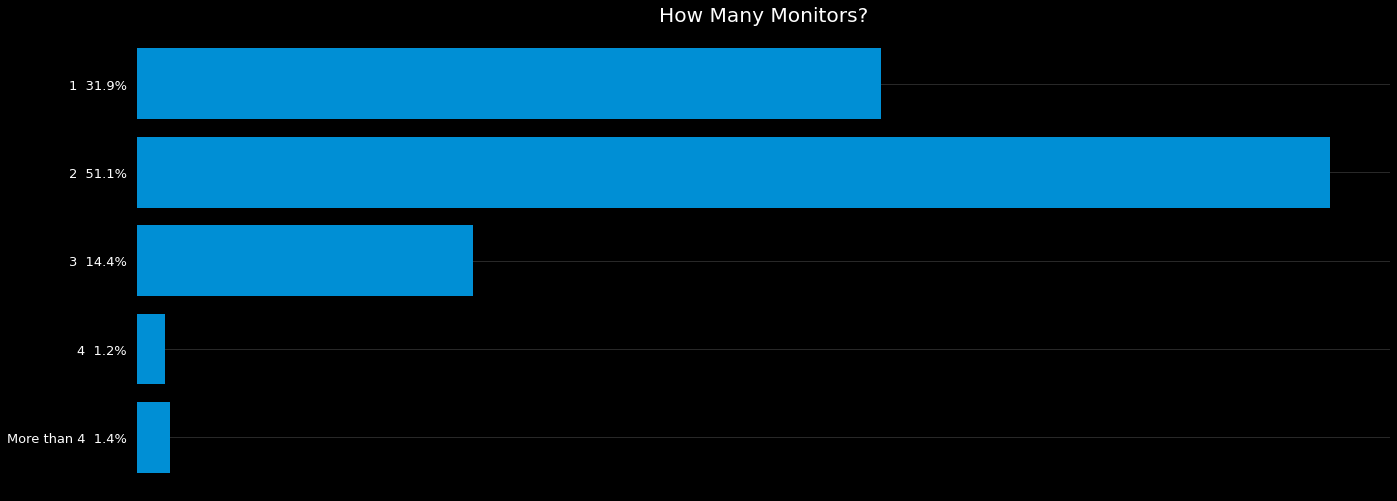

In [39]:
NumberMonitors = data["NumberMonitors"]   # We called necessary data

NumberMonitors.dropna(inplace=True)    # We filter the data from NaN and empty spaces 

counted = Counter(NumberMonitors)

Formation = ["More than 4", "4","3","2","1"] # We set the sequence


key_Phrases = []    # It contein Phrases 
Quantity = []       # It contein Quantity of variable


for i in Formation:
    key_Phrases.append(i)           # Add Phrases into Phrases' list
    Quantity.append(counted[i])     # Add Quantity into Quantity' list

Build_Barh_sizes( key_Phrases , Quantity, NumberMonitors ,"fivethirtyeight", False , (20,8), "How Many Monitors?")  # Building a schedule




#### Technology and Society


<h5 style="text-align:center; " > <b>What Do Developers Think Is Dangerous and Exciting About AI?

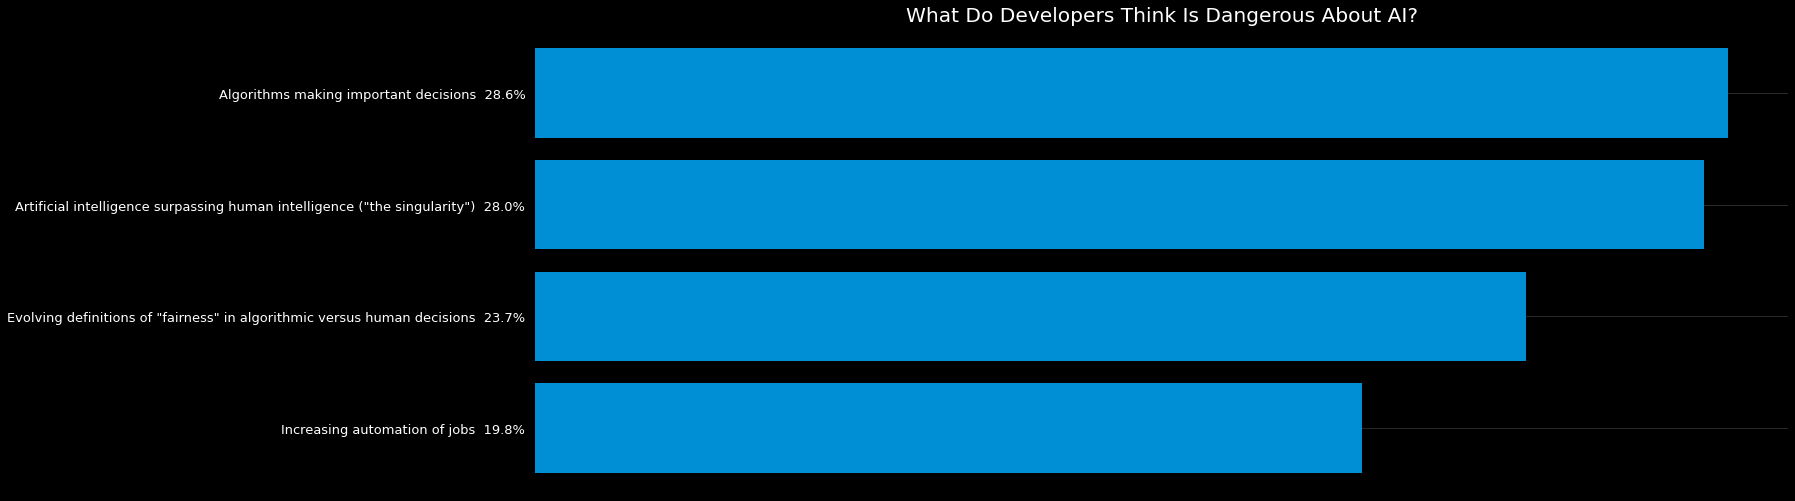

In [63]:
AIDangerous = data["AIDangerous"]   # We called necessary data

AIDangerous.dropna(inplace=True)    # We filter the data from NaN and empty spaces 

AIDangerous = AIDangerous.str.split(";")  # We are splitting variables    "split variable when program sees (;) "

Double_list_sort_count(AIDangerous , False)     # list sorter-Counter

Build_Barh_sizes( key_Phrases , Quantity, AIDangerous ,"fivethirtyeight", False , (20,8), "What Do Developers Think Is Dangerous aspect About AI?")  # Building a schedule


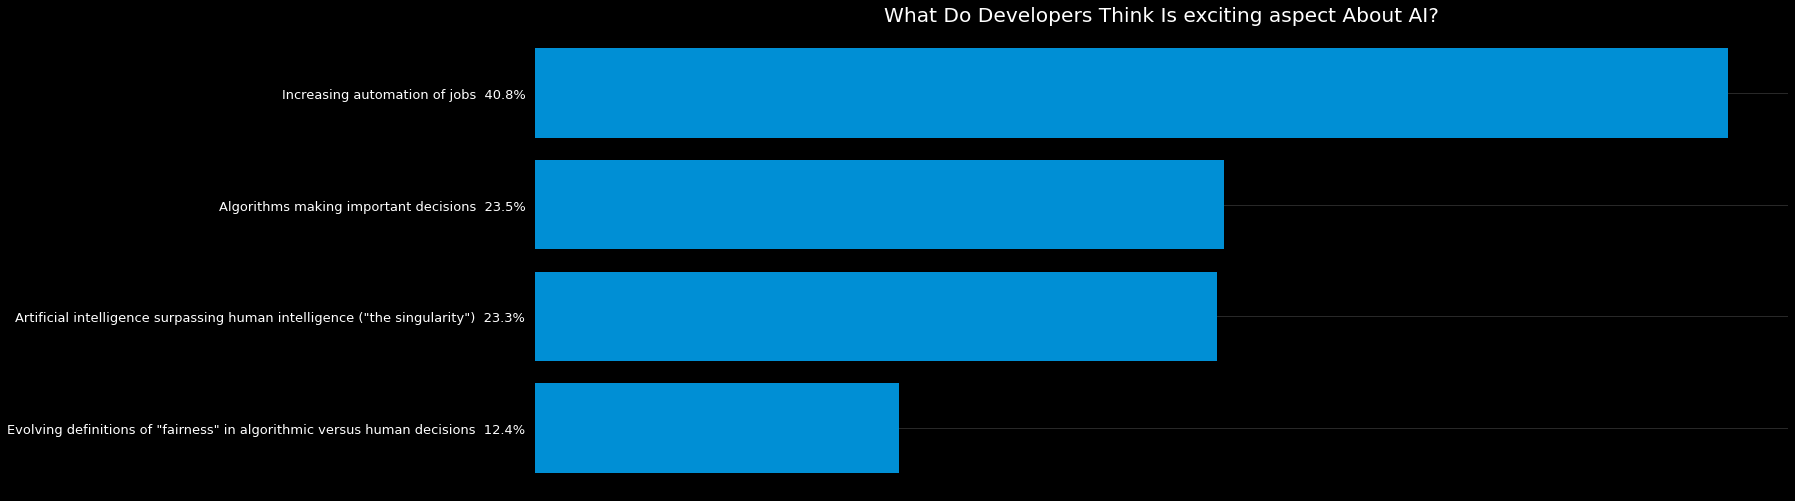

In [64]:
AIInteresting = data["AIInteresting"]   # We called necessary data

AIInteresting.dropna(inplace=True)    # We filter the data from NaN and empty spaces 

AIInteresting = AIInteresting.str.split(";")  # We are splitting variables    "split variable when program sees (;) "

Double_list_sort_count(AIInteresting , False)     # list sorter-Counter

Build_Barh_sizes( key_Phrases , Quantity, AIInteresting ,"fivethirtyeight", False , (20,8), "What Do Developers Think Is exciting aspect About AI?")  # Building a schedule


<h5 style="text-align:center; " > <b>Who is Primarily Responsible for Considering the Ramifications of AI?

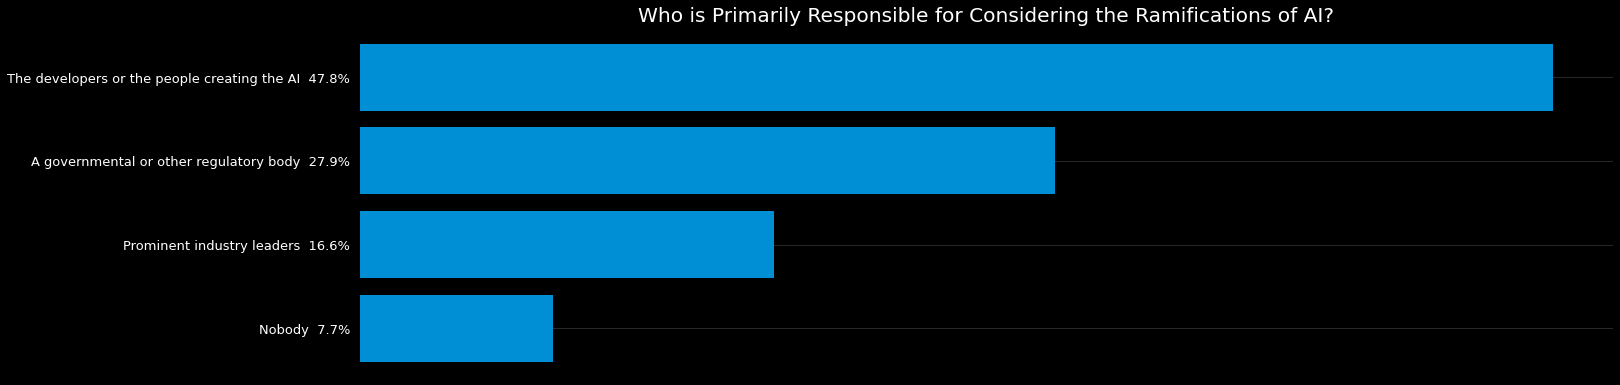

In [65]:
AIResponsible = data["AIResponsible"]   # We called necessary data

AIResponsible.dropna(inplace=True)    # We filter the data from NaN and empty spaces 

AIResponsible = AIResponsible.str.split(";")  # We are splitting variables    "split variable when program sees (;) "

Double_list_sort_count(AIResponsible , False)     # list sorter-Counter

Build_Barh_sizes( key_Phrases , Quantity, AIResponsible ,"fivethirtyeight", False , (20,6), "Who is Primarily Responsible for Considering the Ramifications of AI?")  # Building a schedule


<h5 style="text-align:center; " > <b>How Do Developers Feel About the Future of AI?

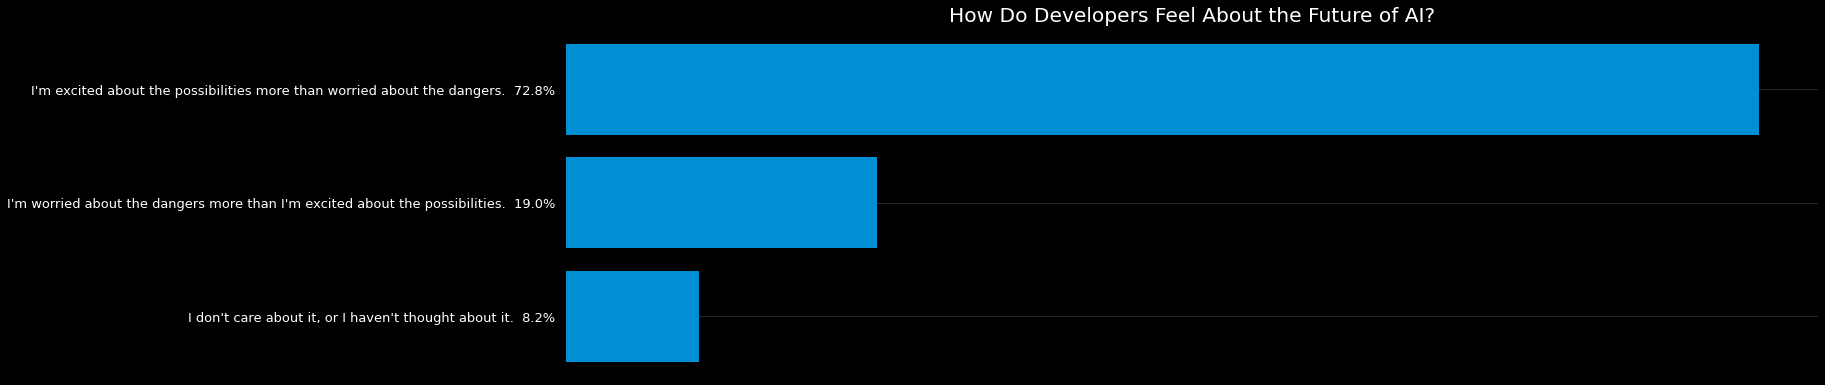

In [66]:
AIFuture = data["AIFuture"]   # We called necessary data

AIFuture.dropna(inplace=True)    # We filter the data from NaN and empty spaces 

AIFuture = AIFuture.str.split(";")  # We are splitting variables    "split variable when program sees (;) "

Double_list_sort_count(AIFuture , False)     # list sorter-Counter

Build_Barh_sizes( key_Phrases , Quantity, AIFuture ,"fivethirtyeight", False , (20,6), "How Do Developers Feel About the Future of AI?")  # Building a schedule


## Work

#### Employment

<h5 style="text-align:center; " > <b>Employment Status

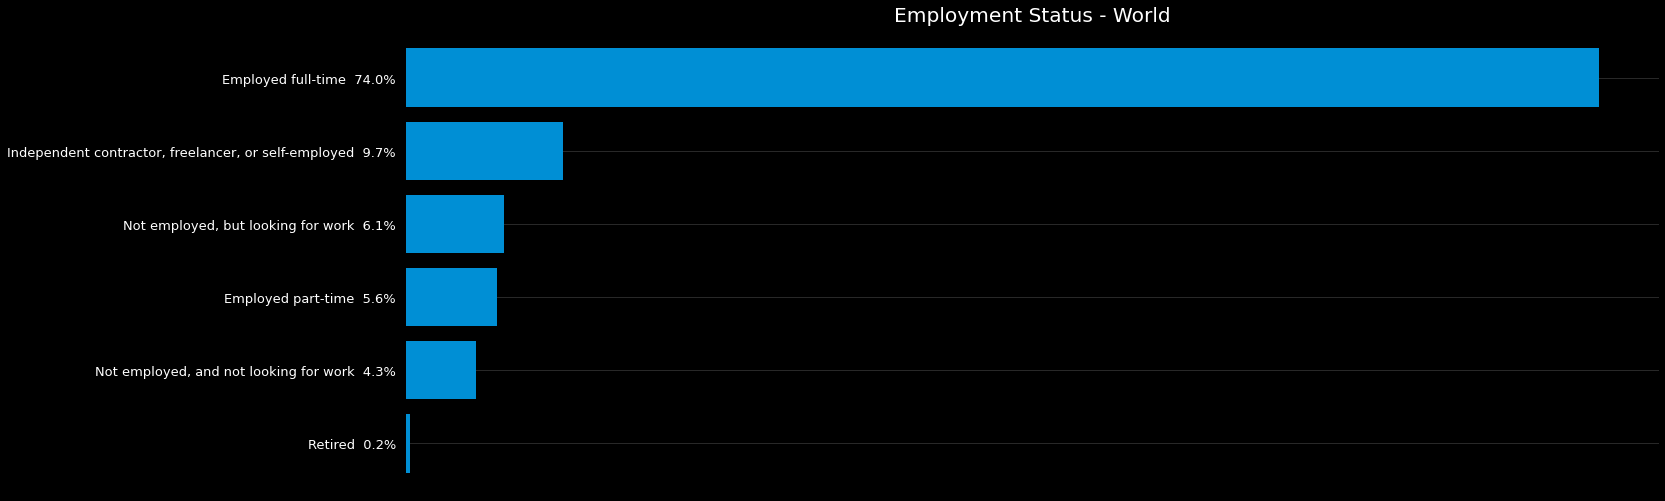

In [67]:
Employment = data['Employment']

Employment.dropna(inplace=True)


Dictionary_Distributor(Employment, False)


Build_Barh_sizes( key_Phrases , Quantity, Employment ,"fivethirtyeight", False , (20,8), "Employment Status - World")  # Building a schedule



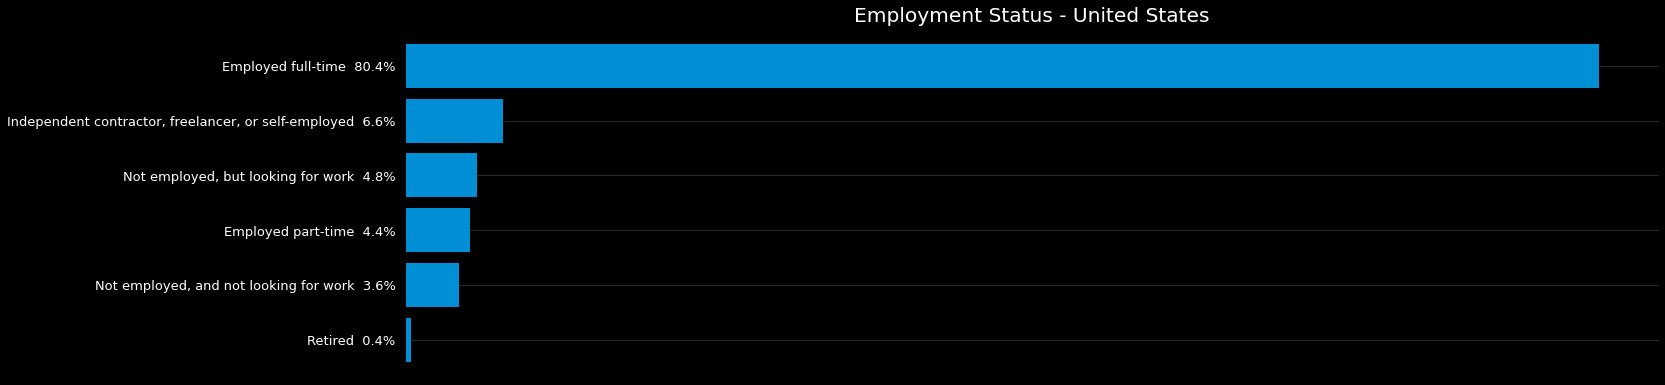

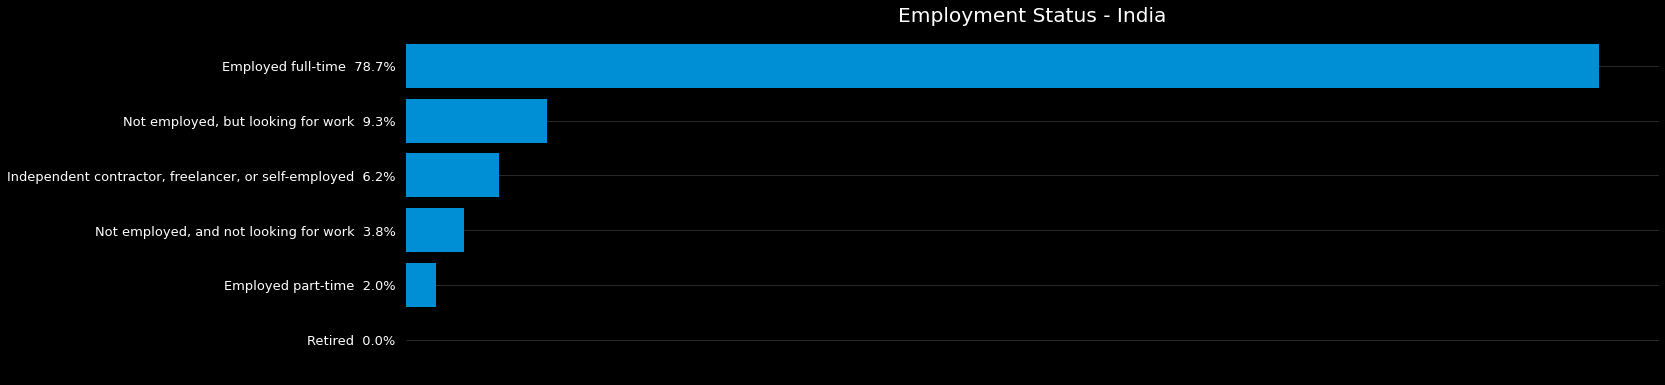

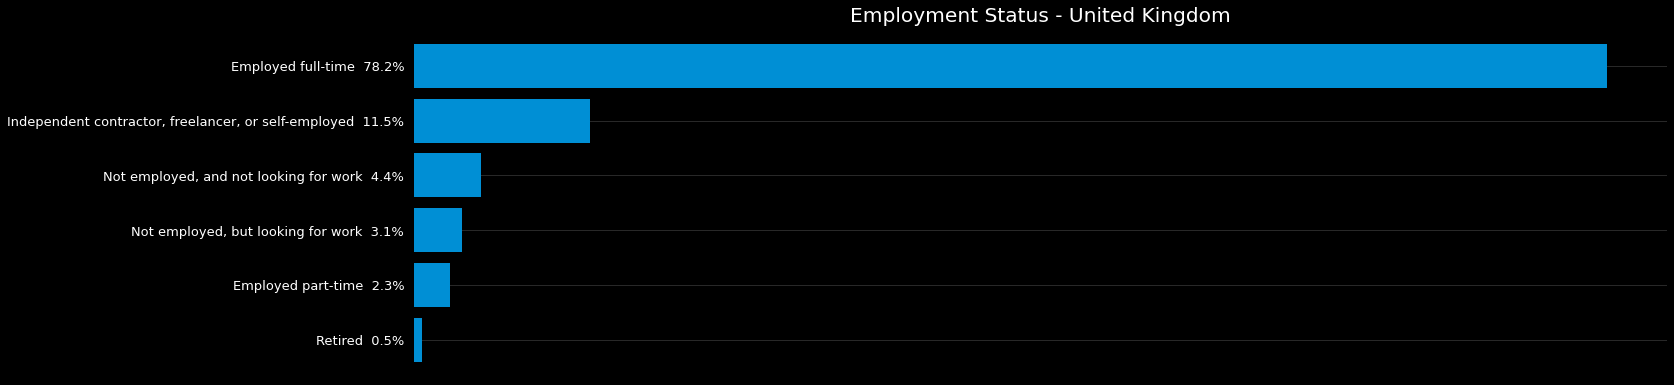

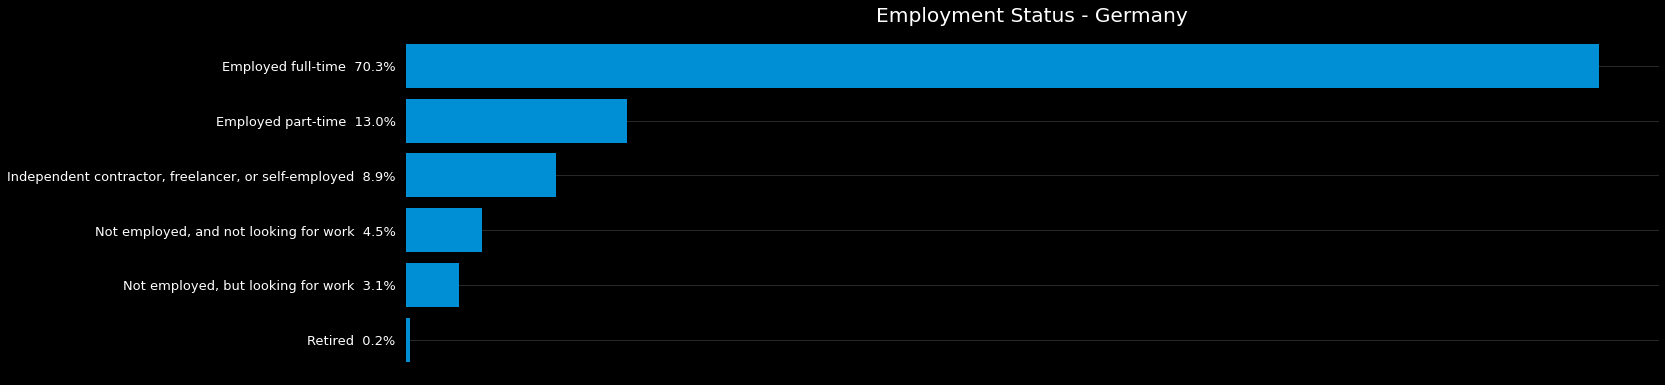

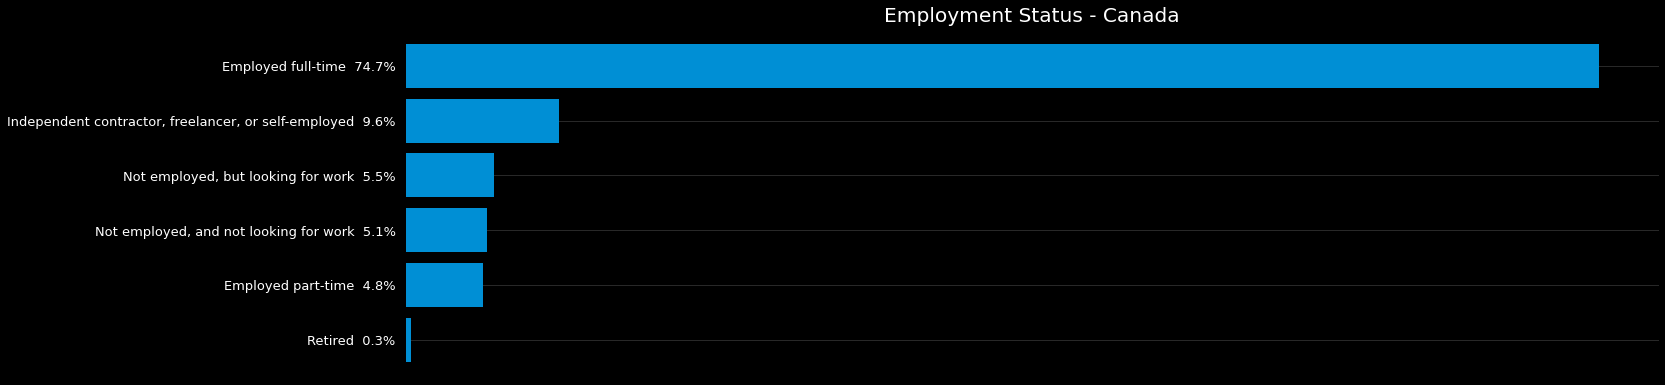

In [68]:
Employment = data["Employment"]
Employment.dropna(inplace=True)

Countries = ["United States", "India", "United Kingdom", "Germany","Canada"]

for i in Countries:

    new_Employment = data[ (Employment != "NaN")   &  ( data["Country"] == i ) ]

    new_Employment = new_Employment ["Employment"]


    Dictionary_Distributor(new_Employment , False)

    Build_Barh_sizes( key_Phrases , Quantity, new_Employment ,"fivethirtyeight", False , (20,6), "Employment Status - " + i)  # Building a schedule

####  Company Type

<h5 style="text-align:center; " > <b>Company Size

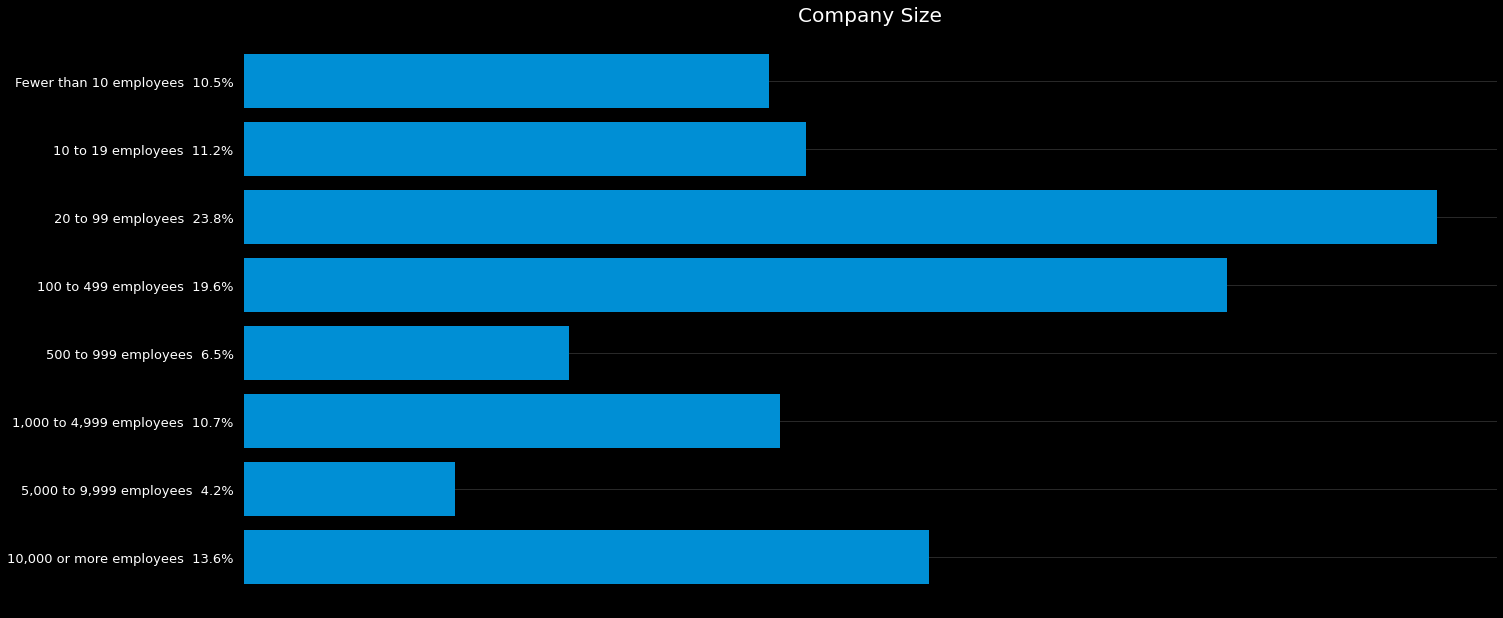

In [70]:
OrgSize = data['CompanySize']

OrgSize.dropna(inplace=True)

OrgSize_Counted = Counter(OrgSize)


key_Phrases = ['Fewer than 10 employees' ,'10 to 19 employees', '20 to 99 employees','100 to 499 employees', '500 to 999 employees','1,000 to 4,999 employees','5,000 to 9,999 employees','10,000 or more employees',]
key_Phrases.reverse()
Quantity = []

for i in key_Phrases:
    Quantity.append(OrgSize_Counted[i])


Build_Barh_sizes( key_Phrases , Quantity, OrgSize ,"fivethirtyeight", False , (20,10), "Company Size")  # Building a schedule



####  Career Values

<h5 style="text-align:center; " > <b>What Do Developers Hope To Be Doing in Five Years?

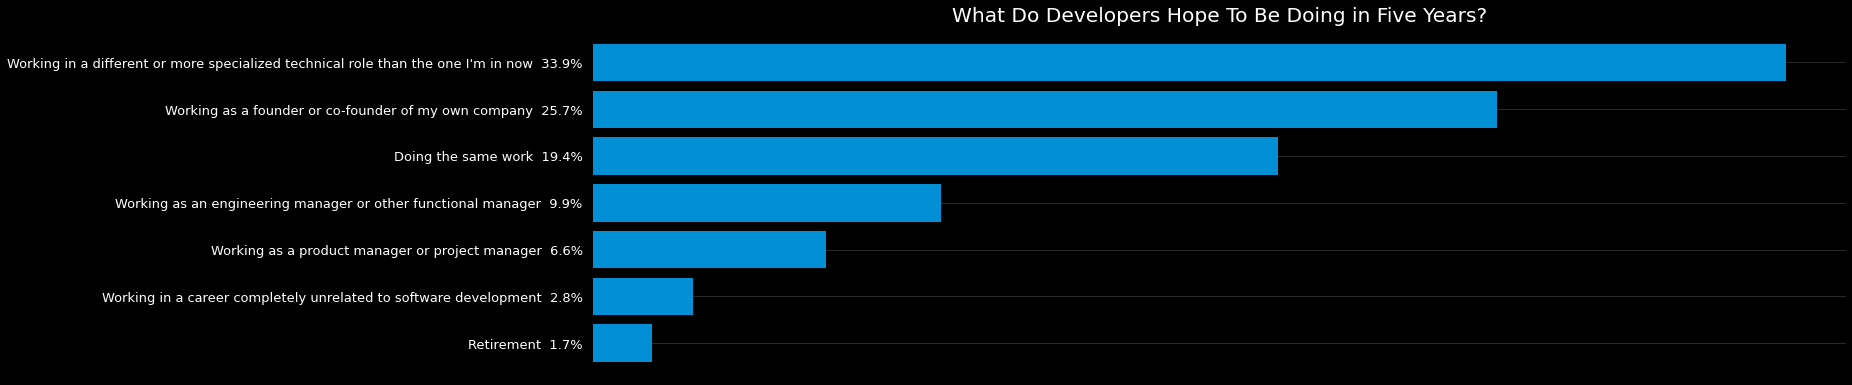

In [72]:
HopeFiveYears = data["HopeFiveYears"]
HopeFiveYears.dropna(inplace=True)

Dictionary_Distributor(HopeFiveYears , False)

Build_Barh_sizes( key_Phrases , Quantity, HopeFiveYears ,"fivethirtyeight", False , (20,6), "What Do Developers Hope To Be Doing in Five Years?")  # Building a schedule


<h5 style="text-align:center; " > <b>How Do Developers Feel About Their Careers and Jobs?

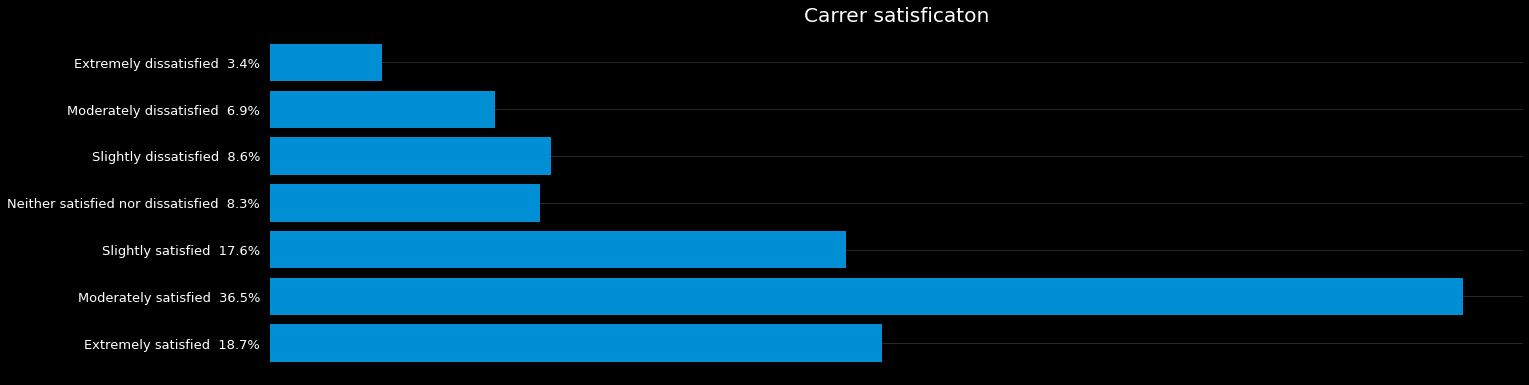

In [76]:
CareerSat = data["CareerSatisfaction"]
CareerSat.dropna(inplace=True)

CareerSat_Counted = Counter(CareerSat)

key_Phrases = ['Extremely dissatisfied','Moderately dissatisfied','Slightly dissatisfied','Neither satisfied nor dissatisfied','Slightly satisfied',"Moderately satisfied", "Extremely satisfied" ]
key_Phrases.reverse()
Quantity = []

for i in key_Phrases:
    Quantity.append(CareerSat_Counted[i])


Build_Barh_sizes( key_Phrases , Quantity, CareerSat ,"fivethirtyeight", False , (20,6), "Carrer satisficaton")  # Building a schedule



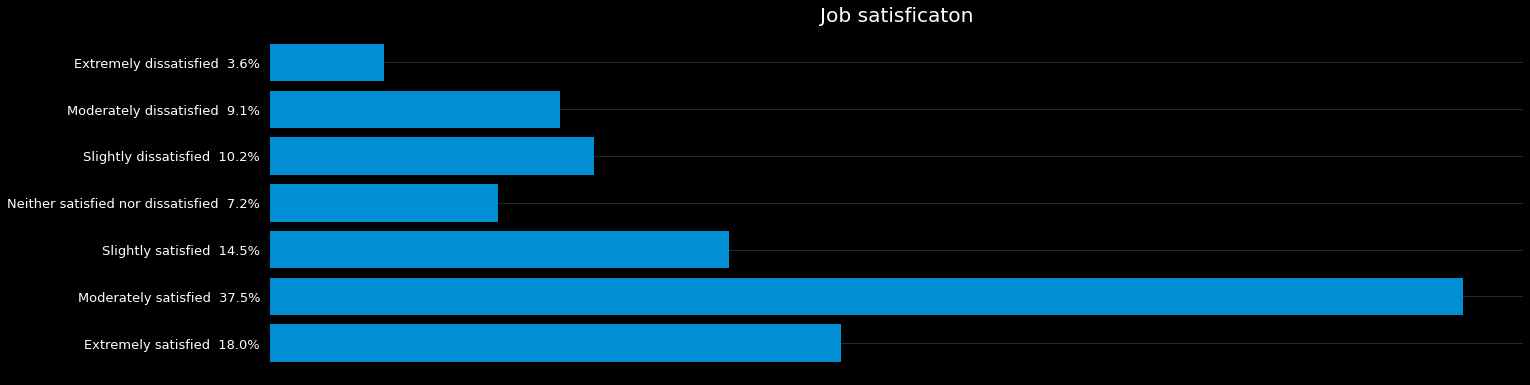

In [77]:
JobSat = data["JobSatisfaction"]
JobSat.dropna(inplace=True)

JobSat_Counted = Counter(JobSat)

key_Phrases = ['Extremely dissatisfied','Moderately dissatisfied','Slightly dissatisfied','Neither satisfied nor dissatisfied','Slightly satisfied',"Moderately satisfied", "Extremely satisfied" ]
key_Phrases.reverse()
Quantity = []

for i in key_Phrases:
    Quantity.append(JobSat_Counted[i])


Build_Barh_sizes( key_Phrases , Quantity, JobSat ,"fivethirtyeight", False , (20,6), "Job satisficaton")  # Building a schedule



####   Looking for a Job

<h5 style="text-align:center; " > <b>Job Search Status

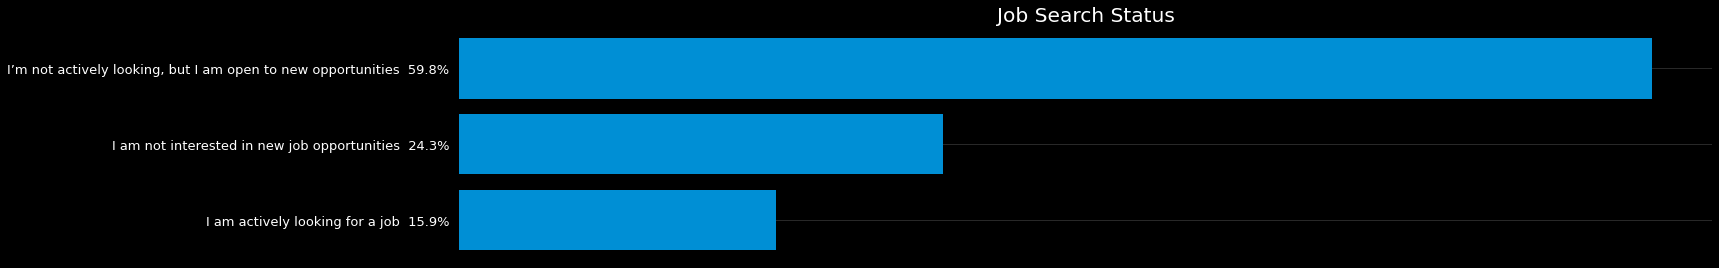

In [87]:
JobSeek = data["JobSearchStatus"]
JobSeek.dropna(inplace=True)

Dictionary_Distributor(JobSeek , False)

Build_Barh_sizes( key_Phrases , Quantity, JobSeek ,"fivethirtyeight", False , (20,4), "Job Search Status")  # Building a schedule


<h5 style="text-align:center; " > <b>Job Search Status by Geography

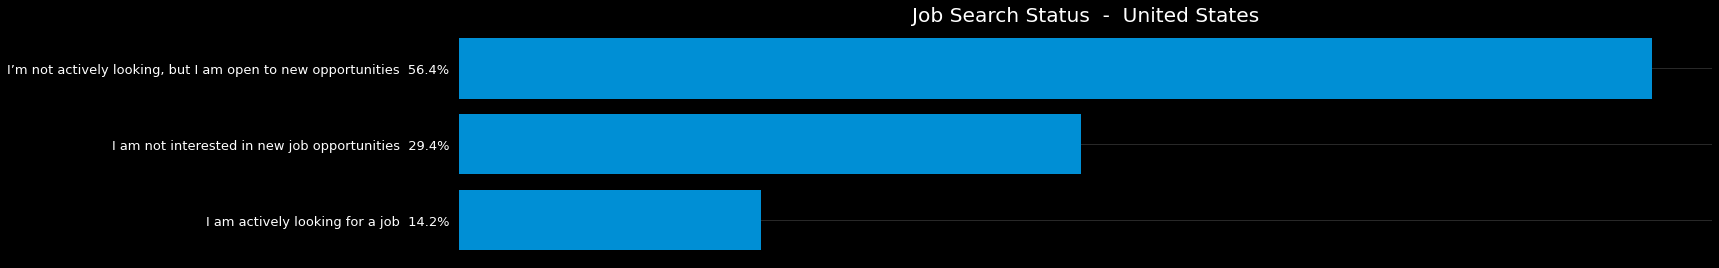

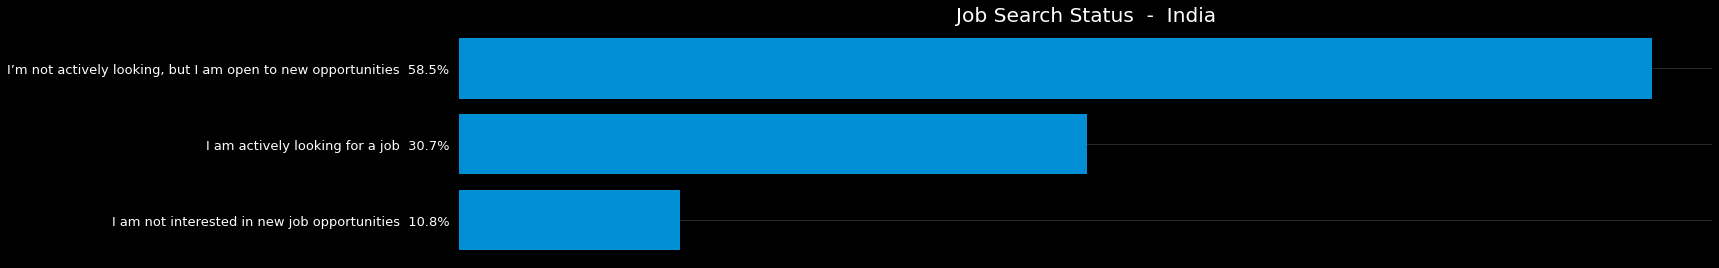

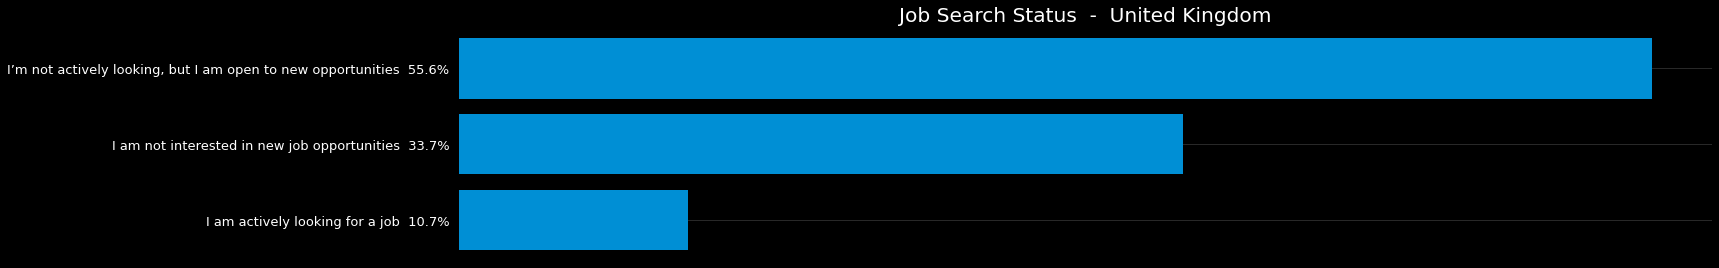

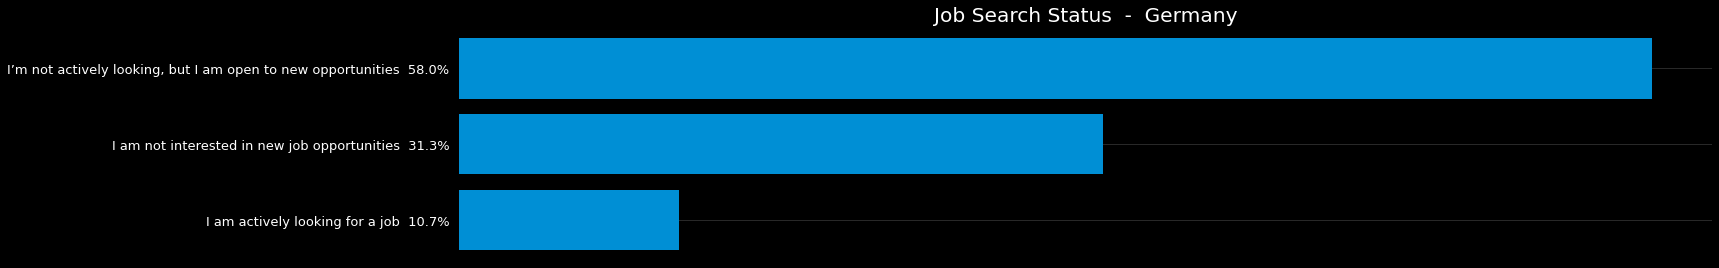

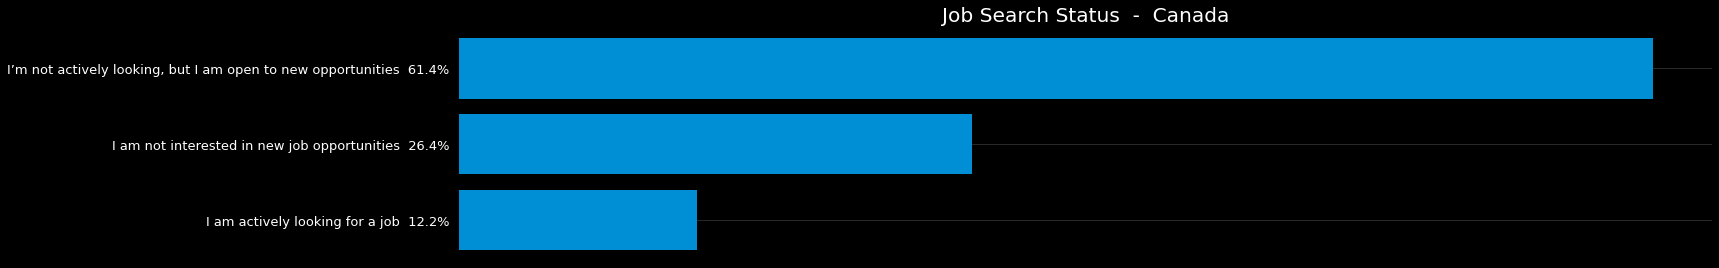

In [88]:
JobSeek = data["JobSearchStatus"]
JobSeek.dropna(inplace=True)

Countries = ["United States", "India", "United Kingdom", "Germany","Canada"]

for i in Countries:

    new_JobSeek = data[ (JobSeek != "NaN")   &  ( data["Country"] == i ) ]

    new_JobSeek = new_JobSeek ["JobSearchStatus"]


    Dictionary_Distributor(new_JobSeek , False)

    Build_Barh_sizes( key_Phrases , Quantity, new_JobSeek ,"fivethirtyeight", False , (20,4), "Job Search Status  -  " + i)  # Building a schedule



<h5 style="text-align:center; " > <b>Who's Actively Looking for a Job?

C:\Users\Anri\AppData\Local\Temp\ipykernel_13184\3336561531.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_DevType.dropna(inplace=True)


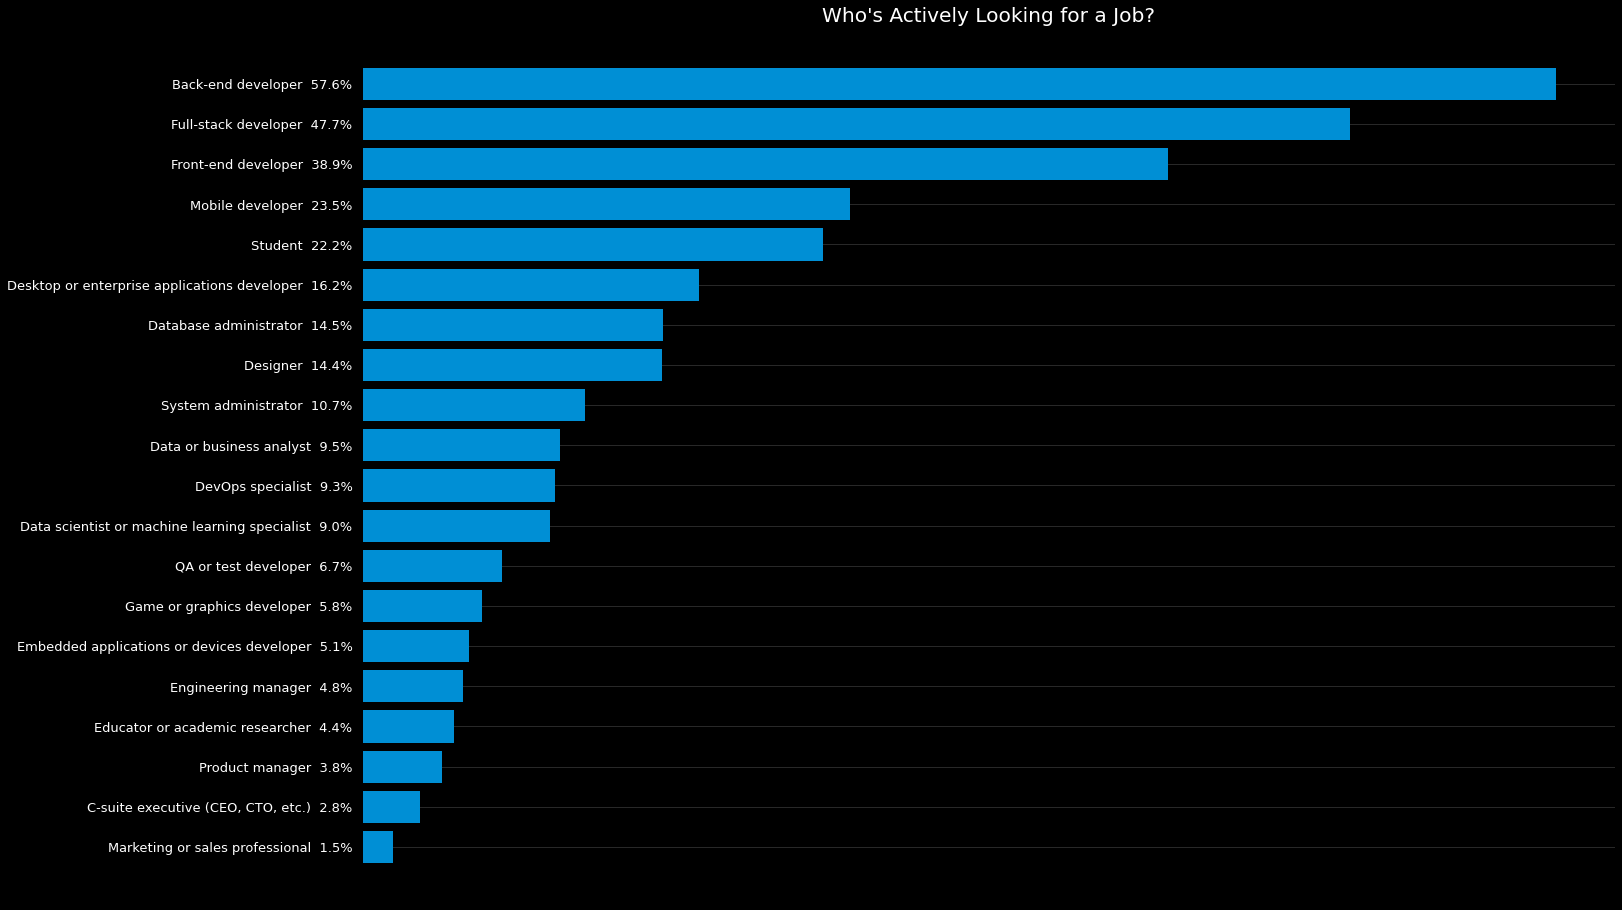

In [89]:
JobSeek = data["JobSearchStatus"]
JobSeek.dropna(inplace=True)


new_JobSeek = data[(JobSeek == 'I am actively looking for a job')  &  ( data["DevType"] != "NaN" ) ]

new_DevType = new_JobSeek ["DevType"]

new_DevType.dropna(inplace=True)

new_DevType = new_DevType.str.split(";")


Double_list_sort_count(new_DevType , False)

Build_Barh_sizes( key_Phrases , Quantity, new_DevType ,"fivethirtyeight", False , (20,15), "Who's Actively Looking for a Job?")  # Building a schedule

<h5 style="text-align:center; " > <b>How Long Ago Did Developers Last Change Jobs?

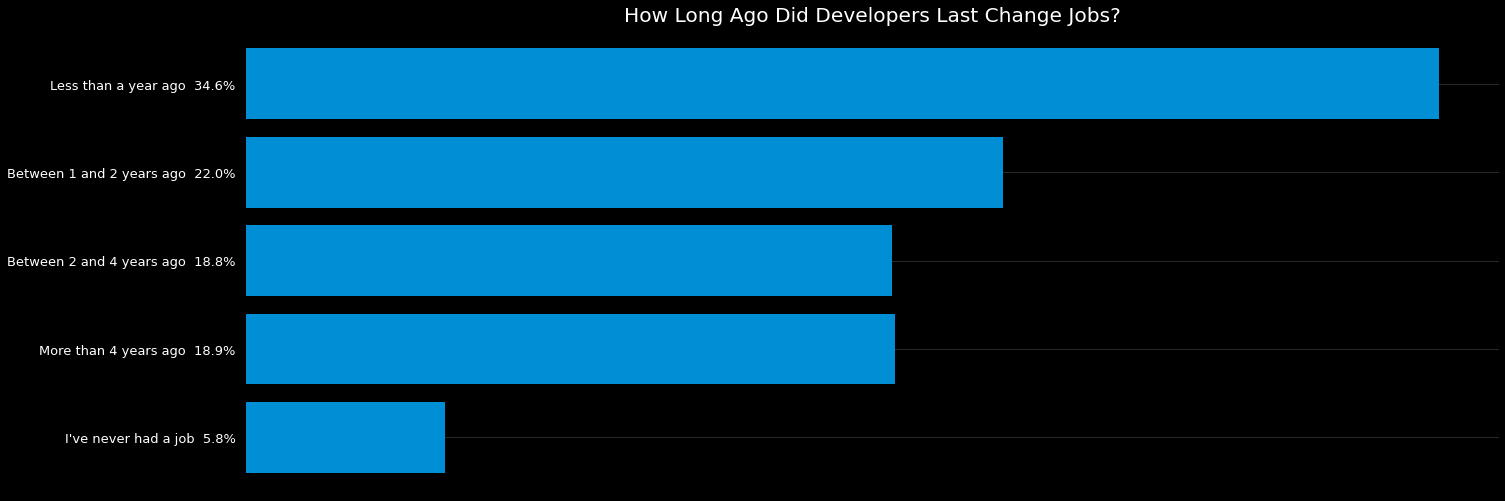

In [92]:
LastNewJob = data["LastNewJob"]
LastNewJob.dropna(inplace=True)

LastNewJob_Counted = Counter(LastNewJob)

key_Phrases = key_Phrases = ["Less than a year ago",'Between 1 and 2 years ago','Between 2 and 4 years ago',"More than 4 years ago" , "I've never had a job" ]
key_Phrases.reverse()
Quantity = []

for i in key_Phrases:
    Quantity.append(LastNewJob_Counted[i])


Build_Barh_sizes( key_Phrases , Quantity, LastNewJob ,"fivethirtyeight", False , (20,8), "How Long Ago Did Developers Last Change Jobs?")  # Building a schedule


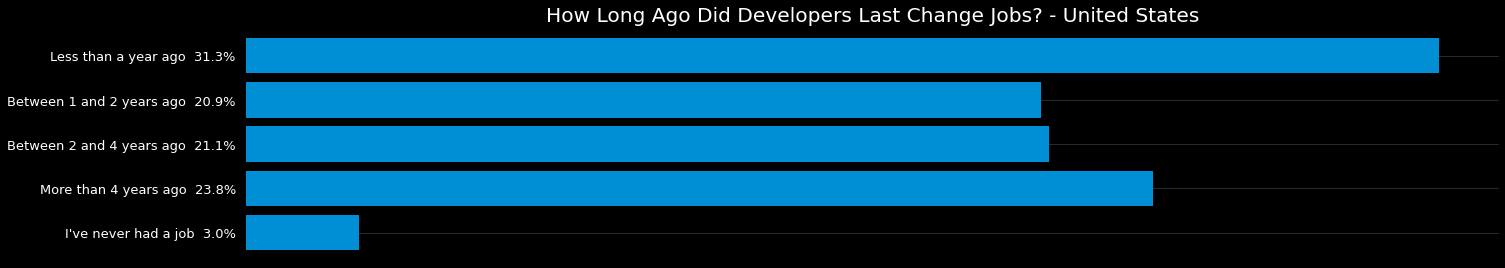

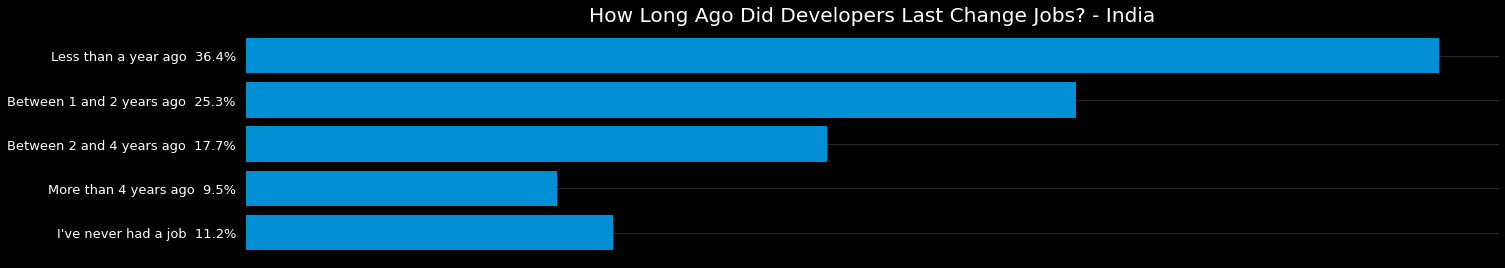

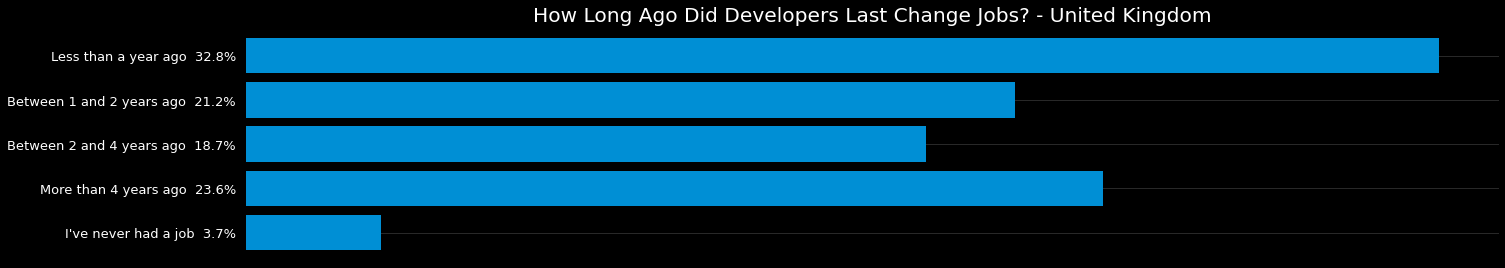

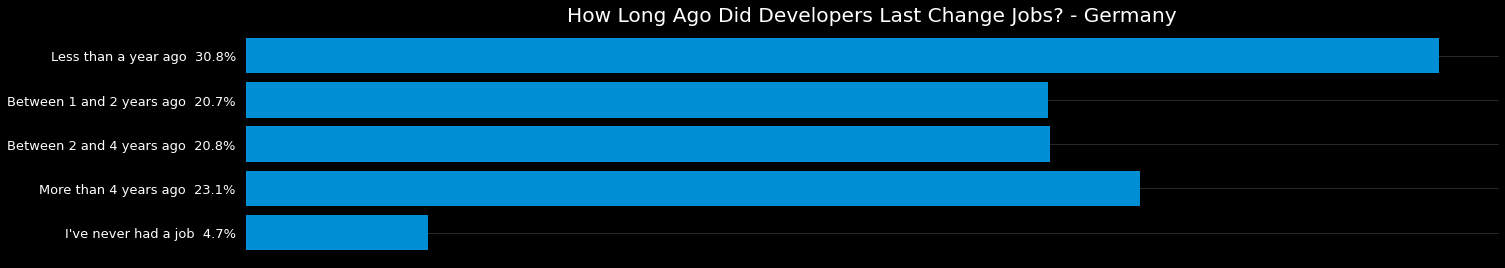

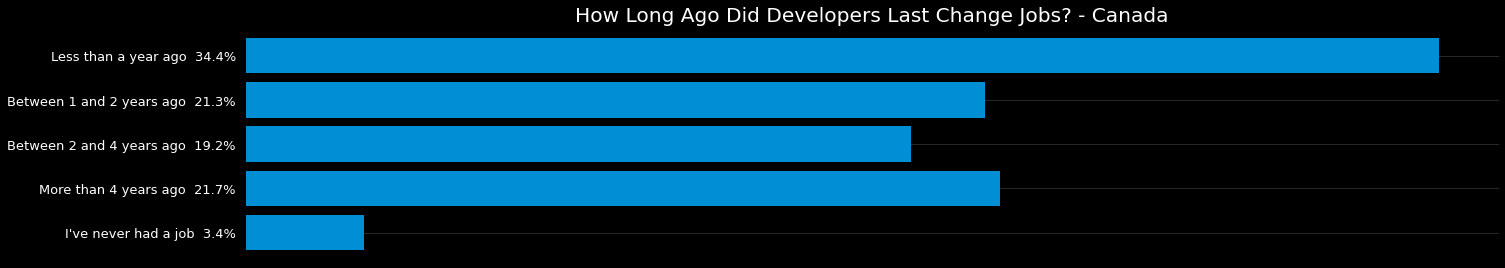

In [97]:
LastNewJob = data["LastNewJob"]
LastNewJob.dropna(inplace=True)

Countries = ["United States", "India", "United Kingdom", "Germany","Canada"]

for i in Countries:

    new_LastNewJob = data[ (LastNewJob != "NaN")   &  ( data["Country"] == i ) ]

    new_LastNewJob = new_LastNewJob ["LastNewJob"]

    

    LastNewJob_Counted = Counter(new_LastNewJob)

    key_Phrases = key_Phrases = ["Less than a year ago",'Between 1 and 2 years ago','Between 2 and 4 years ago',"More than 4 years ago" , "I've never had a job" ]
    key_Phrases.reverse()
    Quantity = []

    for k in key_Phrases:
        Quantity.append(LastNewJob_Counted[k])


    Build_Barh_sizes( key_Phrases , Quantity, new_LastNewJob ,"fivethirtyeight", False , (20,4), "How Long Ago Did Developers Last Change Jobs? - " + i)  # Building a schedule



#### Ethics

<h5 style="text-align:center; " > <b>What Would Developers Do If Asked to Write Code for an Unethical Purpose?

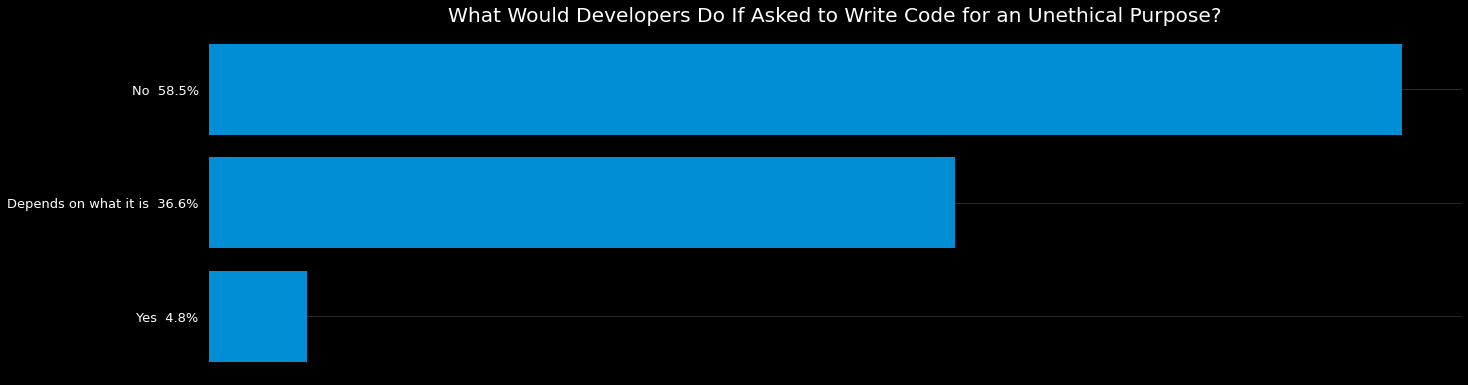

In [83]:
EthicsChoice = data["EthicsChoice"]
EthicsChoice.dropna(inplace=True)

Dictionary_Distributor(EthicsChoice , False)

Build_Barh_sizes( key_Phrases , Quantity, EthicsChoice ,"fivethirtyeight", False , (20,6), "What Would Developers Do If Asked to Write Code for an Unethical Purpose?")  # Building a schedule

<h5 style="text-align:center; " > <b> How Would Developers Report Ethical Problems with Code?

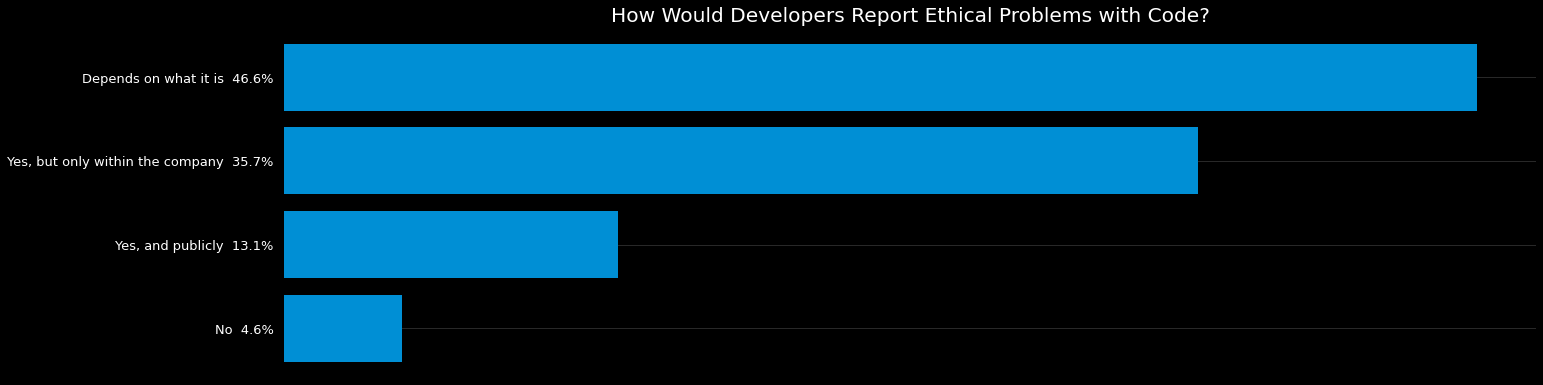

In [82]:
EthicsReport = data["EthicsReport"]
EthicsReport.dropna(inplace=True)

Dictionary_Distributor(EthicsReport , False)

Build_Barh_sizes( key_Phrases , Quantity, EthicsReport ,"fivethirtyeight", False , (20,6), "How Would Developers Report Ethical Problems with Code?")  # Building a schedule

<h5 style="text-align:center; " > <b> Who Is Ultimately Most Responsible for Code That Accomplishes Something Unethical?

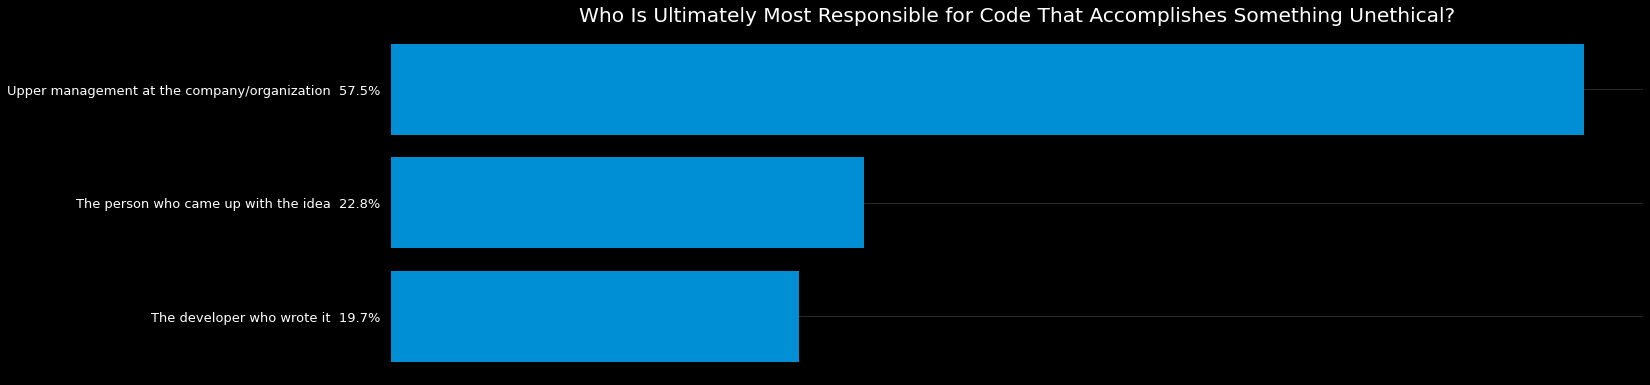

In [84]:
EthicsResponsible = data["EthicsResponsible"]
EthicsResponsible.dropna(inplace=True)

Dictionary_Distributor(EthicsResponsible , False)

Build_Barh_sizes( key_Phrases , Quantity, EthicsResponsible ,"fivethirtyeight", False , (20,6), "Who Is Ultimately Most Responsible for Code That Accomplishes Something Unethical?")  # Building a schedule

<h5 style="text-align:center; " > <b> Do Developers Have an Obligation to Consider the Ethical Implications of Their Code?

####     Development Practices

<h5 style="text-align:center; " > <b>What Do Developers Use to Stay Comfortable While Working?

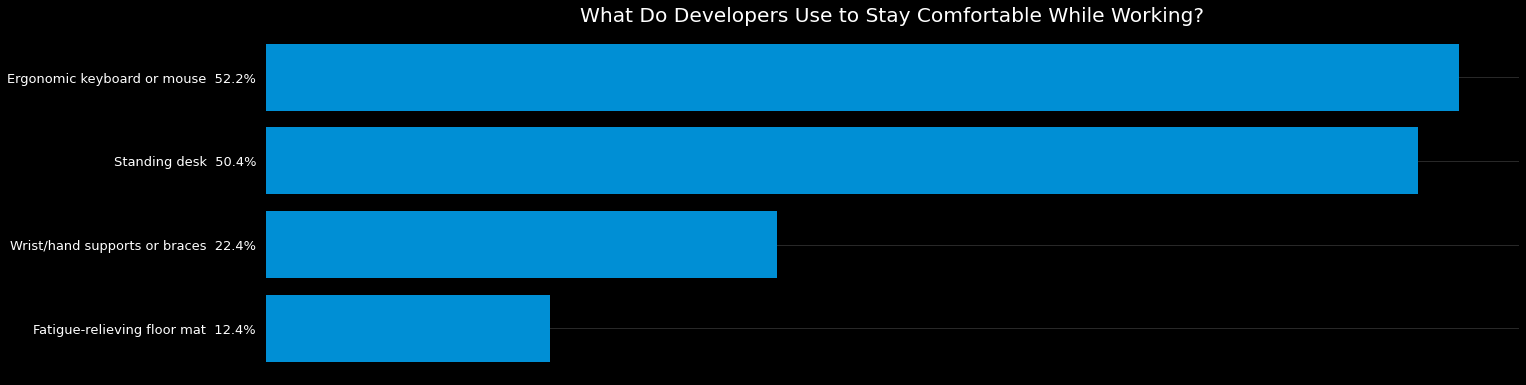

In [100]:
ErgonomicDevices = data["ErgonomicDevices"]
ErgonomicDevices.dropna(inplace=True)

ErgonomicDevices = ErgonomicDevices.str.split(";")

Double_list_sort_count(ErgonomicDevices , False)

Build_Barh_sizes( key_Phrases , Quantity, ErgonomicDevices ,"fivethirtyeight", False , (20,6), "What Do Developers Use to Stay Comfortable While Working?")  # Building a schedule

<h5 style="text-align:center; " > <b>Which Methodologies Do Developers Use?

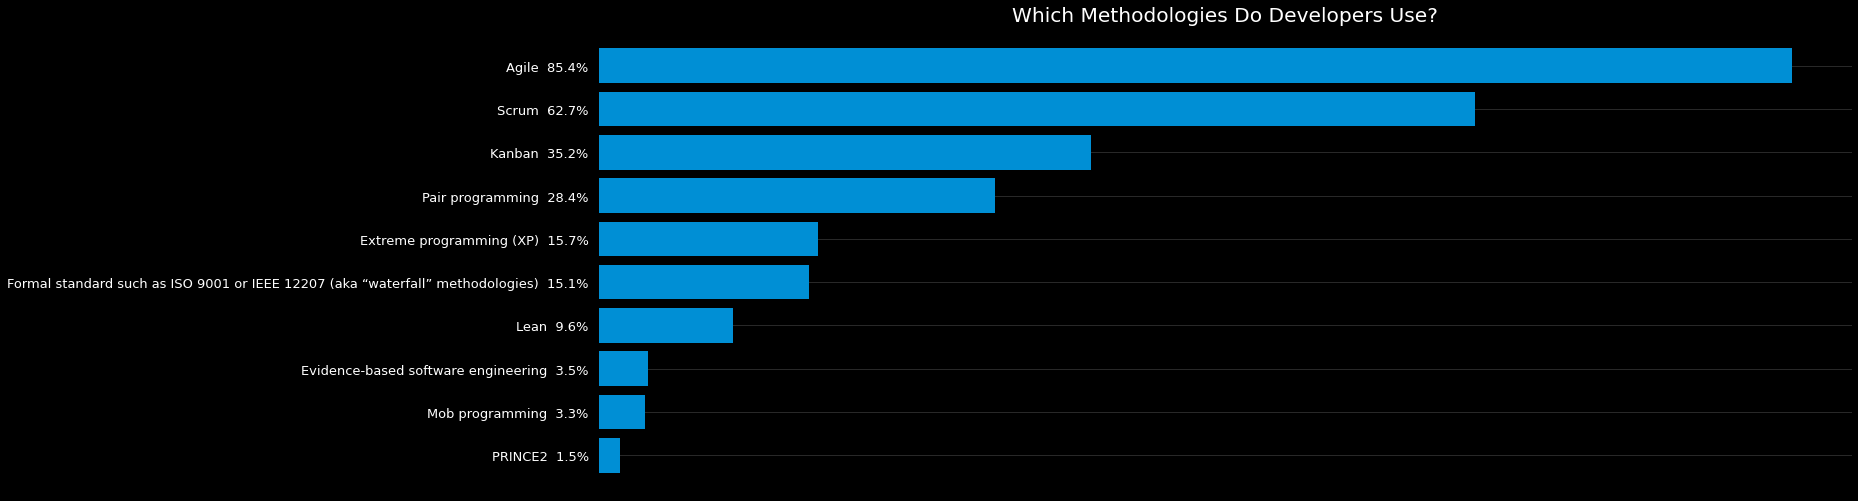

In [101]:
Methodology = data["Methodology"]
Methodology.dropna(inplace=True)
Methodology = Methodology.str.split(";")


Double_list_sort_count(Methodology , False)

Build_Barh_sizes( key_Phrases , Quantity, Methodology ,"fivethirtyeight", False , (20,8), "Which Methodologies Do Developers Use?")  # Building a schedule

<h5 style="text-align:center; " > <b> How Long Do Developers Expect New Coworkers to Take to Be Productive?

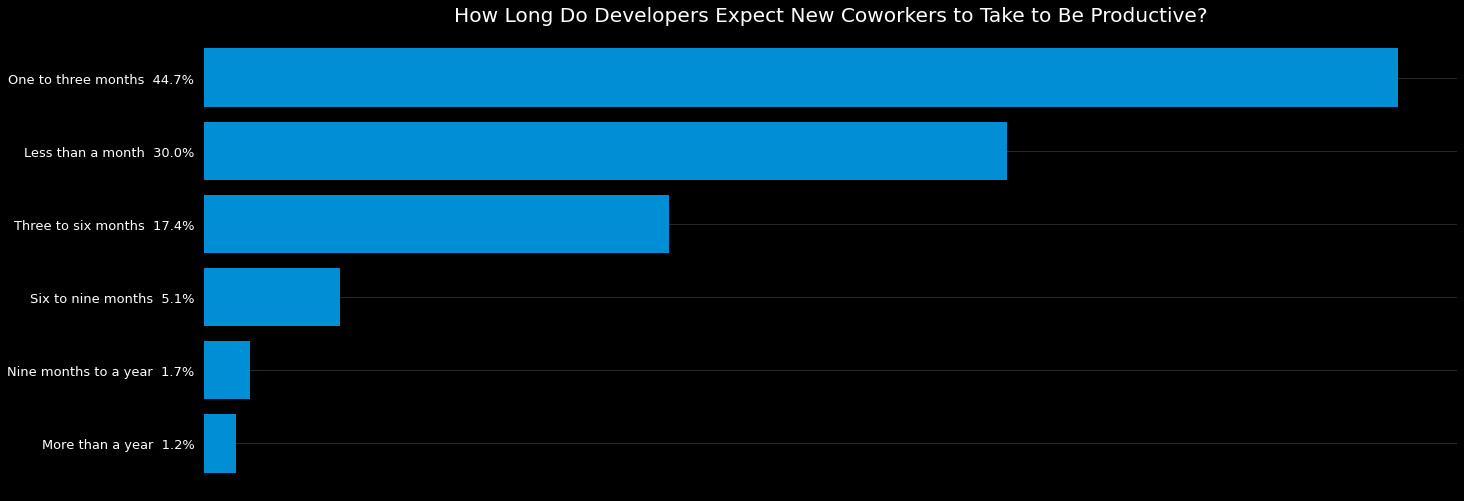

In [105]:
TimeFullyProductive = data["TimeFullyProductive"]
TimeFullyProductive.dropna(inplace=True)
TimeFullyProductive = TimeFullyProductive.str.split(";")


Double_list_sort_count(TimeFullyProductive , False)

Build_Barh_sizes( key_Phrases , Quantity, TimeFullyProductive ,"fivethirtyeight", False , (20,8), "How Long Do Developers Expect New Coworkers to Take to Be Productive?")  # Building a schedule

<h5 style="text-align:center; " > <b>Version Control

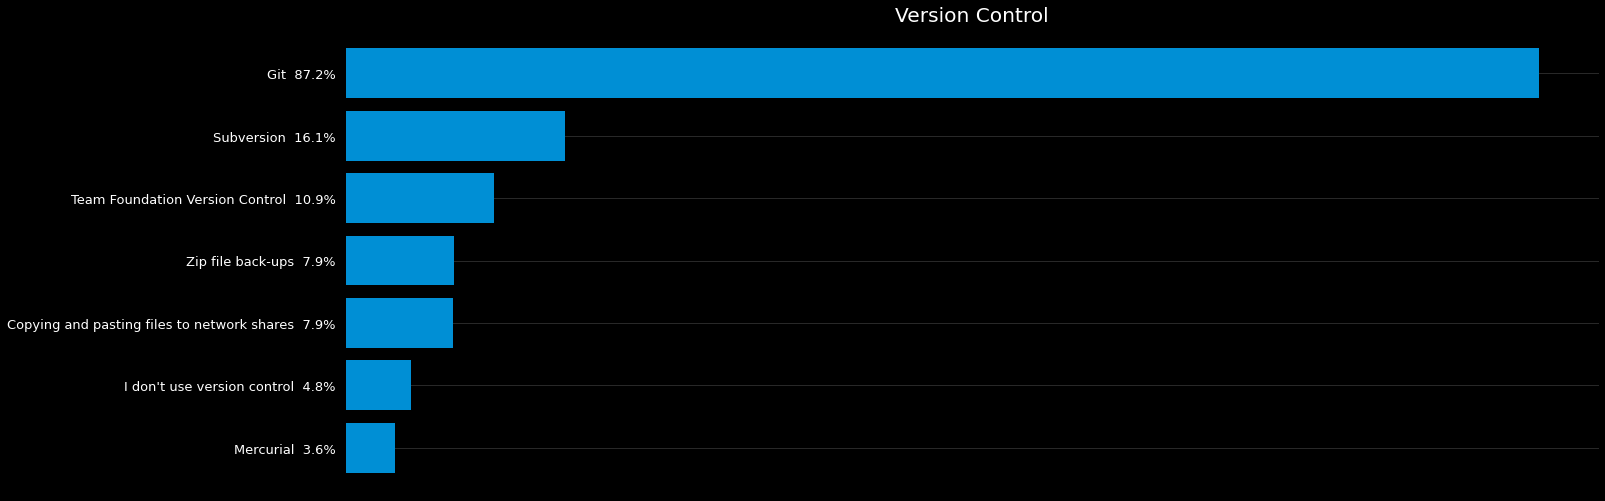

In [103]:
VersionControl = data["VersionControl"]
VersionControl.dropna(inplace=True)
VersionControl = VersionControl.str.split(";")


Double_list_sort_count(VersionControl , False)

Build_Barh_sizes( key_Phrases , Quantity, VersionControl ,"fivethirtyeight", False , (20,8), "Version Control")  # Building a schedule

<h5 style="text-align:center; " > <b>How Often Do Developers Check In Code?

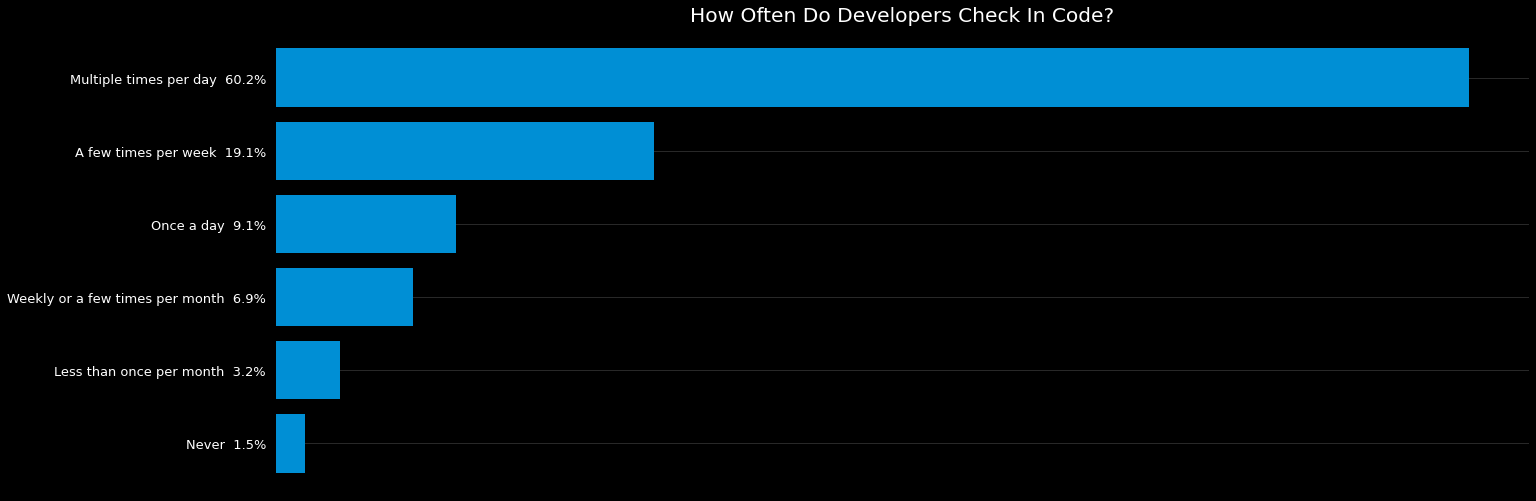

In [104]:
CheckInCode = data["CheckInCode"]
CheckInCode.dropna(inplace=True)


Dictionary_Distributor(CheckInCode , False)
Build_Barh_sizes( key_Phrases , Quantity, CheckInCode ,"fivethirtyeight", False , (20,8), "How Often Do Developers Check In Code?")  # Building a schedule


## Community

#### Site Use

<h5 style="text-align:center; " > <b>Visiting Stack Overflow

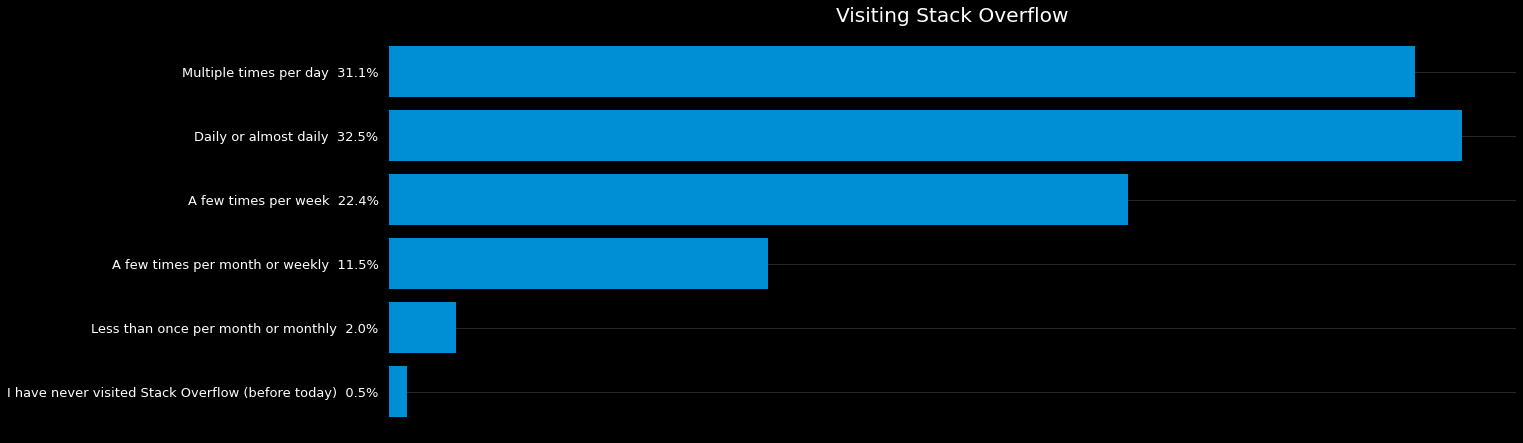

In [106]:
SOVisitFreq = data ["StackOverflowVisit"]
SOVisitFreq.dropna(inplace=True)

SOVisitFreq_Counted = Counter(SOVisitFreq)

key_Phrases =  ['I have never visited Stack Overflow (before today)' , 'Less than once per month or monthly', 'A few times per month or weekly', "A few times per week", "Daily or almost daily", "Multiple times per day"]
Quantity = []

for i in key_Phrases:
    Quantity.append(SOVisitFreq_Counted[i])


Build_Barh_sizes( key_Phrases , Quantity, SOVisitFreq ,"fivethirtyeight", False , (18,7), "Visiting Stack Overflow")   # Building a schedule

<h5 style="text-align:center; " > <b>How Many Participants Have a Stack Overflow Account?

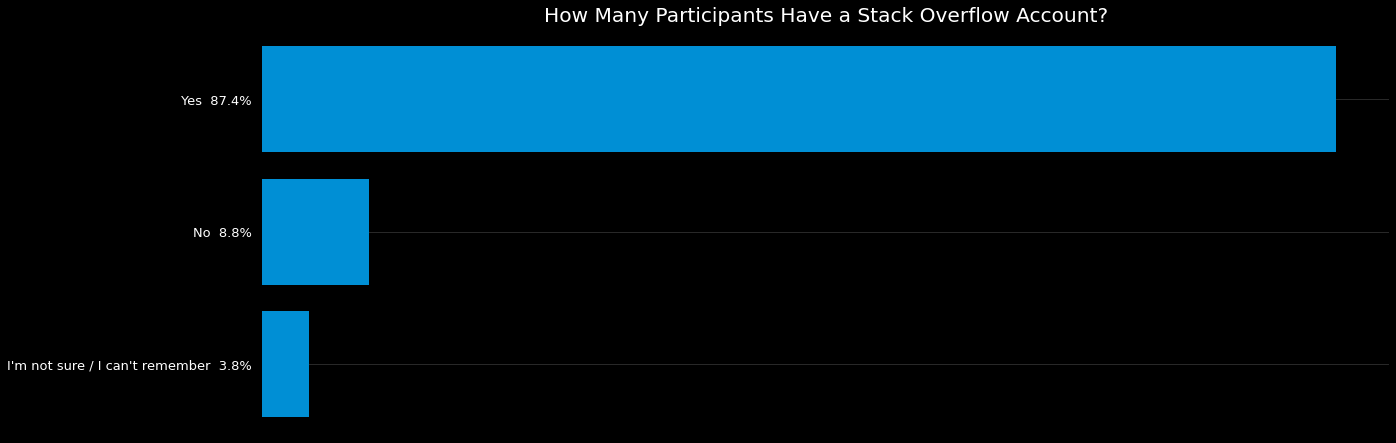

In [108]:
SOAccount = data['StackOverflowHasAccount']
SOAccount.dropna(inplace=True)

Dictionary_Distributor(SOAccount, False)

Build_Barh_sizes( key_Phrases , Quantity, SOAccount ,"fivethirtyeight", False , (18,7), "How Many Participants Have a Stack Overflow Account?")   # Building a schedule

<h5 style="text-align:center; " > <b>Sharing What You've Built in Your Developer Story

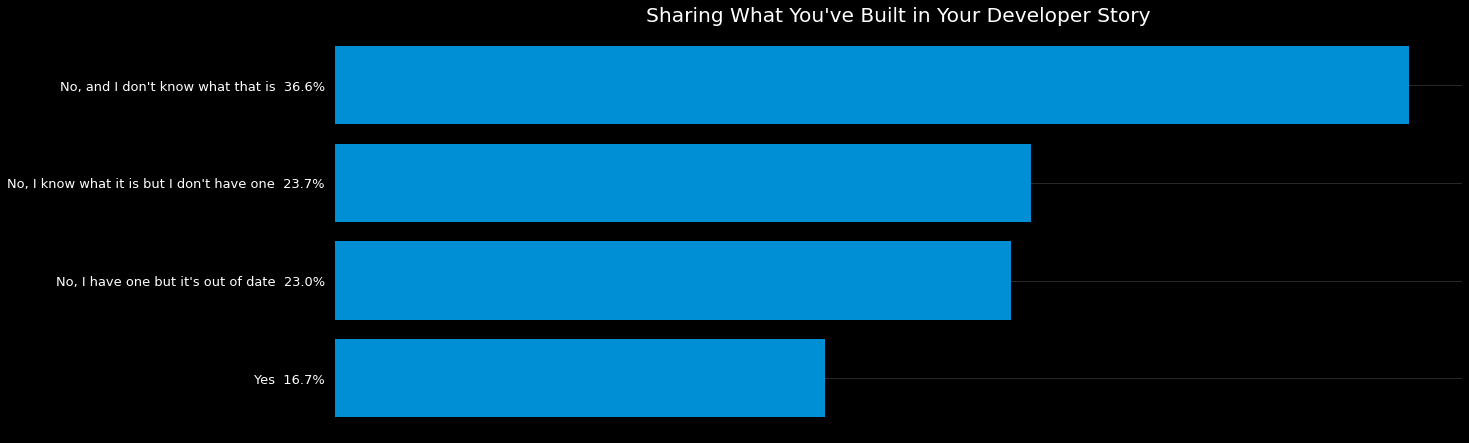

In [110]:
SOVisitTo = data['StackOverflowDevStory']
SOVisitTo.dropna(inplace=True)
SOVisitTo = SOVisitTo.str.split(";")

Double_list_sort_count(SOVisitTo, False)

Build_Barh_sizes( key_Phrases , Quantity, SOVisitTo ,"fivethirtyeight", False , (18,7), "Sharing What You've Built in Your Developer Story")   # Building a schedule

<h5 style="text-align:center; " > <b>How Often Do Developers Participate on Stack Overflow?

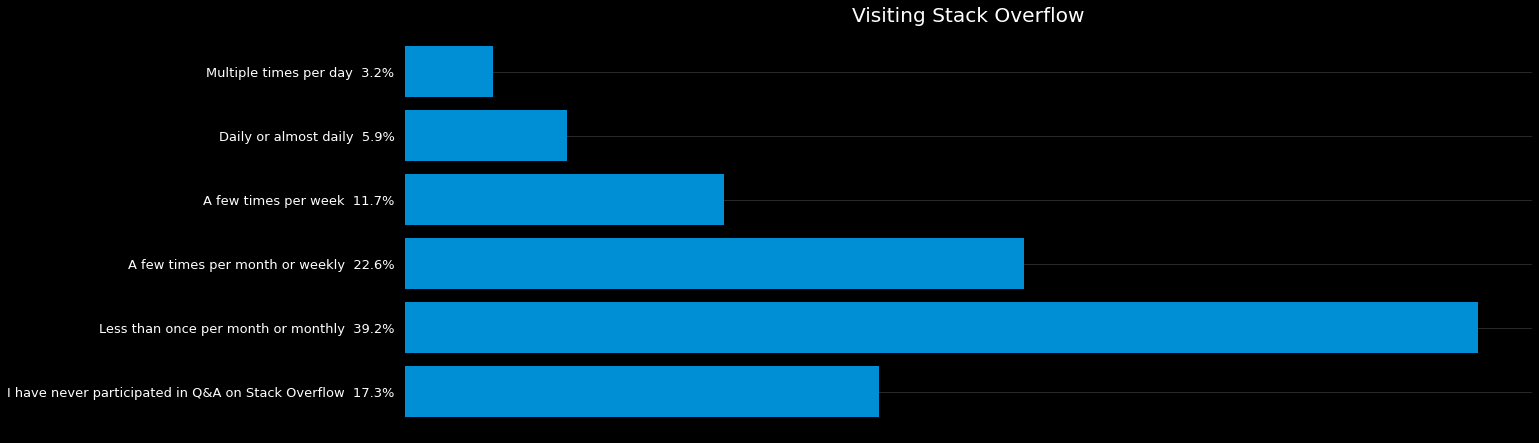

In [112]:
SOVisitFreq = data ["StackOverflowParticipate"]
SOVisitFreq.dropna(inplace=True)

SOVisitFreq_Counted = Counter(SOVisitFreq)

key_Phrases =  ['I have never participated in Q&A on Stack Overflow' , 'Less than once per month or monthly', 'A few times per month or weekly', "A few times per week", "Daily or almost daily", "Multiple times per day"]
Quantity = []

for i in key_Phrases:
    Quantity.append(SOVisitFreq_Counted[i])


Build_Barh_sizes( key_Phrases , Quantity, SOVisitFreq ,"fivethirtyeight", False , (18,7), "Visiting Stack Overflow")   # Building a schedule

####  Engaging Together

<h5 style="text-align:center; " > <b> Do Developers Consider Themselves Part of the Stack Overflow Community?

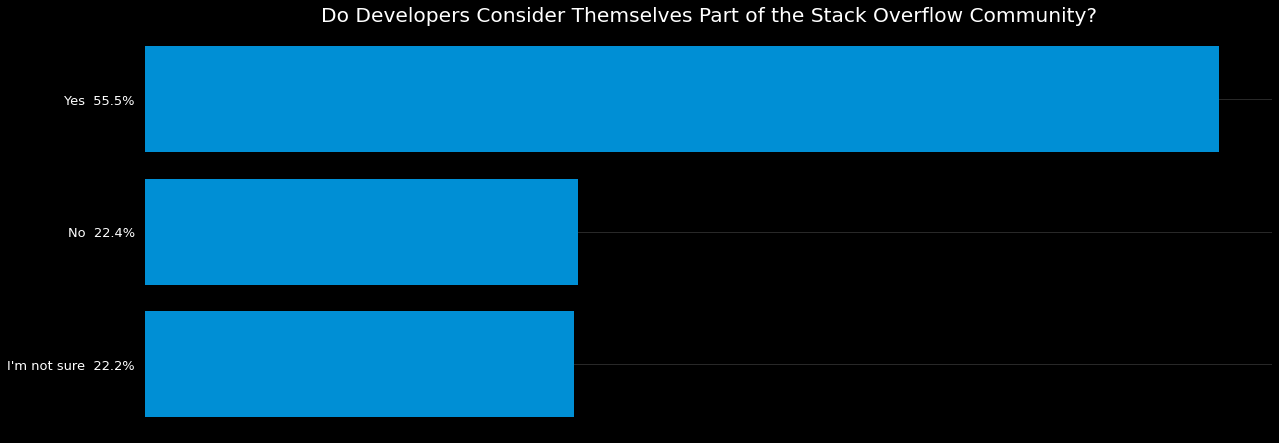

In [113]:
StackOverflowConsiderMember = data['StackOverflowConsiderMember']
StackOverflowConsiderMember.dropna(inplace=True)

Dictionary_Distributor(StackOverflowConsiderMember, False)

Build_Barh_sizes( key_Phrases , Quantity, StackOverflowConsiderMember ,"fivethirtyeight", False , (18,7), "Do Developers Consider Themselves Part of the Stack Overflow Community?")   # Building a schedule